<h1 style= "text-align:center;color: #0080ff">EMPRESA GASTRODATA</h1>
<p>En el corazón vibrante de La Habana, en un pequeño y acogedor local del municipio de Arroyo Naranjo, nació una empresa con una visión singular: utilizar el poder de los datos para transformar la industria de la gastronomía. Esta empresa es GastroData, y su historia comienza debido a la pasión por la tecnología y la buena comida. GastroData se especializa en la recolección, procesamiento y análisis de datos de restaurantes. La empresa se enfoca en diversos aspectos, como la evaluación de los restaurantes de la capital.

Además, ofrece servicios personalizados para clientes que deseen cierta información transformada por los datos de los restaurantes, o ciertos programas que cumplan determinadas funciones para la necesidad del consumidor. Desde su fundación, GastroData ha colaborado con una amplia variedad de restaurantes en La Habana, desde pequeños negocios familiares hasta reconocidos establecimientos gastronómicos. La empresa ha logrado posicionarse como un referente en el análisis de datos para la industria gastronómica, ofreciendo soluciones innovadoras y de alto impacto para quien las solicita.

A continuación se muestra una gráfica de barras, donde se puede observar la cantidad de restaurantes que fueron analizados este mes, utilizados en las peticiones de cada cliente del mes.</p>

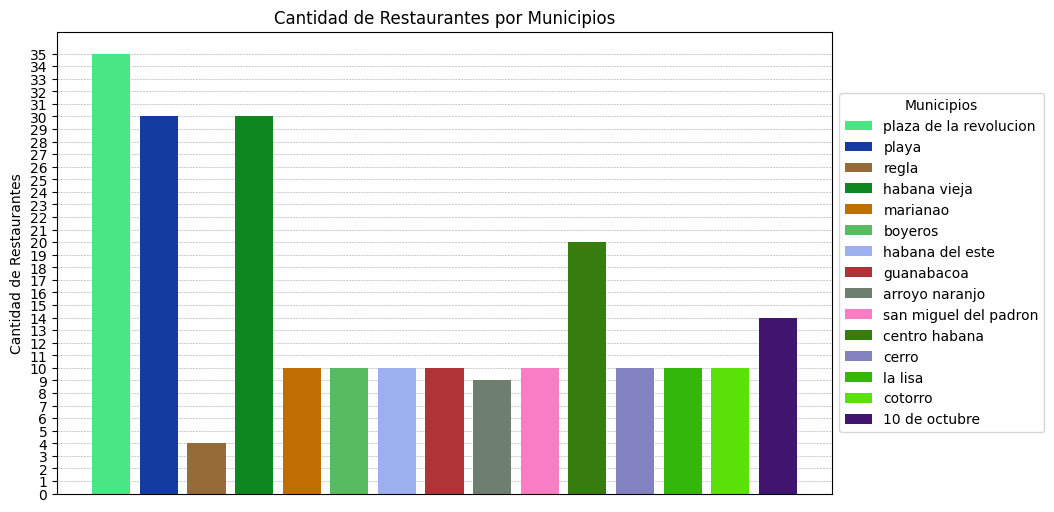

In [1]:
import matplotlib.pyplot as plt
import os
import json
import random

ruta_carpeta = "json"
archivos_json = os.listdir(ruta_carpeta) 

cantidad_restaurantes = {}
colors = {}

for i in archivos_json:
    with open(os.path.join(ruta_carpeta, i), "r", encoding="utf8") as f:
        datos = json.load(f)
        municipio = datos["municipality"].strip().lower() if "municipality" in datos and datos["municipality"] else None
        if municipio:
            if municipio not in cantidad_restaurantes:
                cantidad_restaurantes[municipio] = 1
                colors[municipio] = f'#{random.randint(0, 0xFFFFFF):06x}'
            else:
                cantidad_restaurantes[municipio] += 1


municipios = list(cantidad_restaurantes.keys())
cantidad_restaurantes_valores = list(cantidad_restaurantes.values())

plt.figure(figsize=(10, 6)) 
for i, (municipio, cantidad) in enumerate(zip(municipios, cantidad_restaurantes_valores)): 
    plt.bar(i, cantidad, color=colors[municipio], label=municipio if municipio not in plt.gca().get_legend_handles_labels()[1] else "")
 
plt.xticks([])
plt.yticks(range(0, max(cantidad_restaurantes_valores) + 1))
plt.ylabel('Cantidad de Restaurantes')
plt.title('Cantidad de Restaurantes por Municipios')
legend_title = "Municipios"
handles, labels = plt.gca().get_legend_handles_labels() 
plt.legend(handles, labels, title=legend_title, loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, color='gray', linestyle='--', linewidth=0.4, alpha=0.7)
plt.gca().set_axisbelow(True)
plt.show()

El primer cliente del mes nos envió un correo electrónico solicitando ayuda para determinar la cantidad mínima de masas de pizza que necesitaría para abastecer a los restaurantes en La Habana. El desafío era considerable, ya que los restaurantes que venden pizzas en la capital son numerosos y varían en tamaño y demanda.

Para abordar esta solicitud, GastroData inició una recolección exhaustiva de datos de los restaurantes que ofrecen pizzas en La Habana. Este proceso incluyó visitas a los establecimientos, entrevistas con los propietarios y chefs, y análisis de los registros de ventas. Además, se consideraron factores como el minimo de masas de pizza que piden los restaurantes al mes.

A través de este análisis detallado, llegamos a la conclusión de que la cantidad aproximada de masas de pizza necesarias podría ser determinada con mayor precisión. Esto ayudaría a establecer un suministro eficiente y evitar el desperdicio de ingredientes.

En la siguiente gráfica de barras, se puede observar la cantidad de restaurantes que fueron analizados este mes, así como la cantidad de masas de pizza necesarias para abastecerlos considerablemente. Estos resultados no solo son útiles para nuestro cliente, sino que también proporcionan una visión valiosa para otros restaurantes que buscan mejorar su eficiencia operativa.

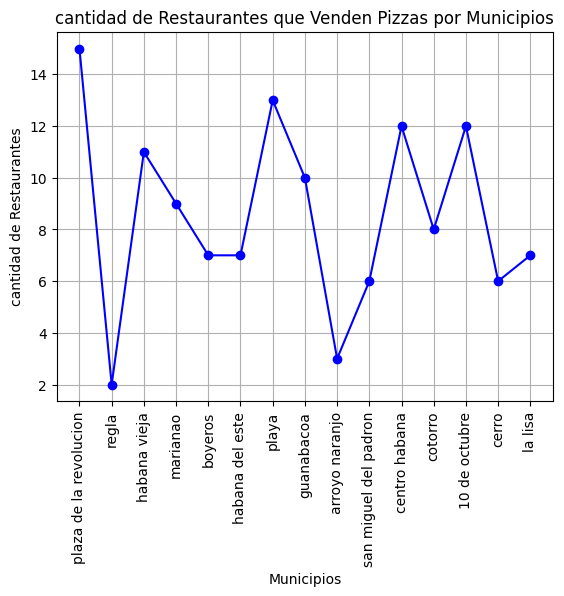

In [2]:
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import os


ruta_carpeta = "json"
archivos_json = os.listdir(ruta_carpeta)


pizzas_por_municipios = {}


for archivo in archivos_json:
    with open(os.path.join(ruta_carpeta,archivo),"r", encoding="utf8") as f:
        datos = json.load(f)
        municipio = datos.get('municipality')
        municipio = municipio.strip().lower() 
        pizzas = datos['menu'].get('pizzas') 
    if pizzas:
       if municipio not in pizzas_por_municipios:
          pizzas_por_municipios[municipio] = 0
       pizzas_por_municipios[municipio] += 1
    
municipios = list(pizzas_por_municipios.keys())
cantidad_restaurantes = list(pizzas_por_municipios.values())

plt.plot(municipios, cantidad_restaurantes, marker='o', linestyle='-', color='blue')
plt.xlabel('Municipios')
plt.ylabel('cantidad de Restaurantes')
plt.title('cantidad de Restaurantes que Venden Pizzas por Municipios')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

El siguiente cliente del mes se trataba de un turista extranjero que venía de visita a La Habana por una semana y estaba interesado en degustar todos los restaurantes posibles de la capital. El cliente deseaba probar un poco de cada plato fuerte, postres y bebidas, por lo que debía elegir un elemento de cada una de estas categorías con el precio mínimo, para que así el presupuesto del que nos habló (no tenemos permitido revelar esa información) fuera suficiente para su travesía por los restaurantes de la capital.

Con este objetivo en mente, el equipo de GastroData se puso manos a la obra. Comenzamos realizando una exhaustiva recolección de datos de todos los restaurantes de La Habana que ofrecían estas tres categorías. Visitamos cada establecimiento, revisamos sus menús y registramos los precios de los platos fuertes, postres y bebidas más económicos.

Con los datos en mano, creamos un itinerario personalizado para el cliente, permitiéndole visitar cada restaurante seleccionado y probar una amplia variedad de platos, postres y bebidas sin exceder su presupuesto. Este itinerario no solo garantizaba una experiencia culinaria diversa y deliciosa, sino que también permitía al cliente explorar diferentes barrios y rincones de La Habana, disfrutando de la riqueza cultural y culinaria de la ciudad.

A continuación, se presenta una tabla que ilustra los restaurantes analizados y el presupuesto minimo para cada restaurante, permitiendo al cliente tomar decisiones informadas y maximizar su experiencia gastronómica durante su estancia en La Habana.

In [3]:
import os
import json
import pandas as pd
import my_library as ly

ruta_carpeta = 'json'
archivos_json = os.listdir(ruta_carpeta)
data = []

for archivo in archivos_json:
    with open(os.path.join(ruta_carpeta, archivo), "r", encoding="utf8") as f:
        datos = json.load(f)
        if 'menu' in datos and 'name' in datos:
            name = datos['name']
            valores = []

            if 'liquids' in datos['menu'] and datos['menu']['liquids'] is not None:
                liquids = datos['menu']['liquids']
                valores_liquids = ly.valor_num(liquids)
                valores_liquids.sort()
                if valores_liquids:
                    valores.append(valores_liquids[0])

            if 'desserts' in datos['menu'] and datos['menu']['desserts'] is not None:
                desserts = datos['menu']['desserts']
                valores_desserts = ly.valor_num(desserts)
                valores_desserts.sort()
                if valores_desserts:
                    valores.append(valores_desserts[0])

            if 'strong_dishes' in datos['menu'] and datos['menu']['strong_dishes'] is not None:
                strong_dishes = datos['menu']['strong_dishes']
                valores_strong_dishes = ly.valor_num(strong_dishes)
                valores_strong_dishes.sort()
                if valores_strong_dishes:
                    valores.append(valores_strong_dishes[0])

            if len(valores) == 3:
                suma = round((sum(valores)))
                if datos['10%_of_the_service'] is True:
                    suma += round(ly.calcular_10_de_la_suma(suma))
                if datos['5%_of_the_service'] is True:
                    suma += round(ly.calcular_5_de_la_suma(suma))
                moneda = datos.get('type_of_currency', 'usd')
                if moneda == "usd":
                    suma_texto = f'{suma} dólares'
                else:
                    suma_texto = f'${suma}'
                data.append([name, suma_texto])

df = pd.DataFrame(data, columns=['Nombre del Restaurante', 'Presupuesto Mínimo'])
df.to_csv('presupuesto_minimo.csv', index=False, encoding='utf-8-sig')
df

Nombre del Restaurante Presupuesto Mínimo
0     5 Esquinas trattoria              $4600
1              7 de espada              $3100
2          Altahabana_Club              $1950
3             Al Campestre              $2080
4                   Amalfi              $5540
..                     ...                ...
96         Torre de Marfil              $2310
97            El Vampirito              $1100
98               VenaVento              $2530
99              Villanueva              $1400
100             Vita Nuova              $2220

[101 rows x 2 columns]

Otro de los trabajos del mes fue solicitado por un cliente que recientemente se había mudado a La Habana y no tenía mucho conocimiento sobre las calles y sitios de la capital. Este cliente deseaba visitar restaurantes en la capital, pero no conocía sus direcciones no sabía cómo llegar.Y le señalamos en naranja los restaurantes que venden pizza, ya que es la comida favorita del cliente.

Para ayudarlo, el equipo de GastroData se puso en marcha. Reunimos información sobre los restaurantes más populares y recomendados de La Habana, incluyendo sus direcciones exactas. A continuación, utilizamos herramientas de mapeo digital para crear un mapa interactivo que mostrara la ubicación de estos restaurantes. 

El resultado fue un recurso valioso para el cliente, permitiéndole explorar la escena gastronómica de La Habana con confianza. Con el mapa en mano, pudo planificar sus visitas a los restaurantes con facilidad, aprovechando al máximo su tiempo y descubriendo nuevos lugares para disfrutar de la deliciosa comida cubana.


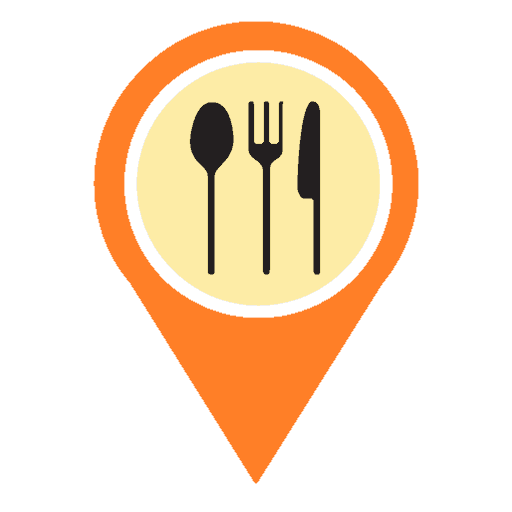
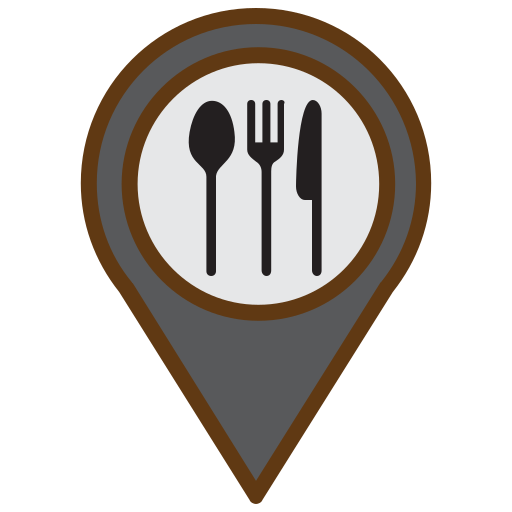
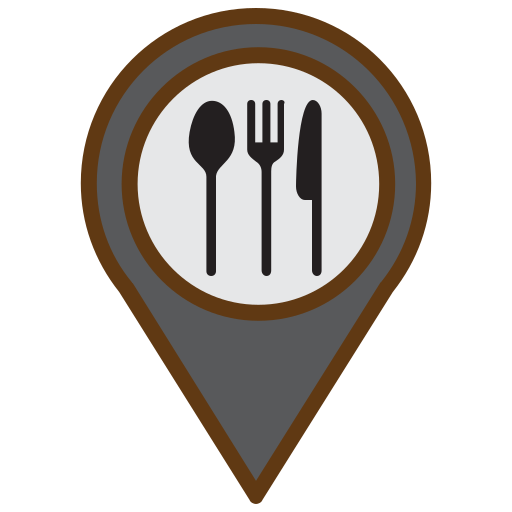
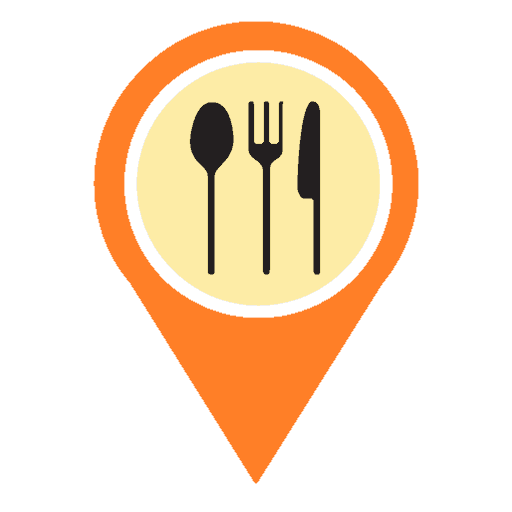
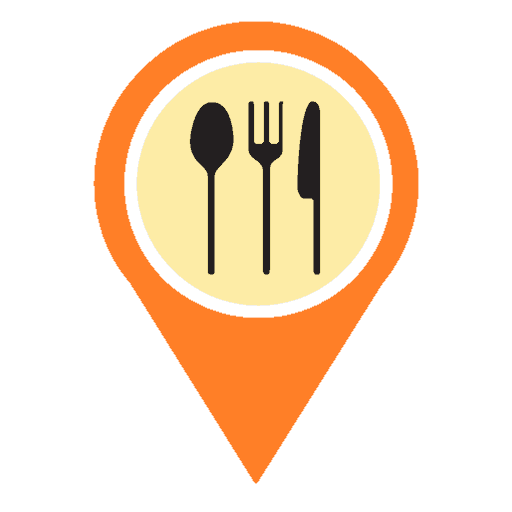
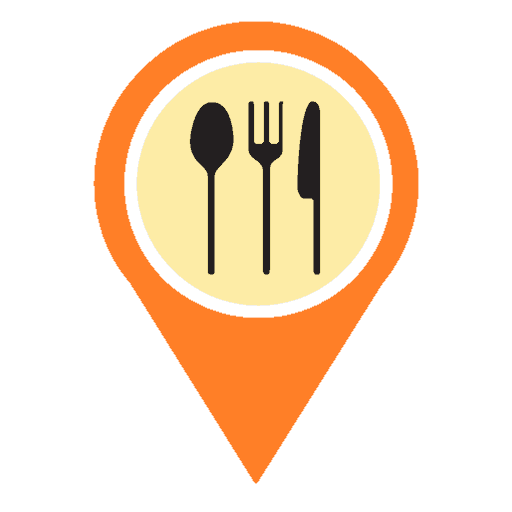
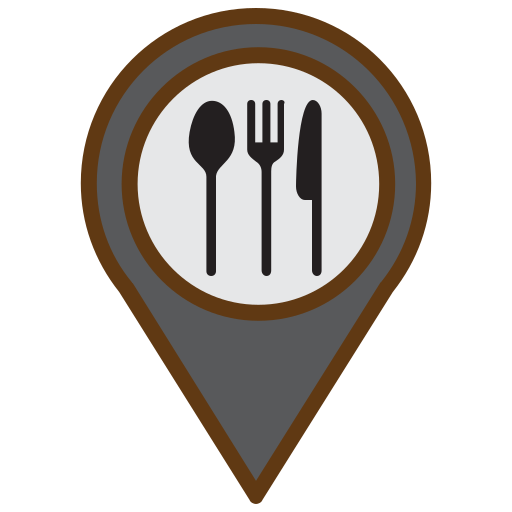
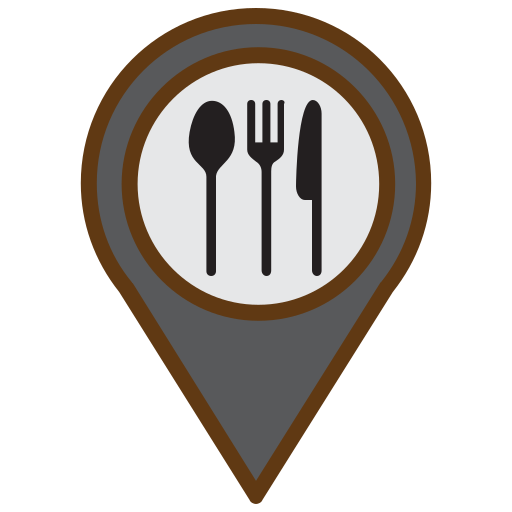
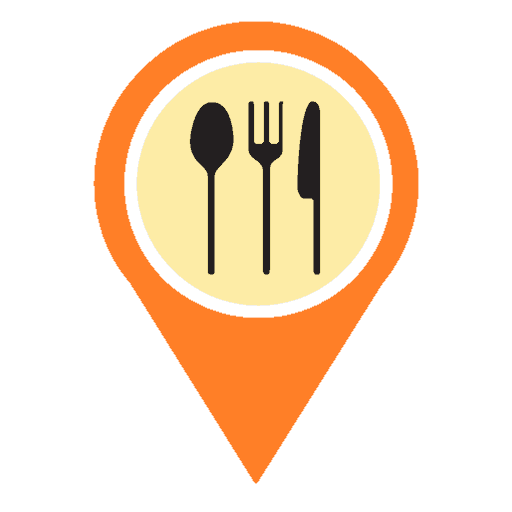
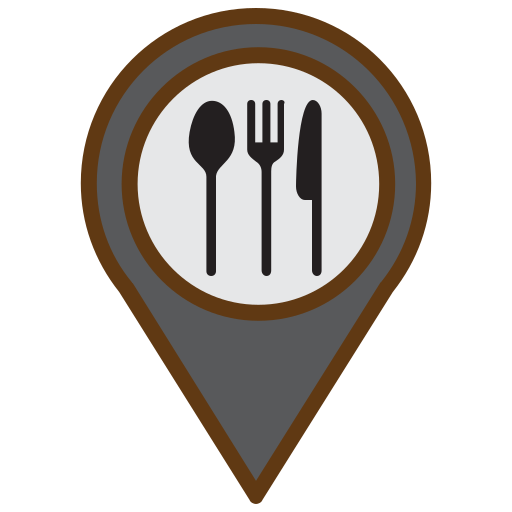
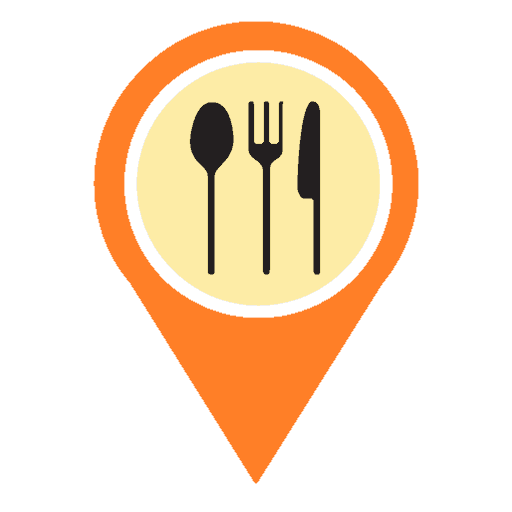
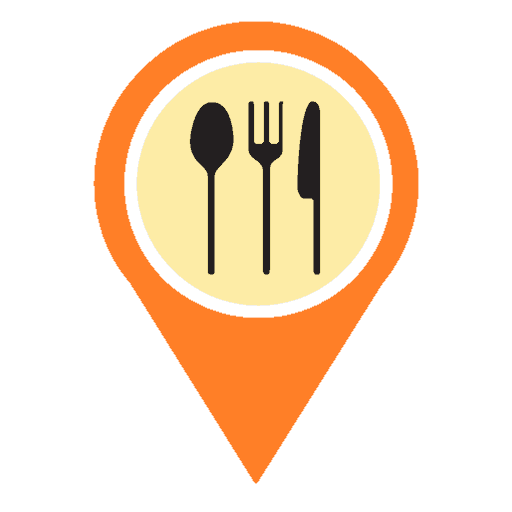
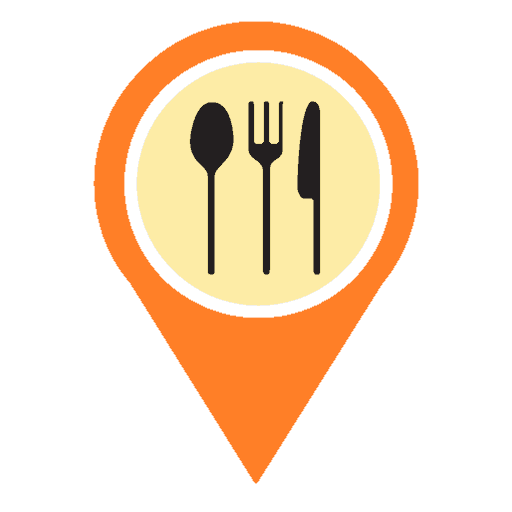
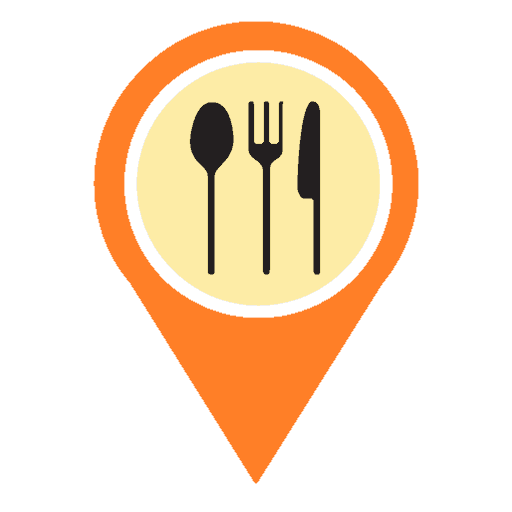
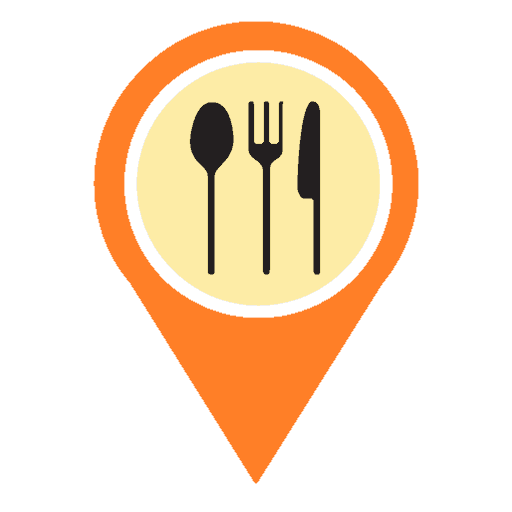
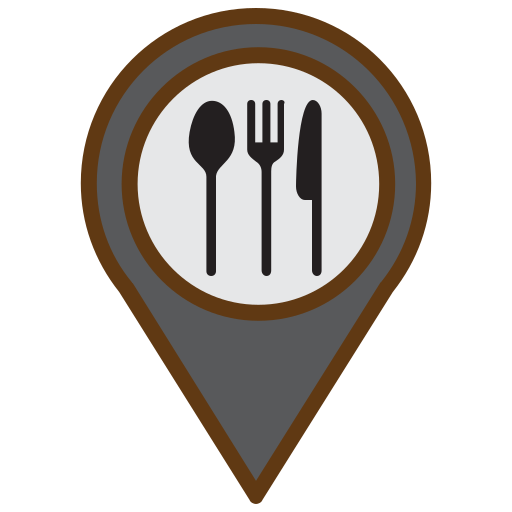
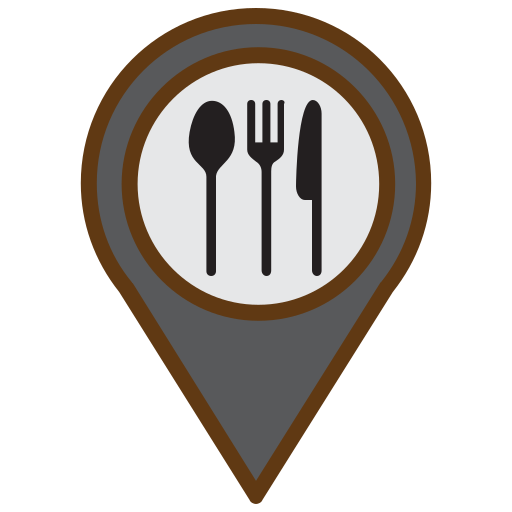
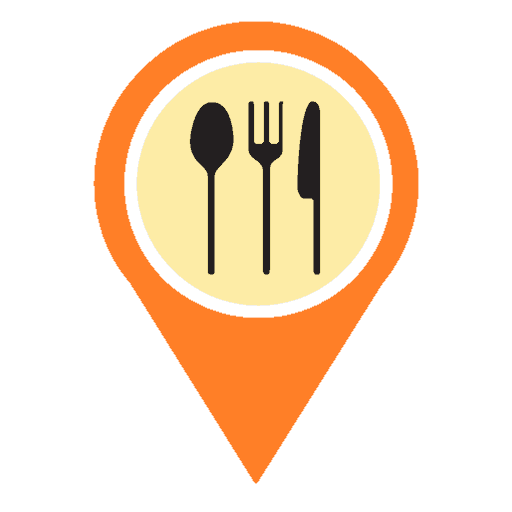
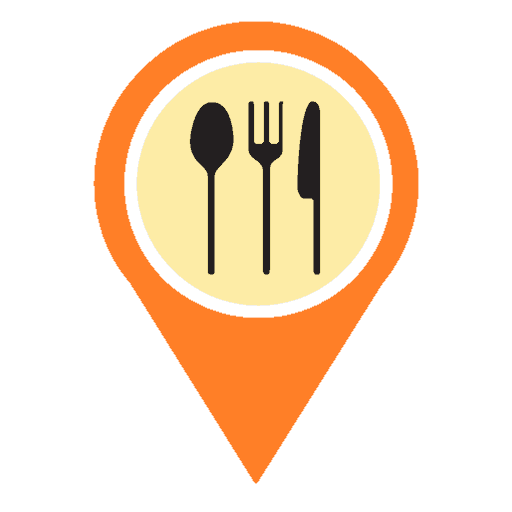
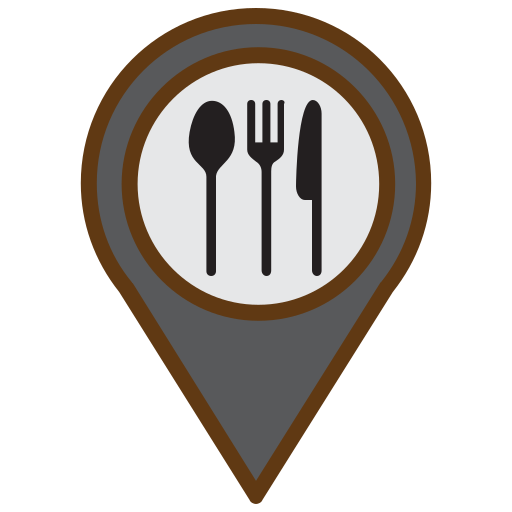
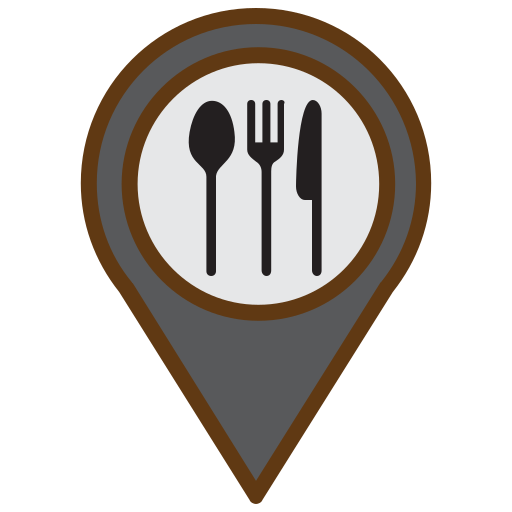
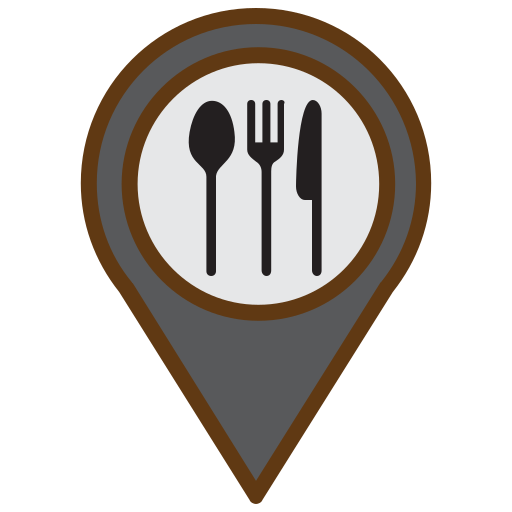
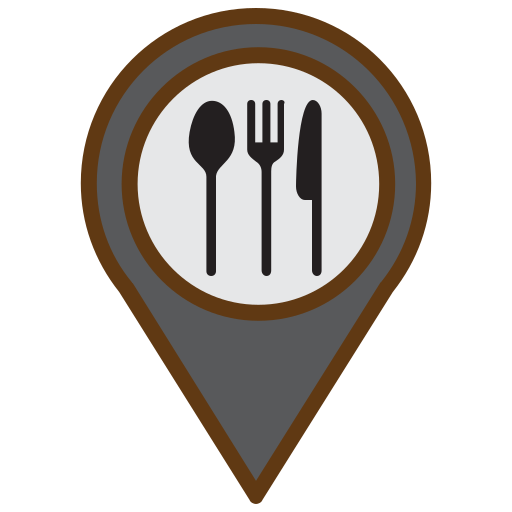
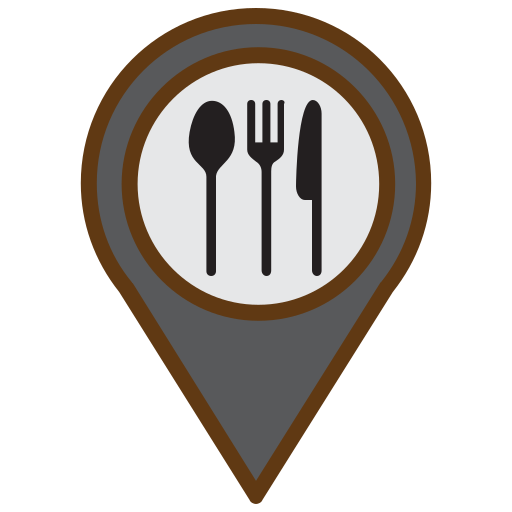
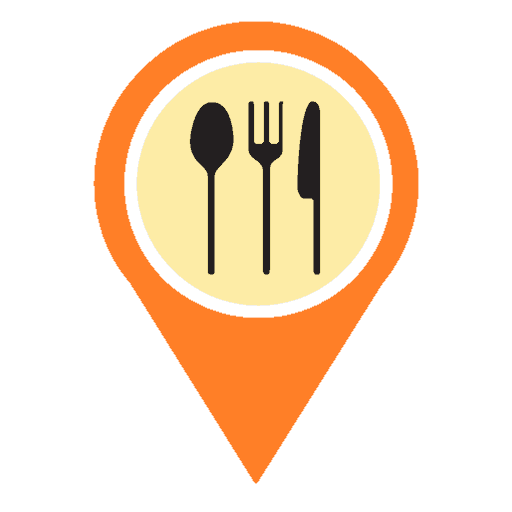
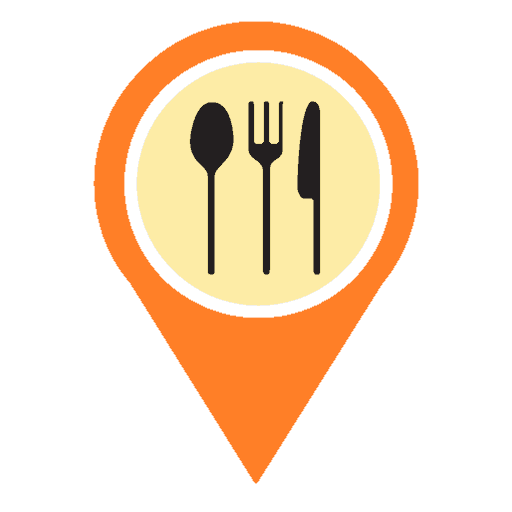
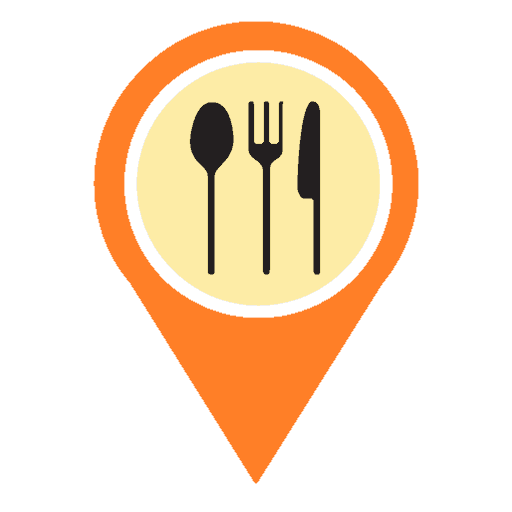
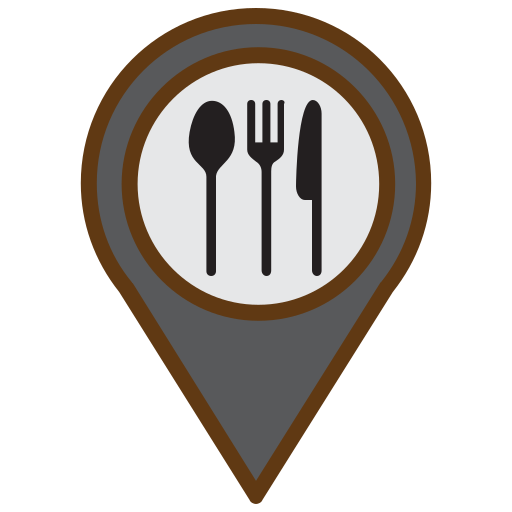
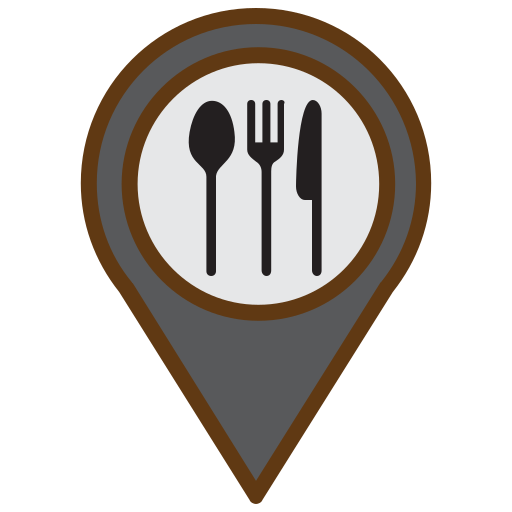
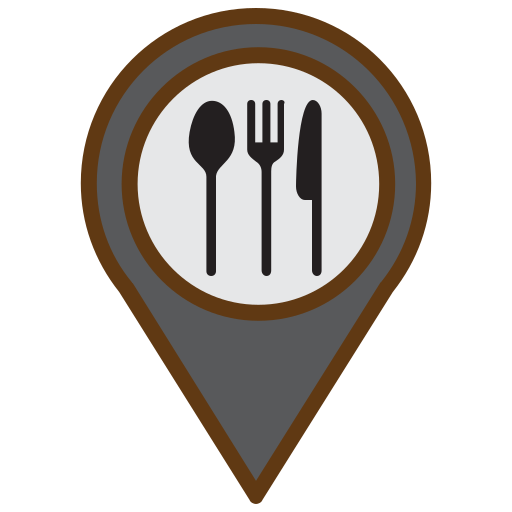
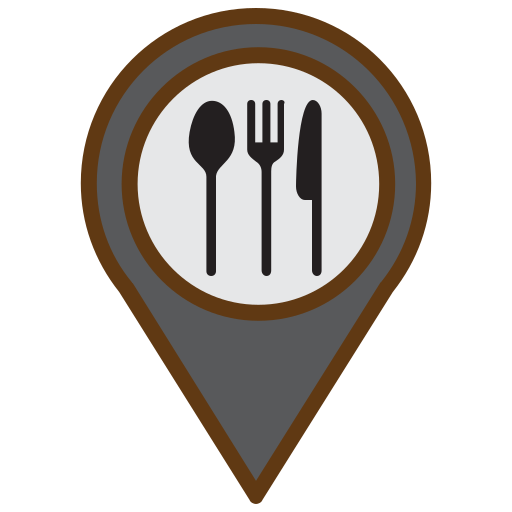
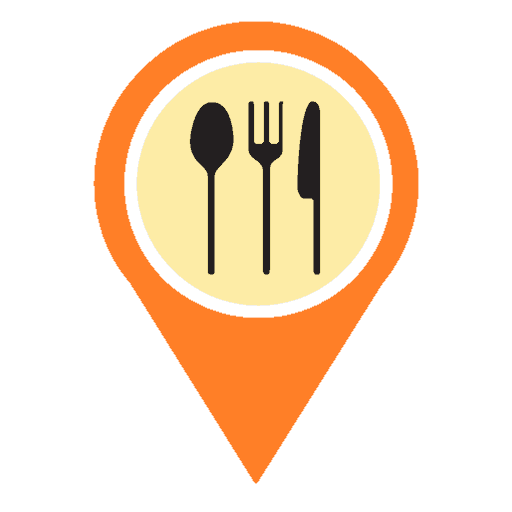
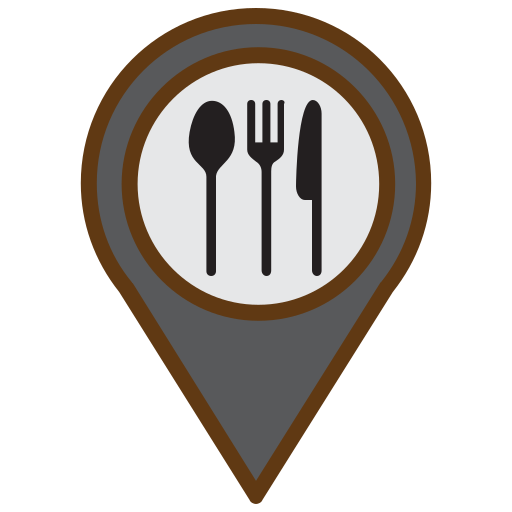
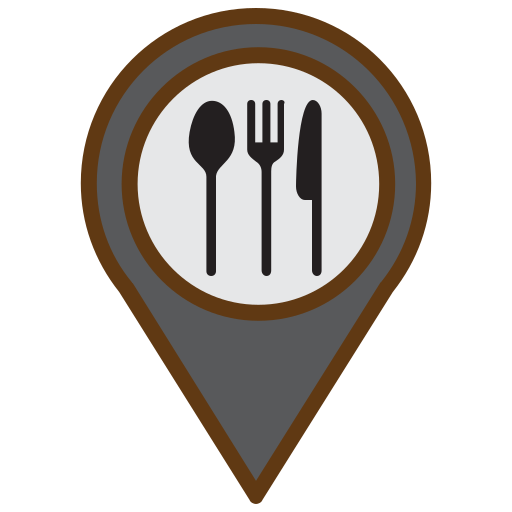
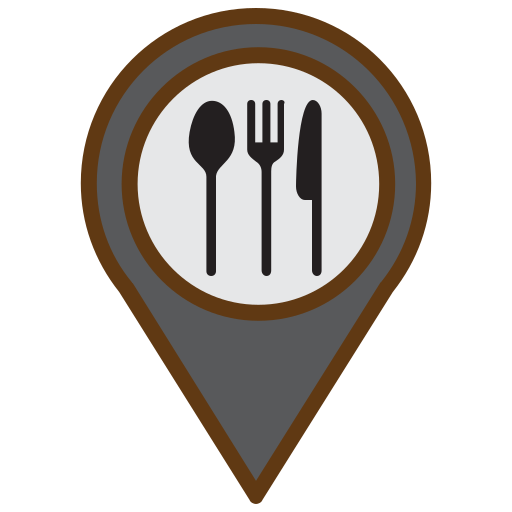
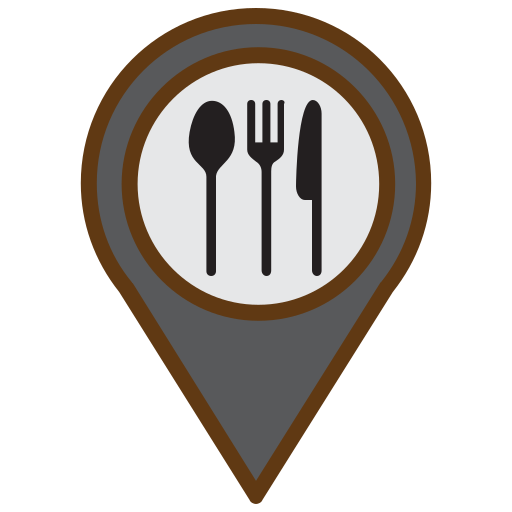
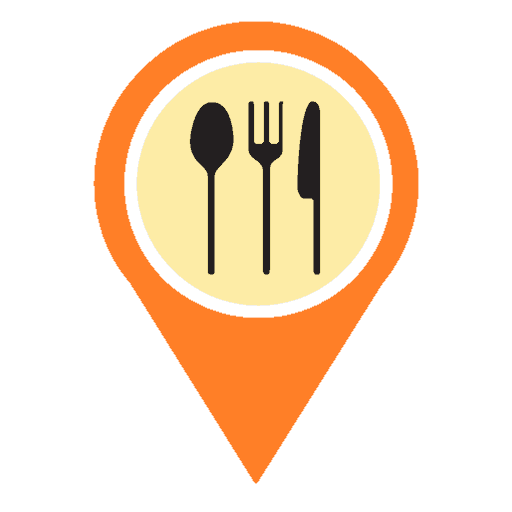
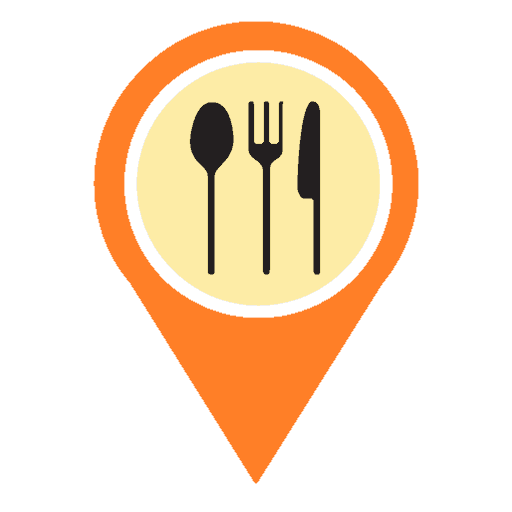
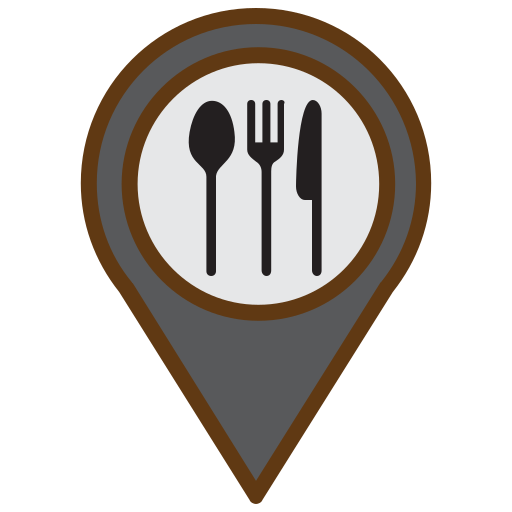
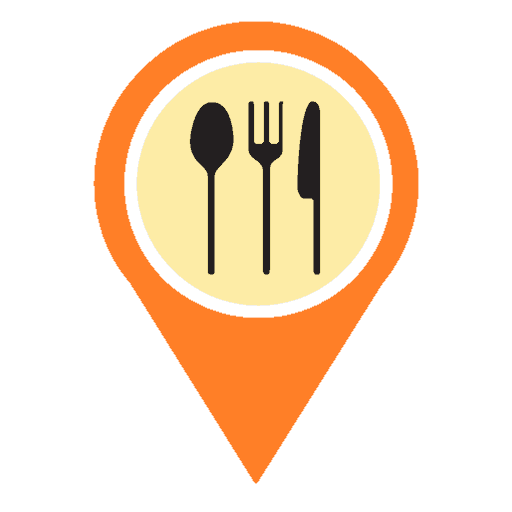
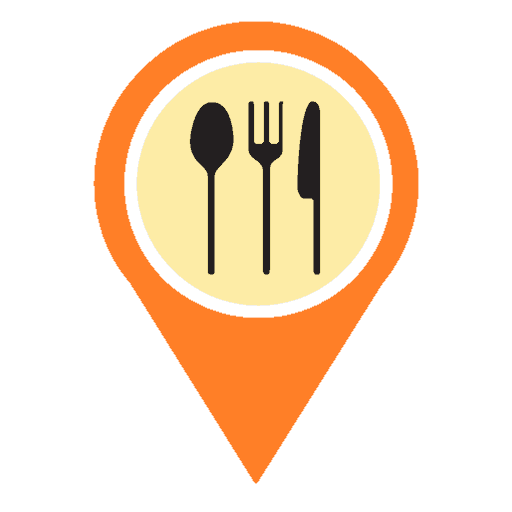
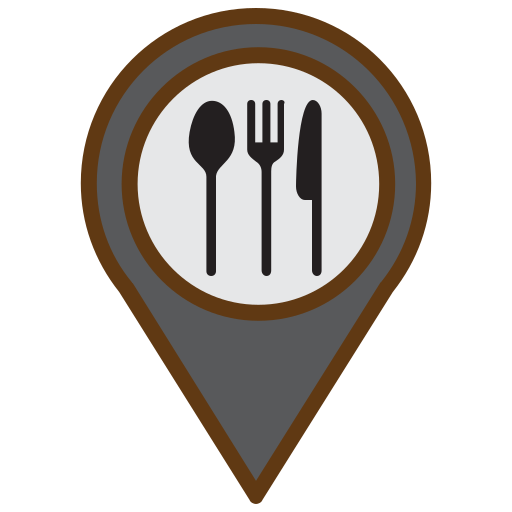
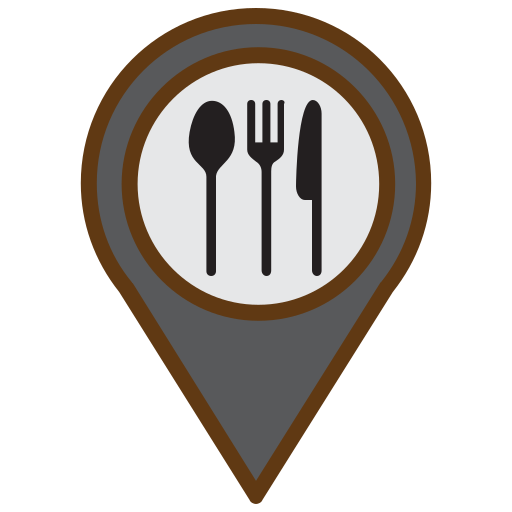
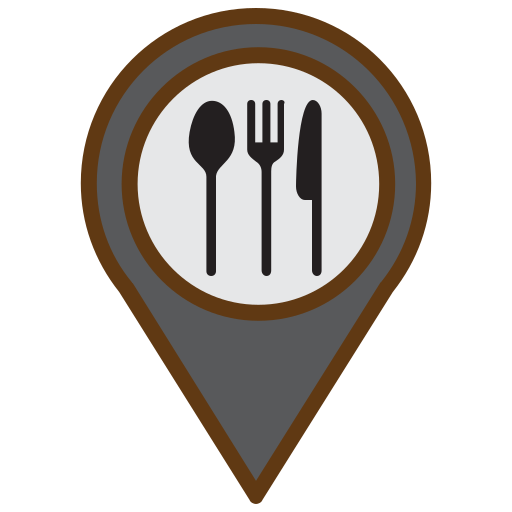
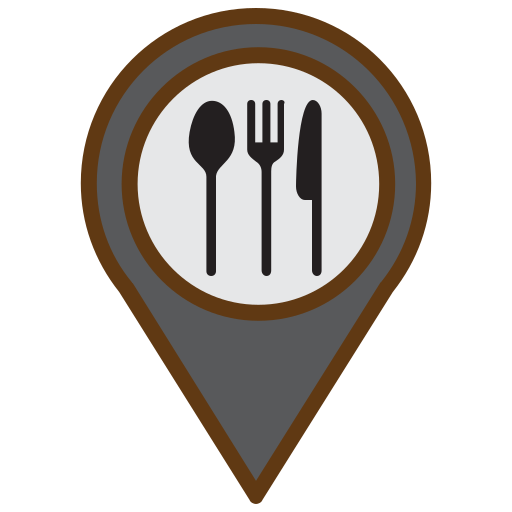
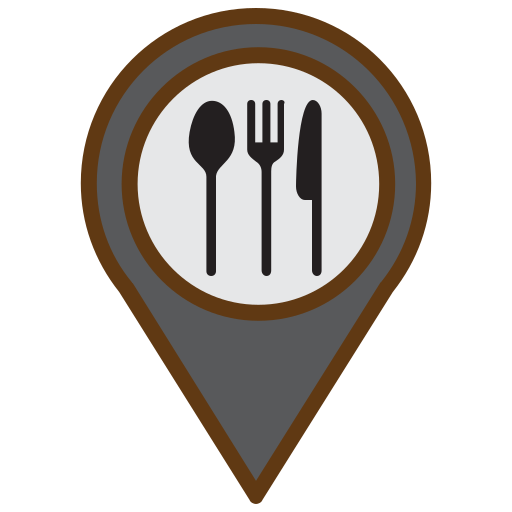
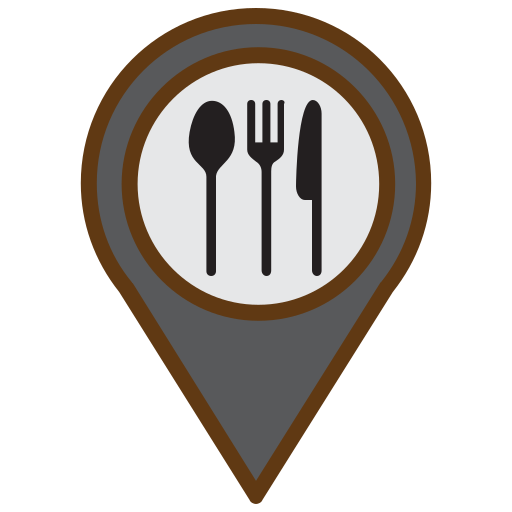
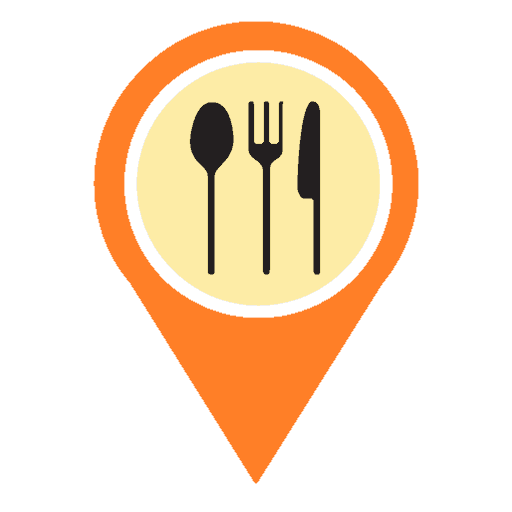
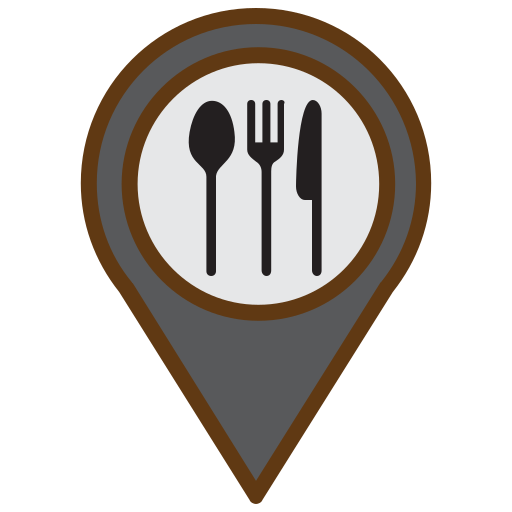
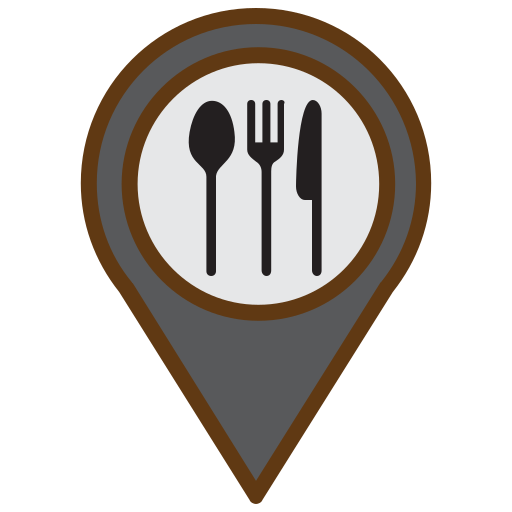
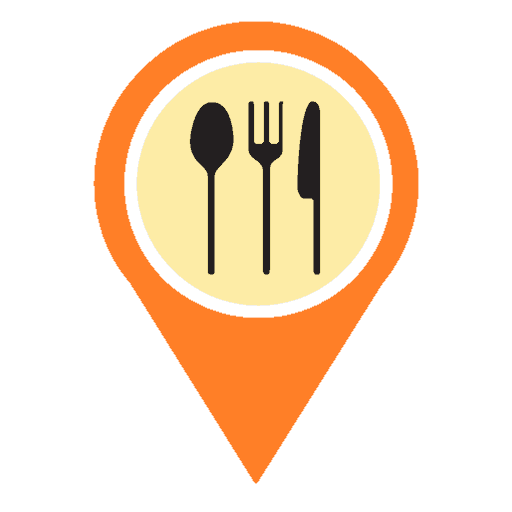
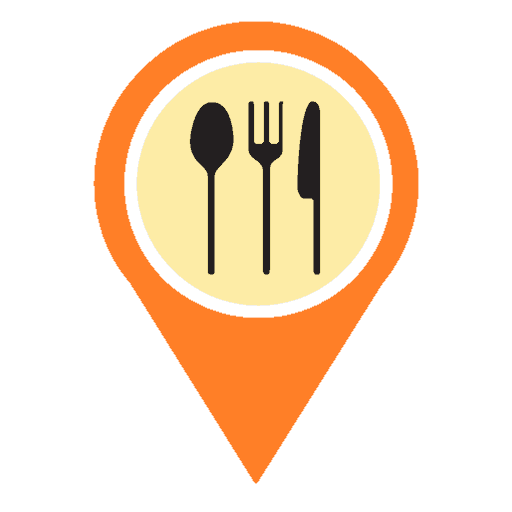
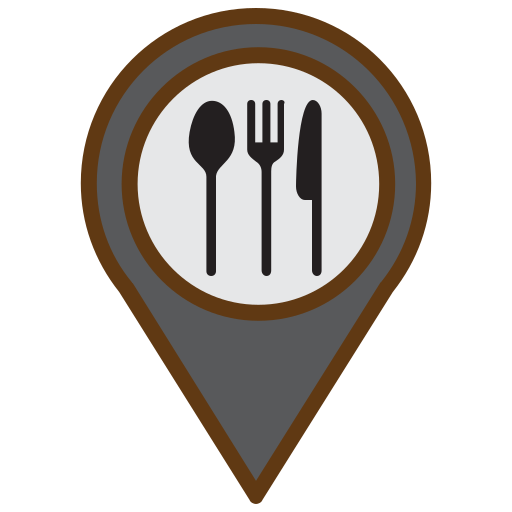
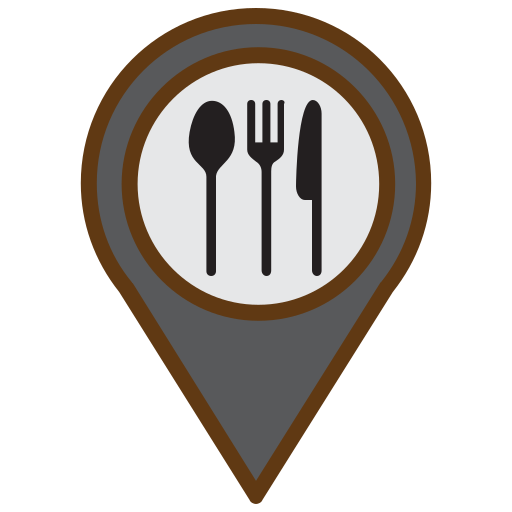
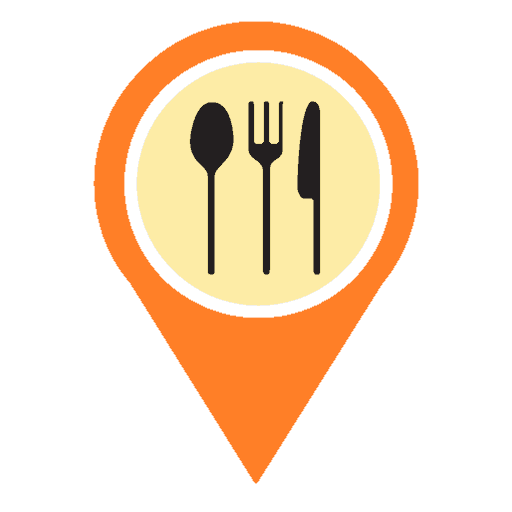
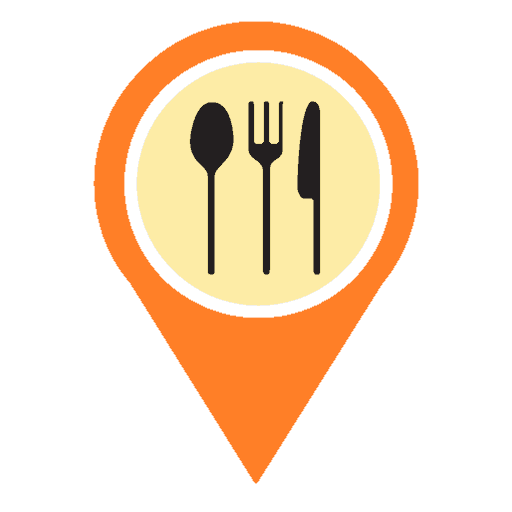
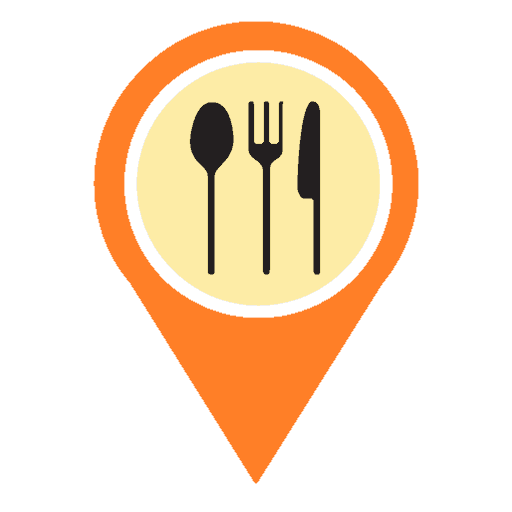
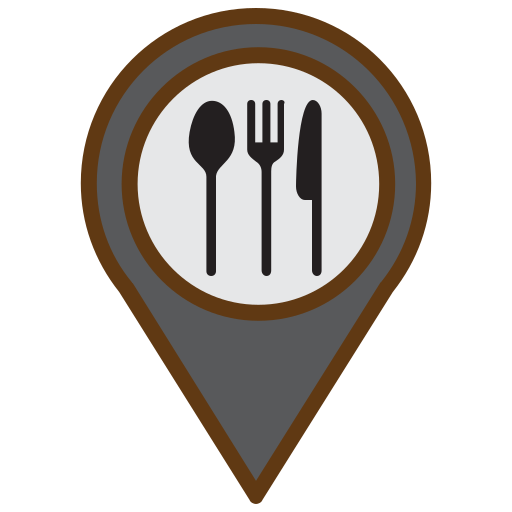
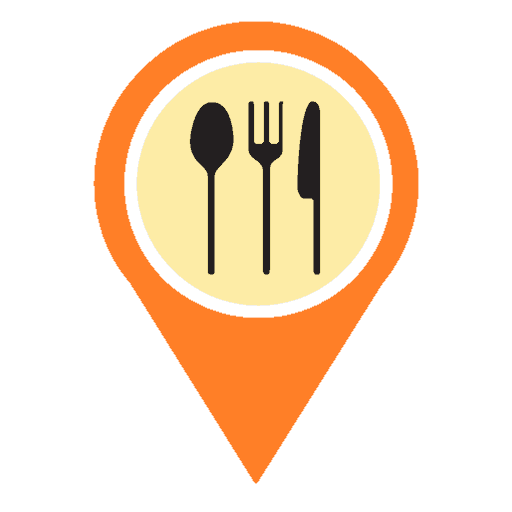
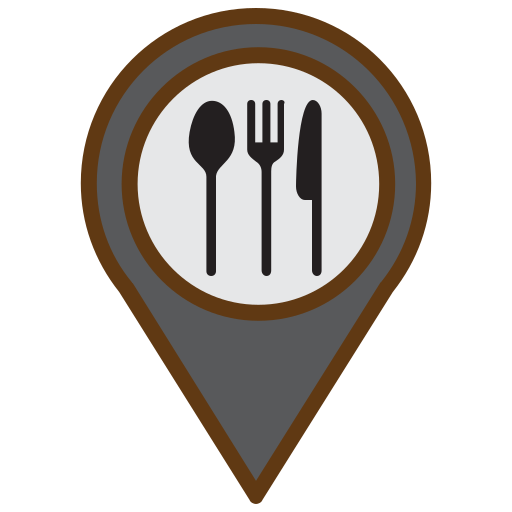
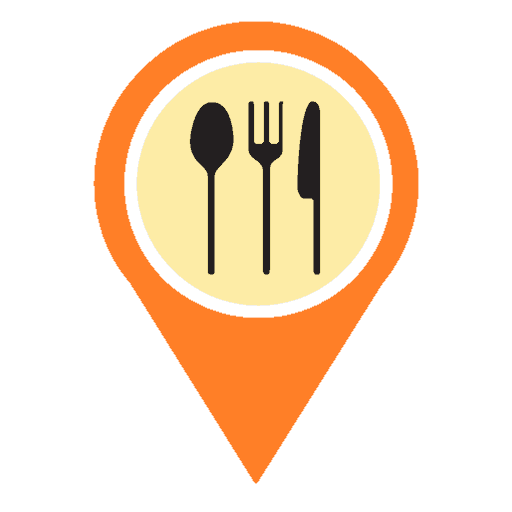
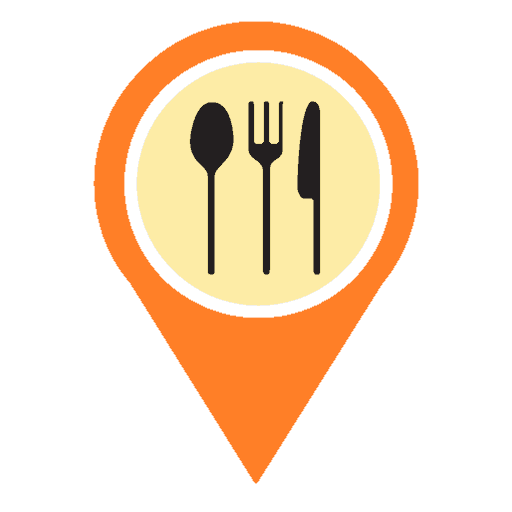
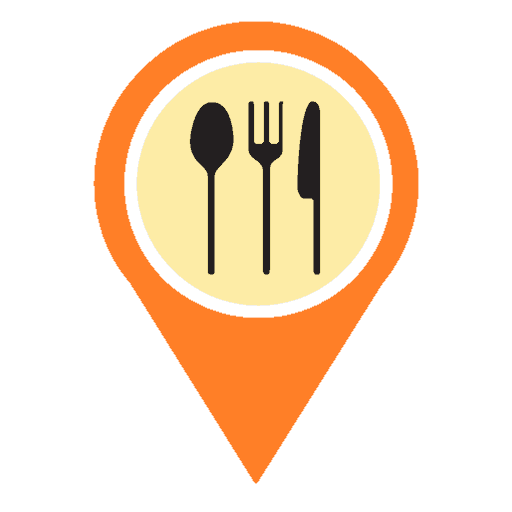
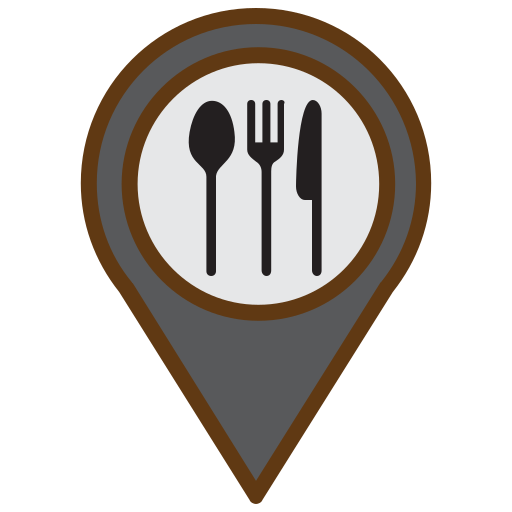
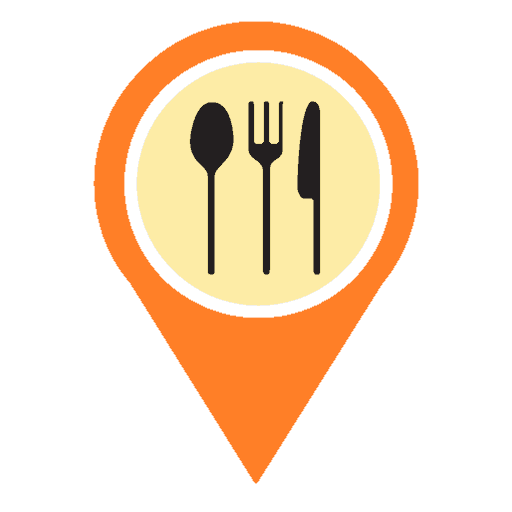
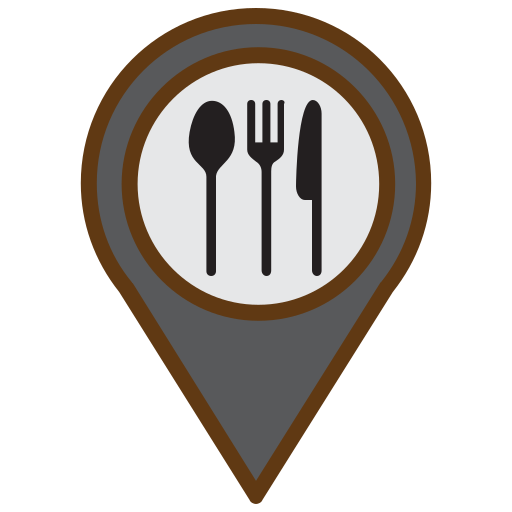
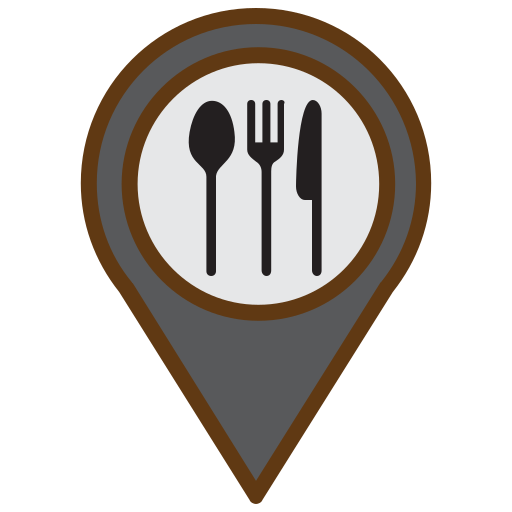
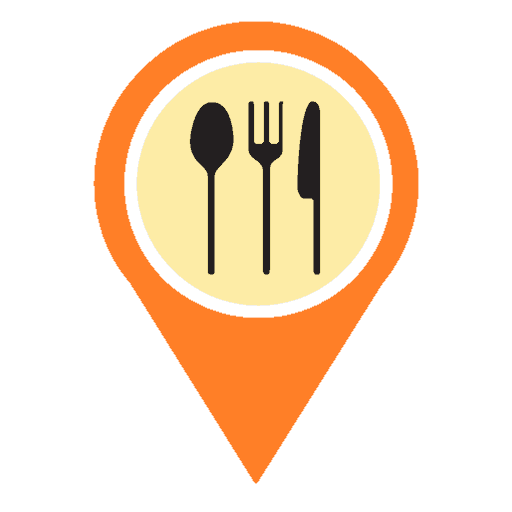
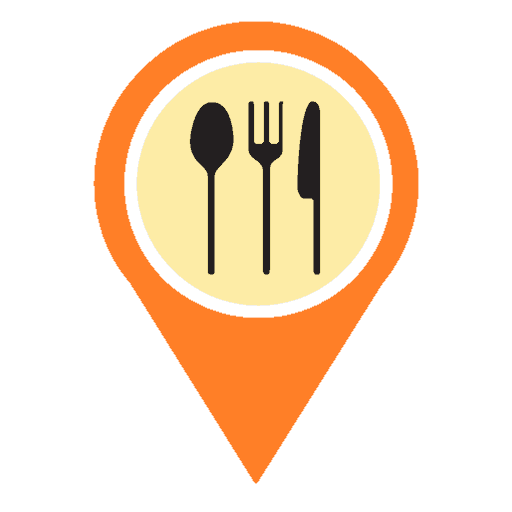
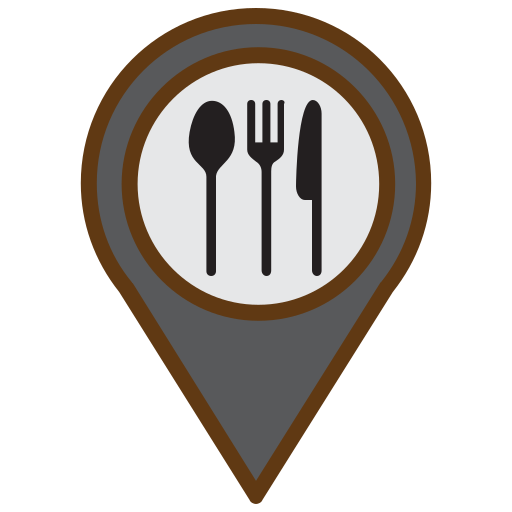
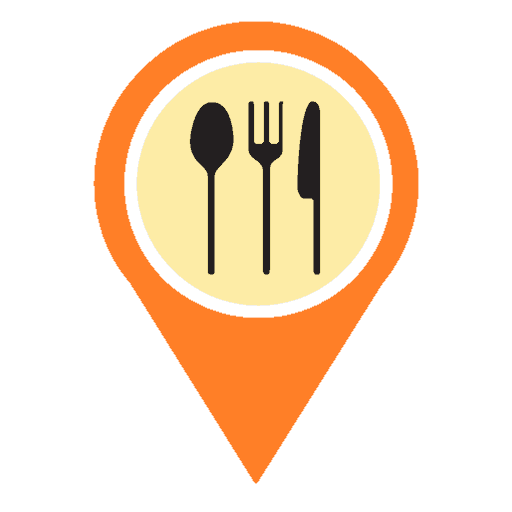
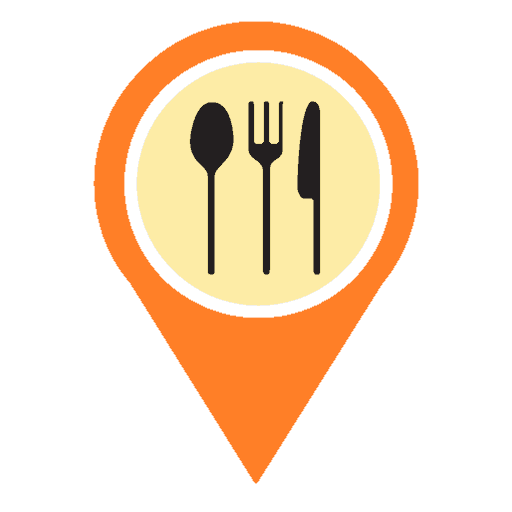
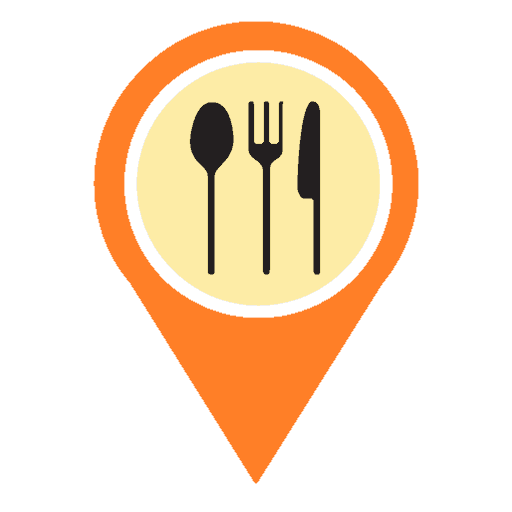
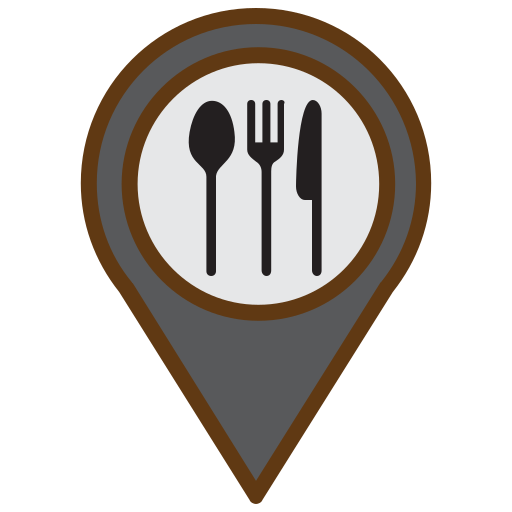
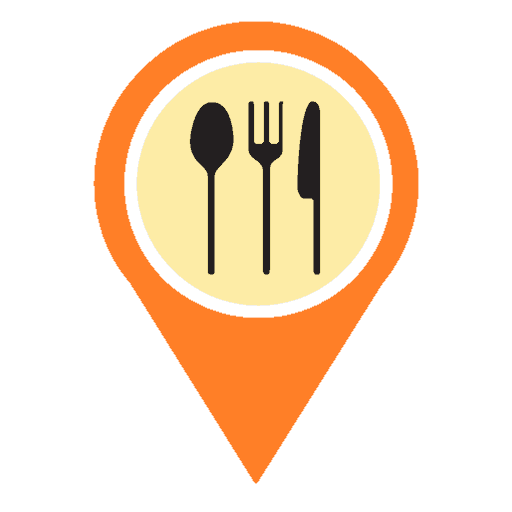
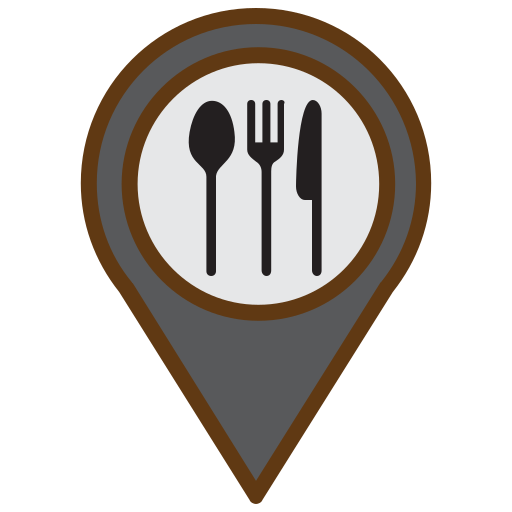
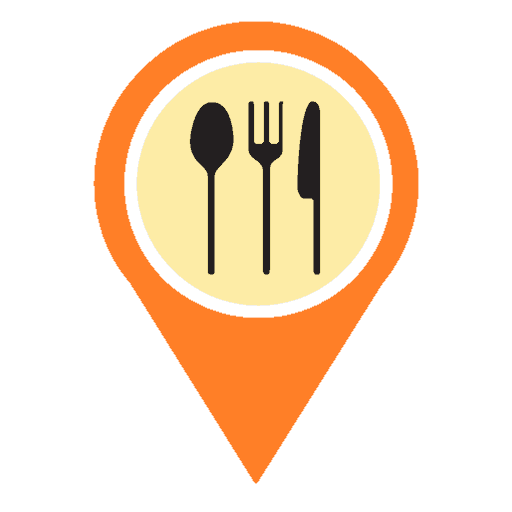
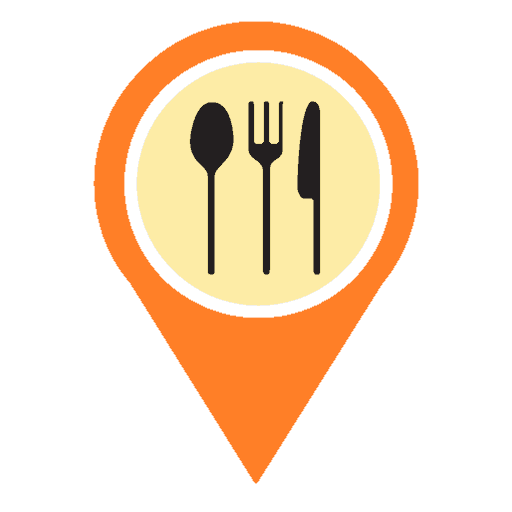
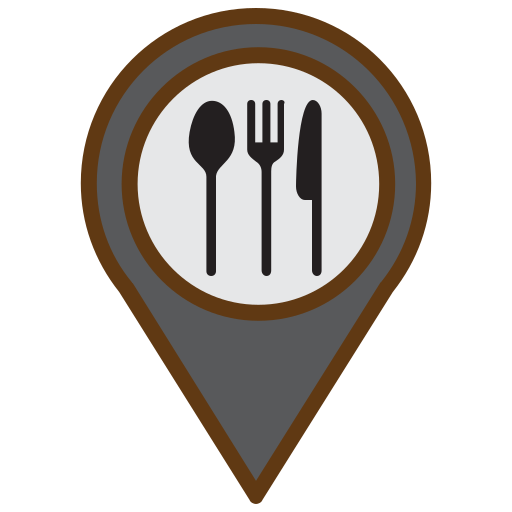
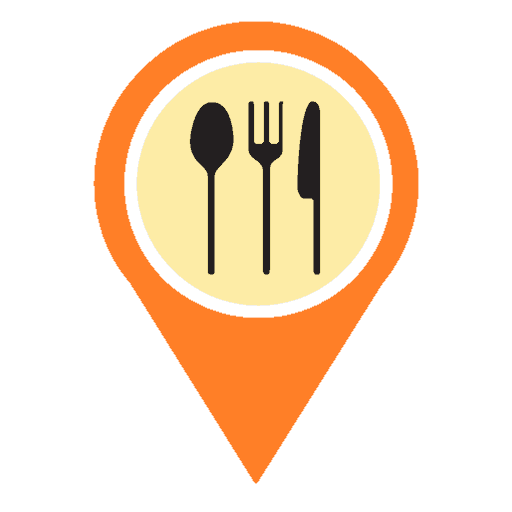
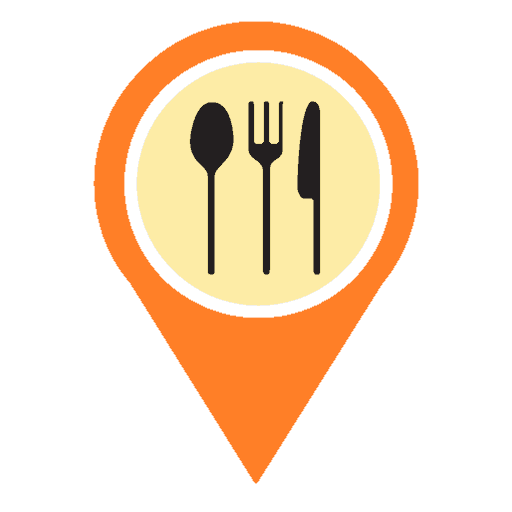
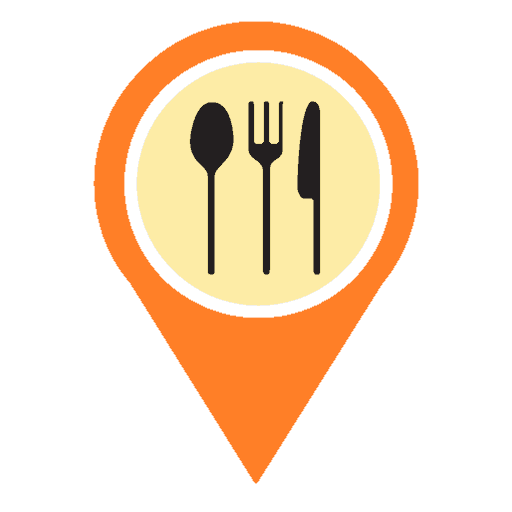
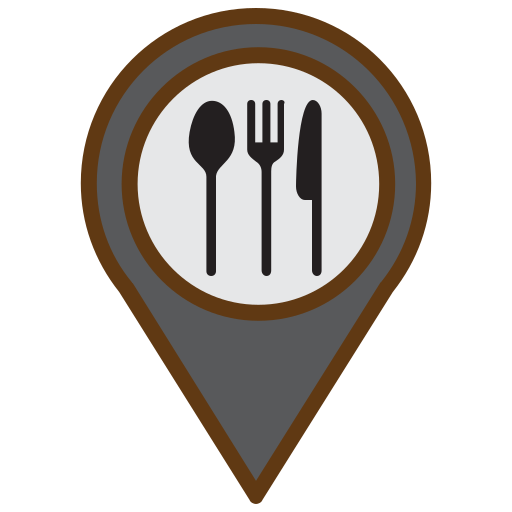
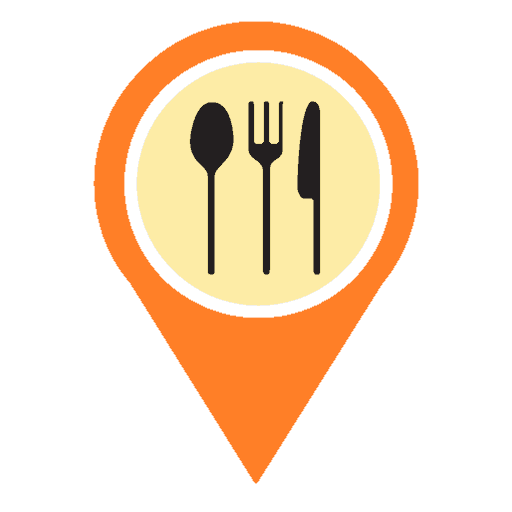
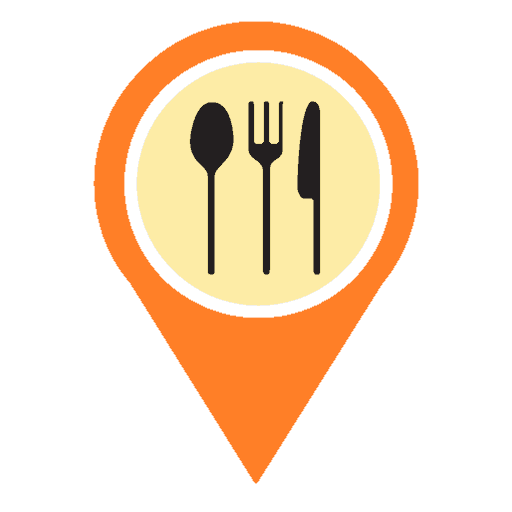
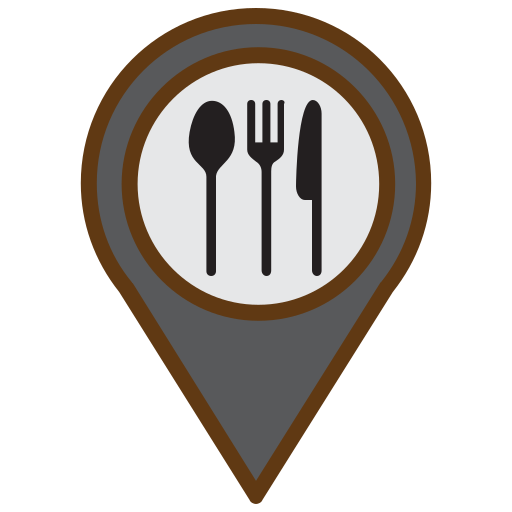
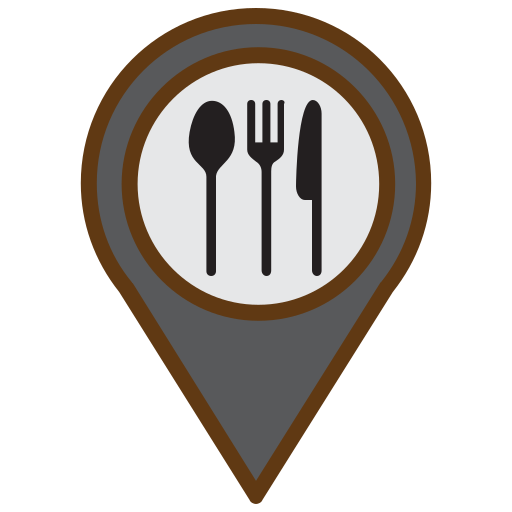
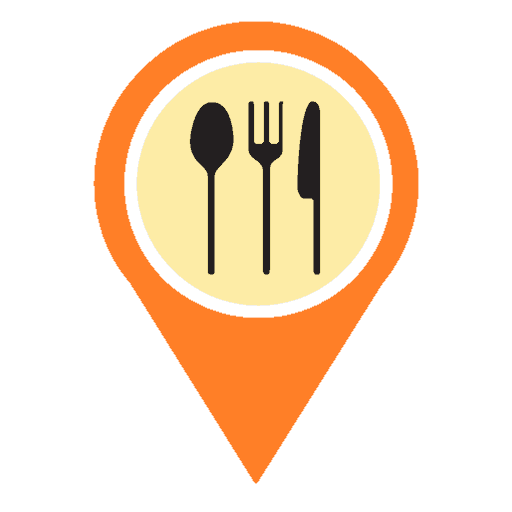
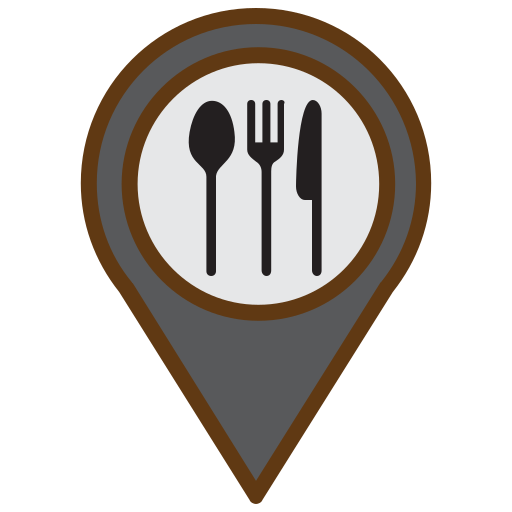
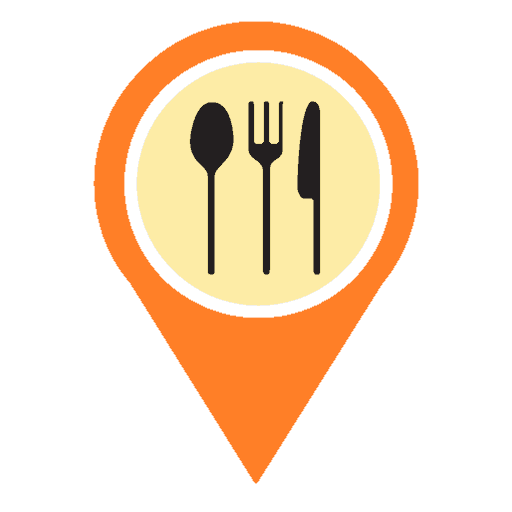
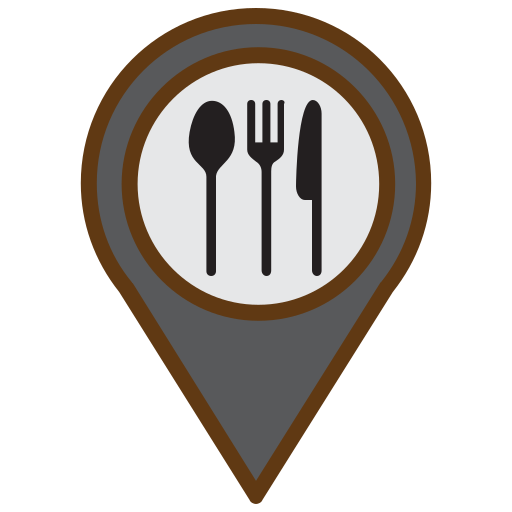
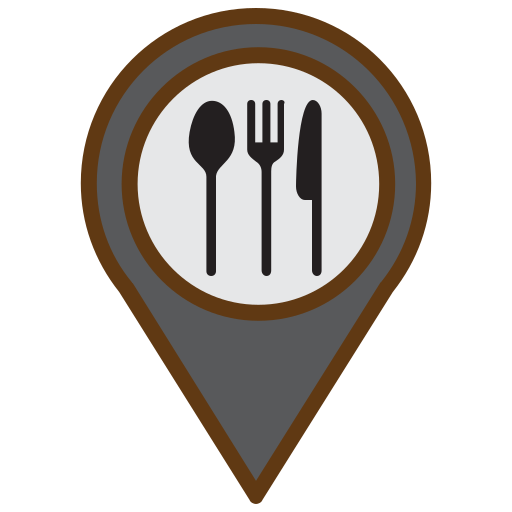
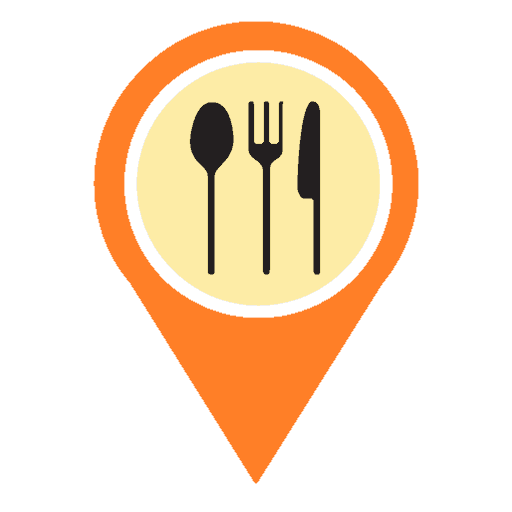
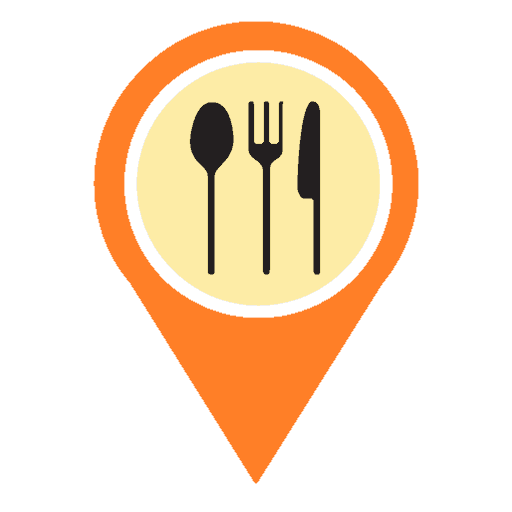
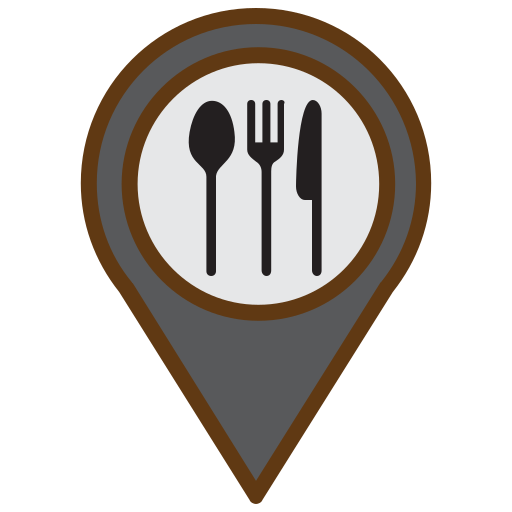
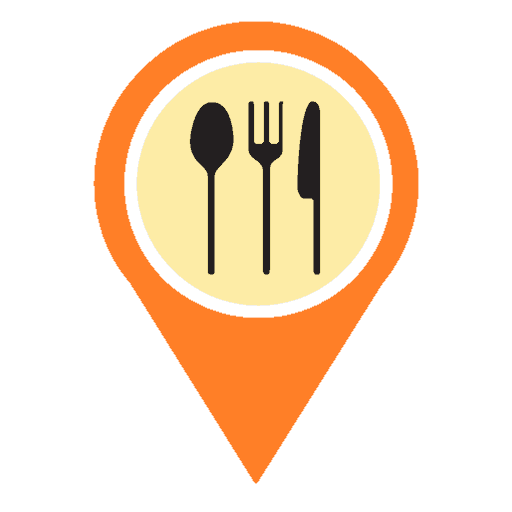
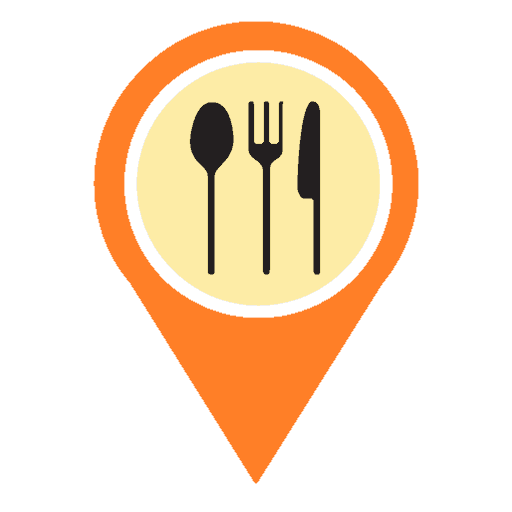
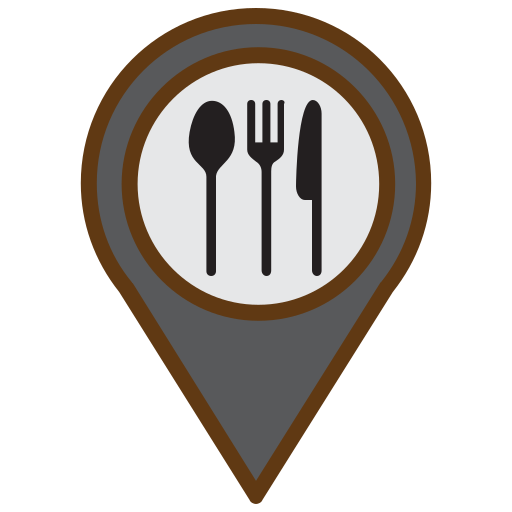
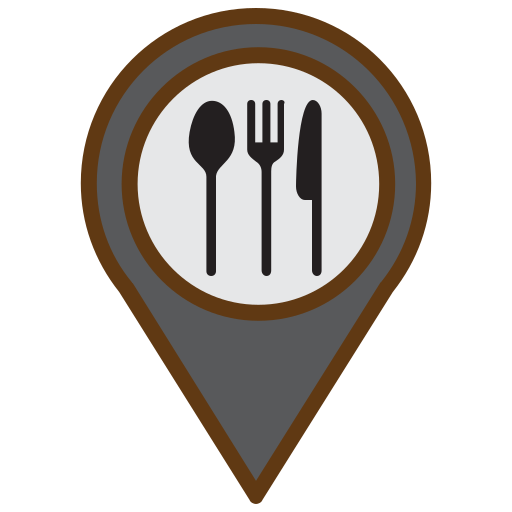
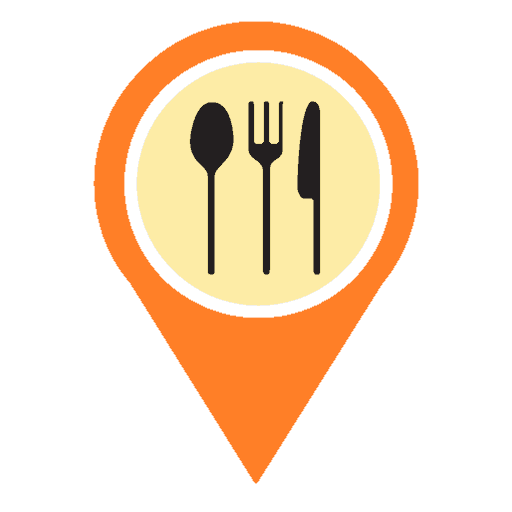
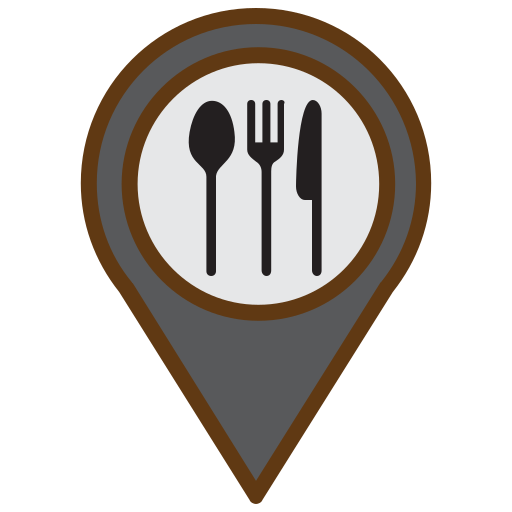
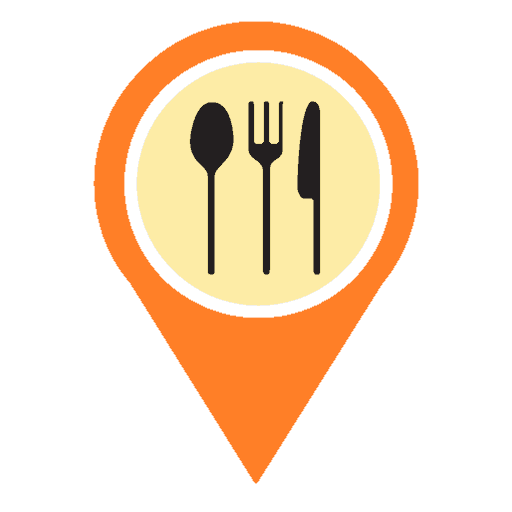
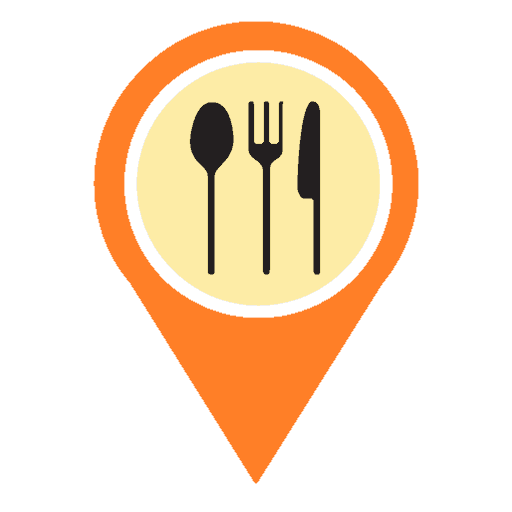
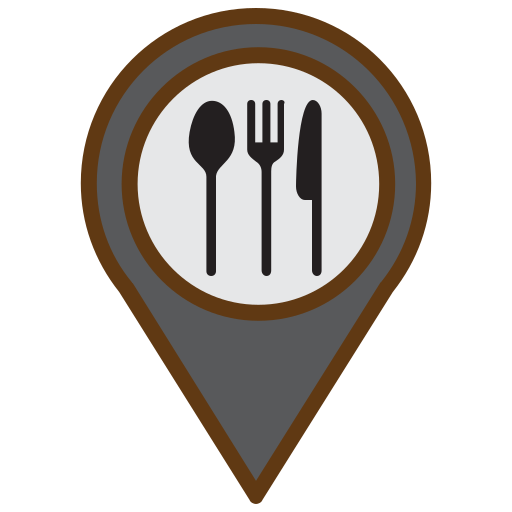
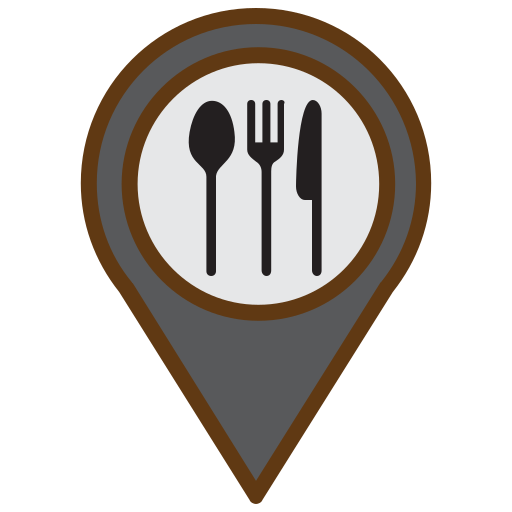
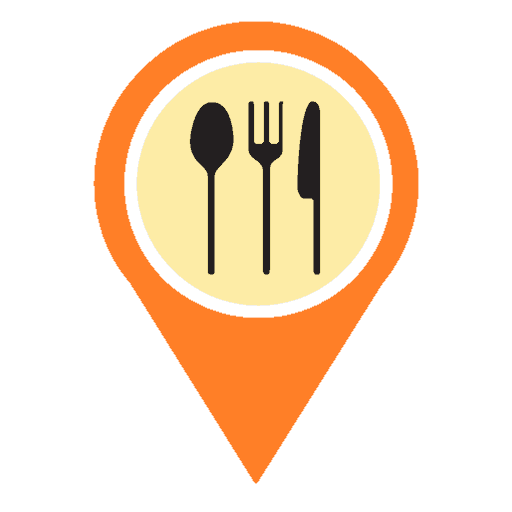
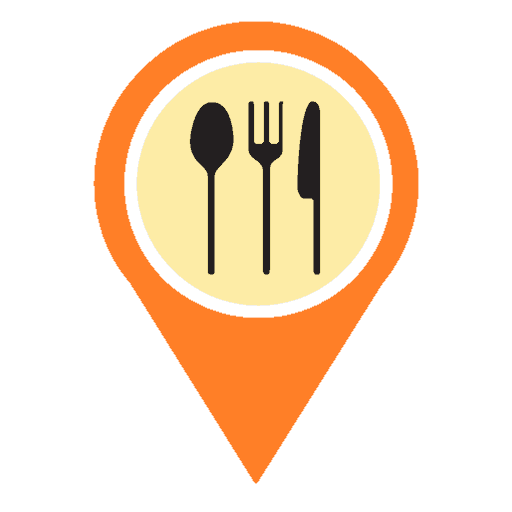
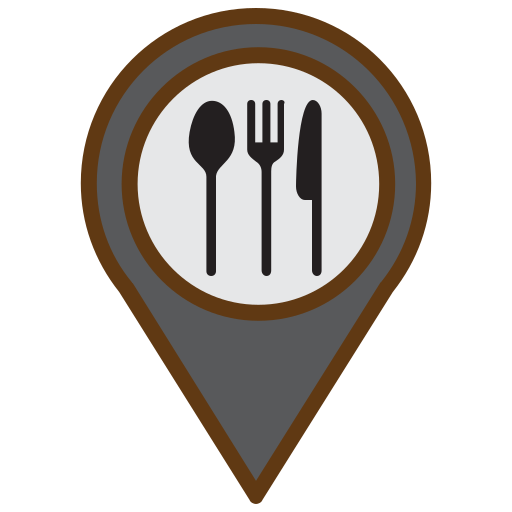
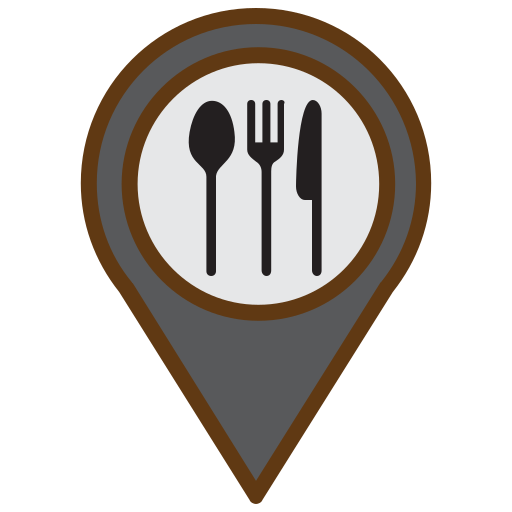
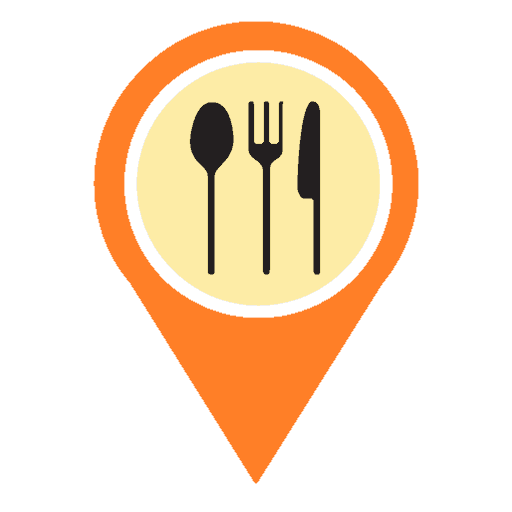
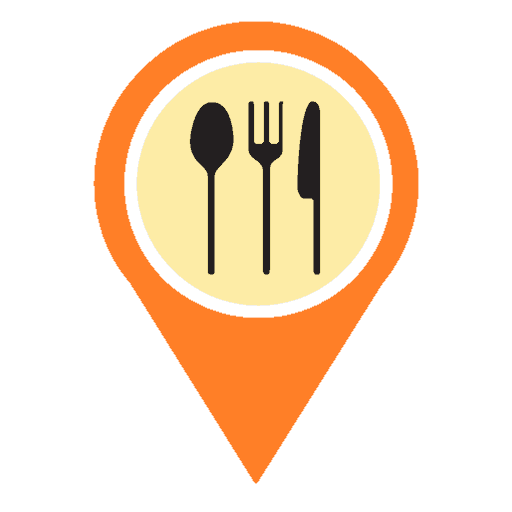
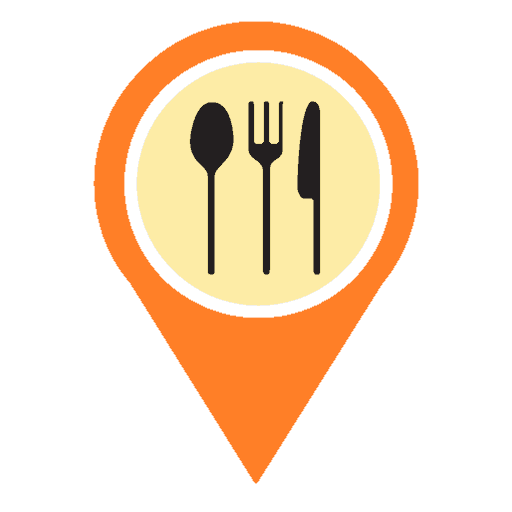
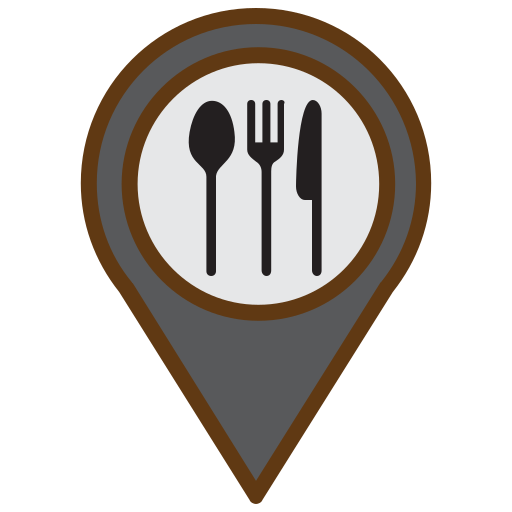
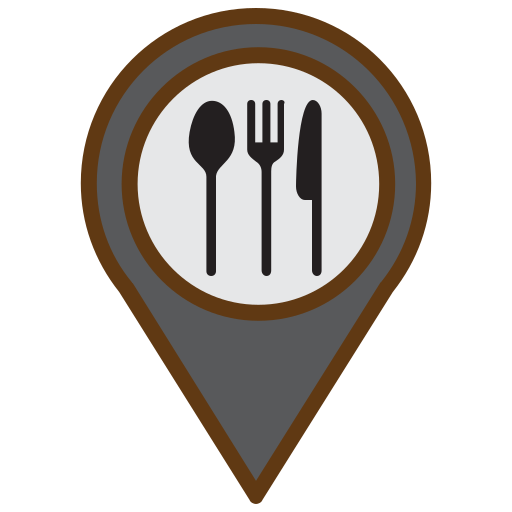
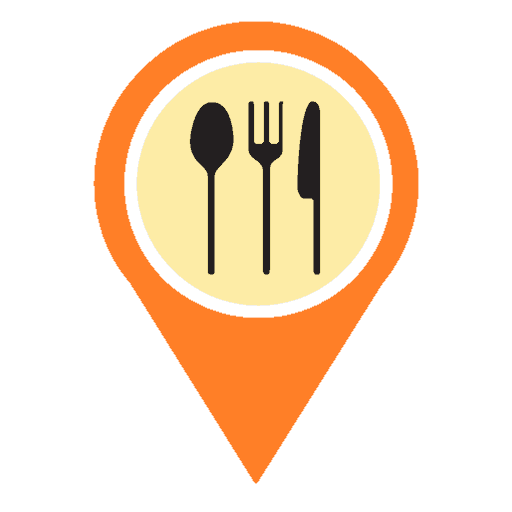
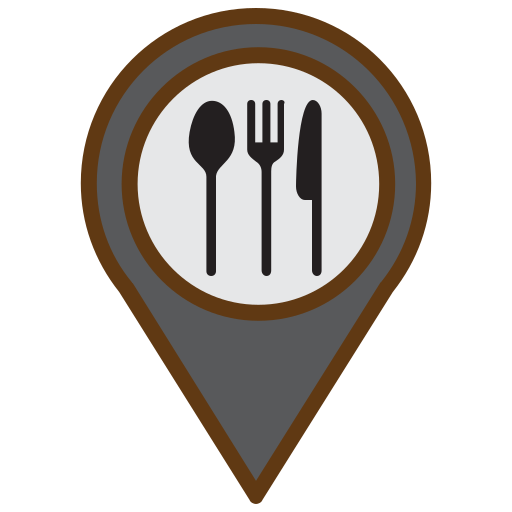
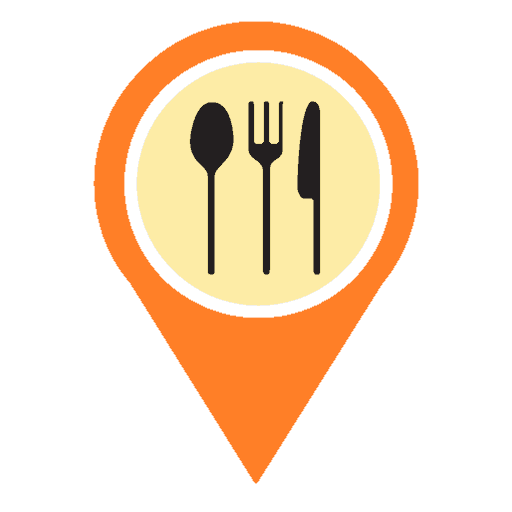
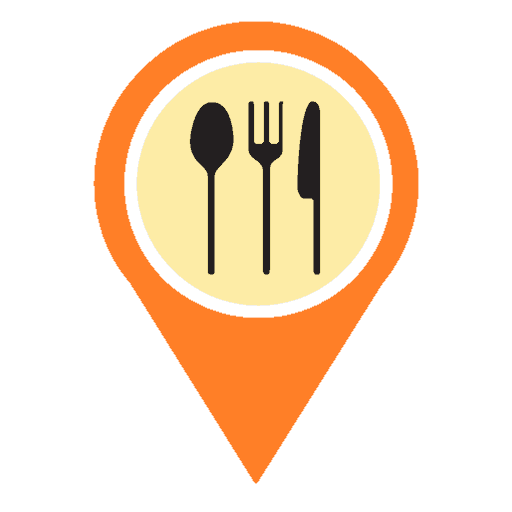
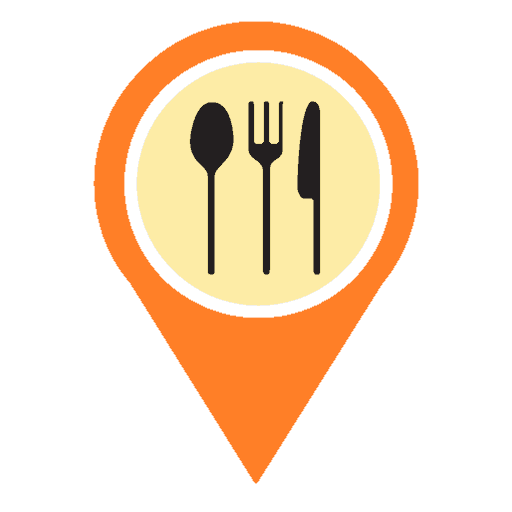
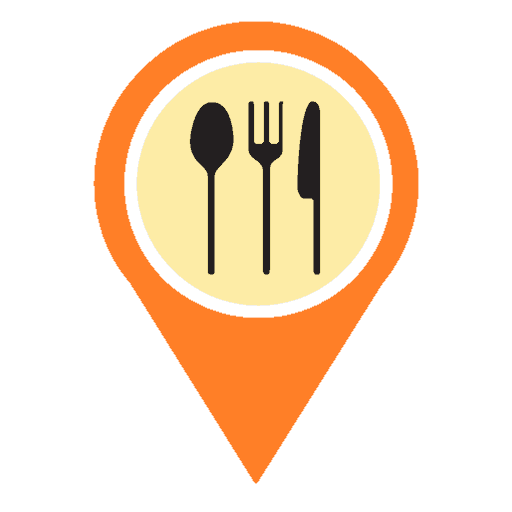
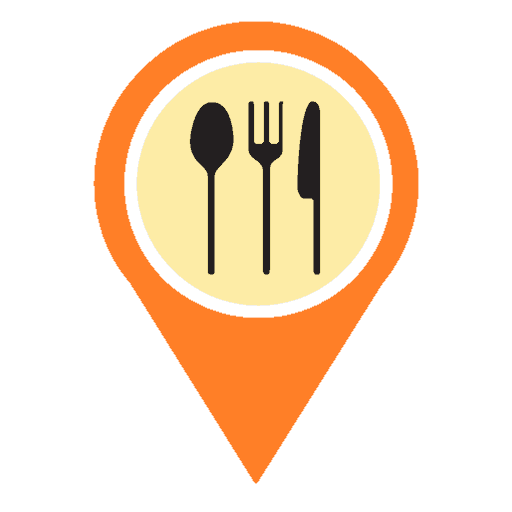
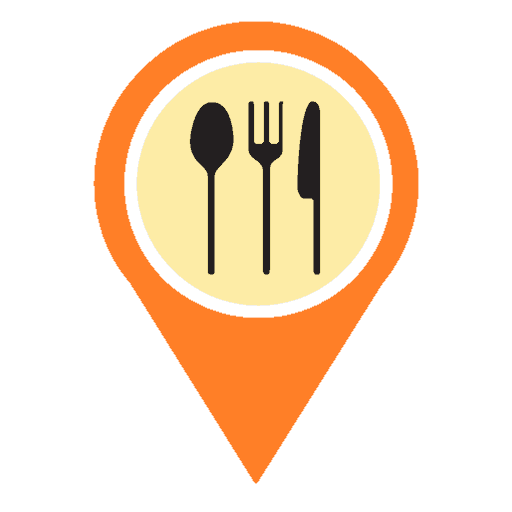
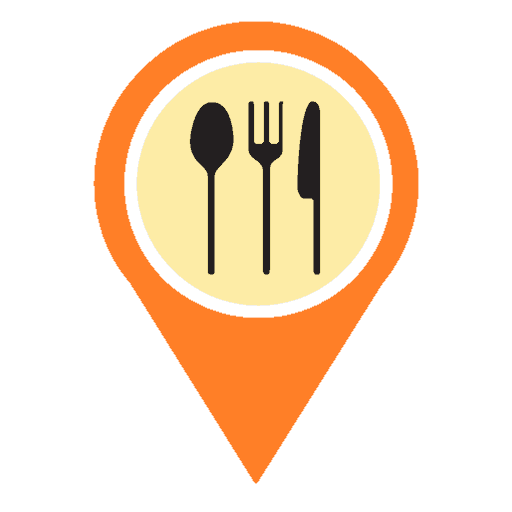
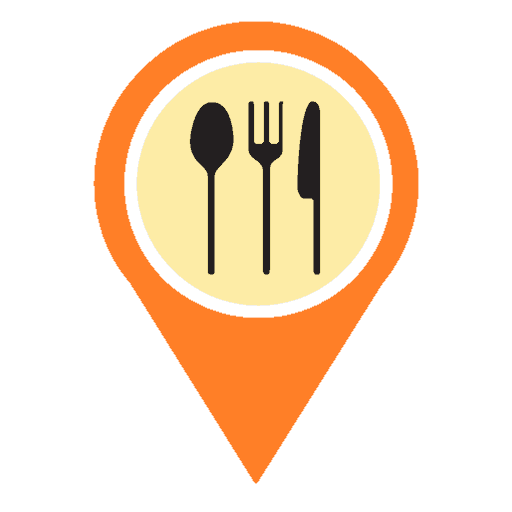
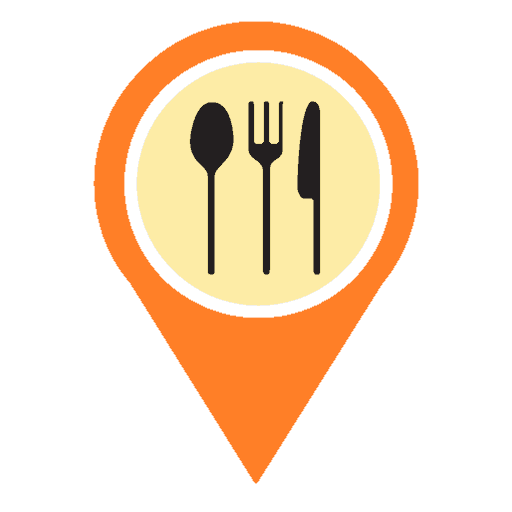
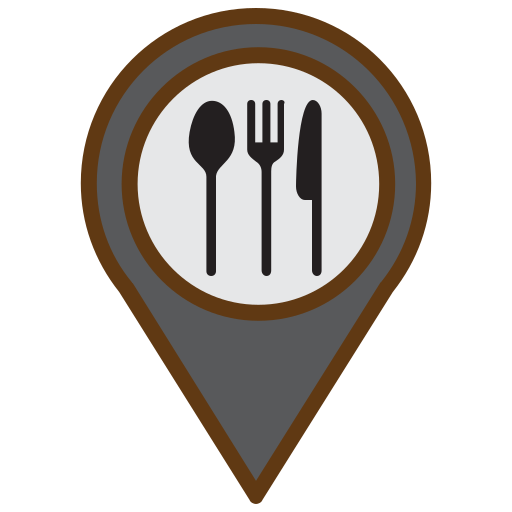
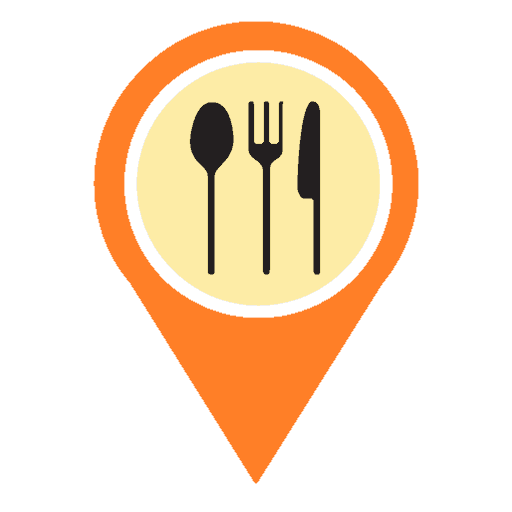
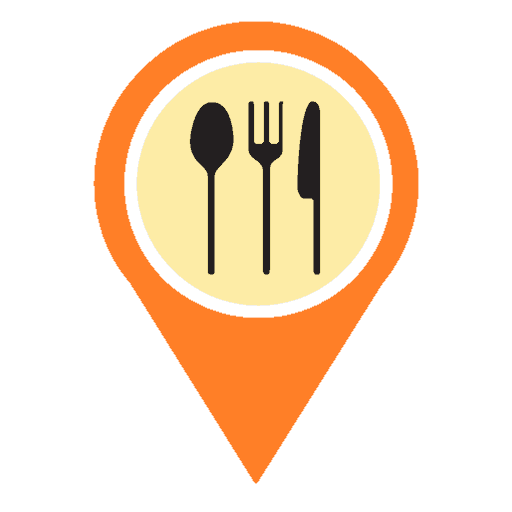
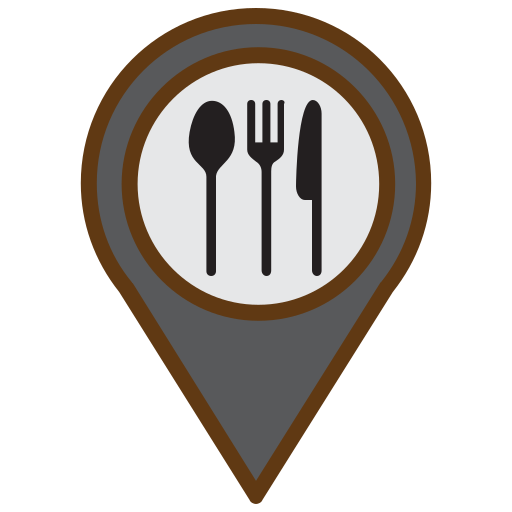
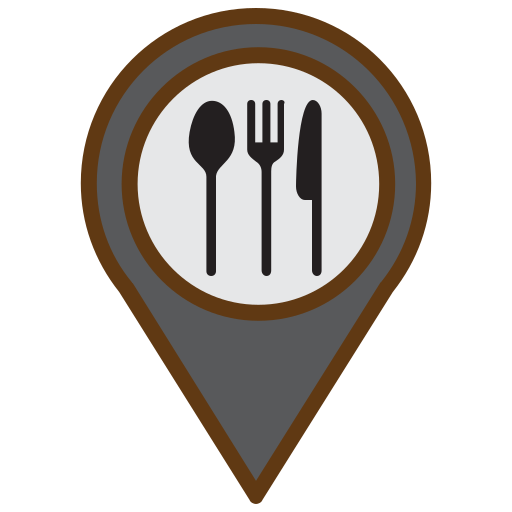
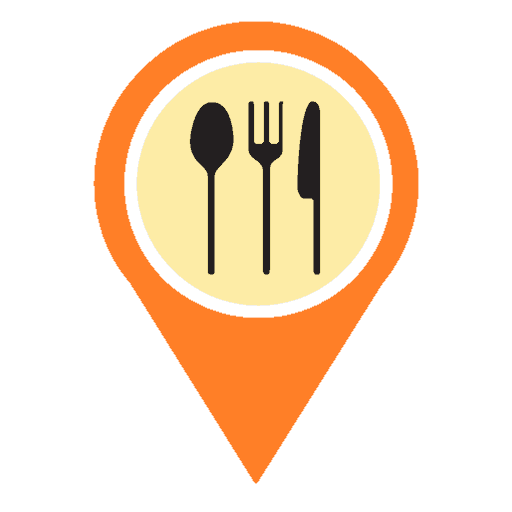
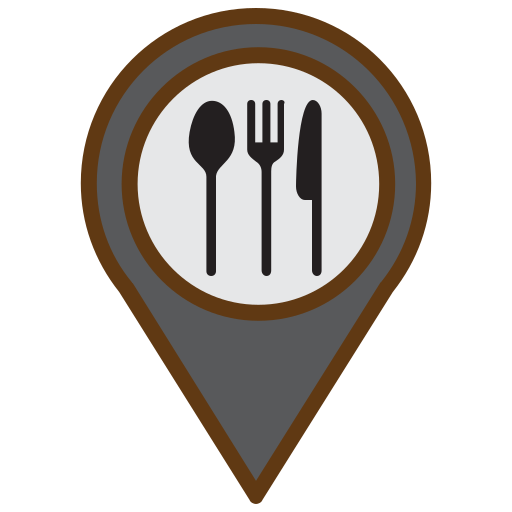
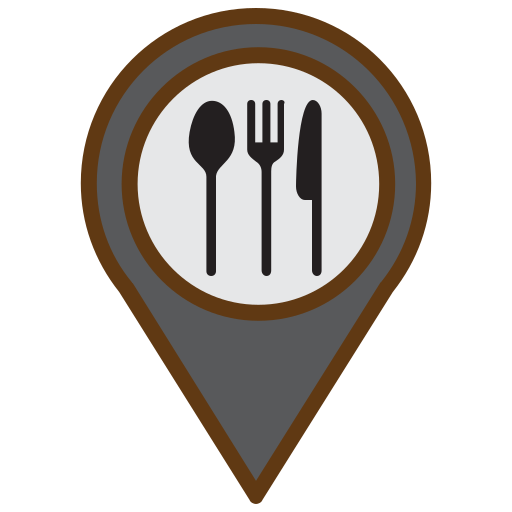
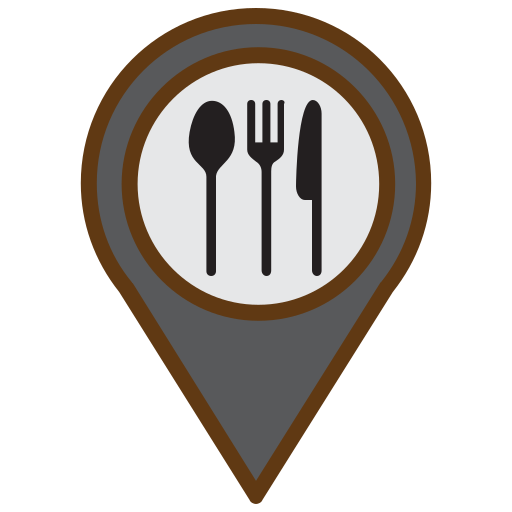
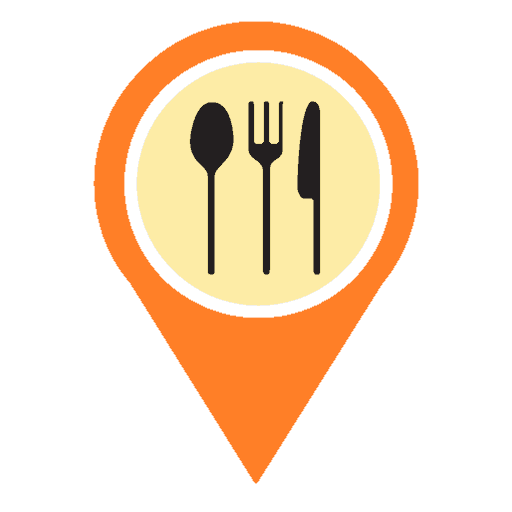
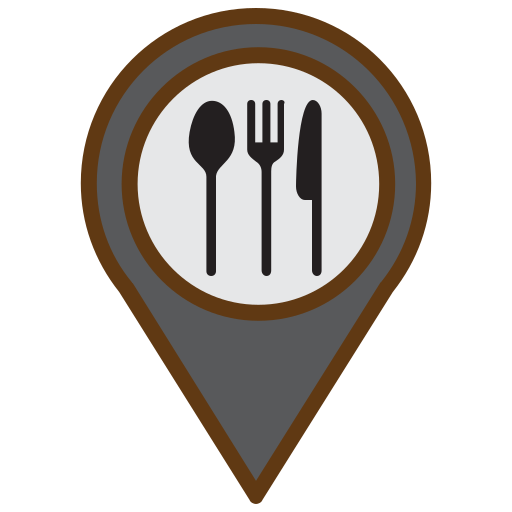
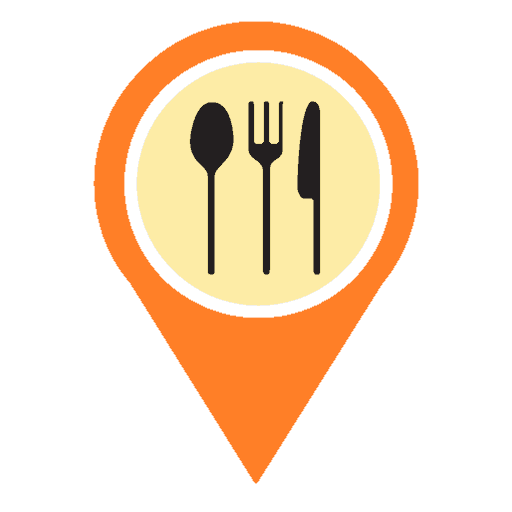
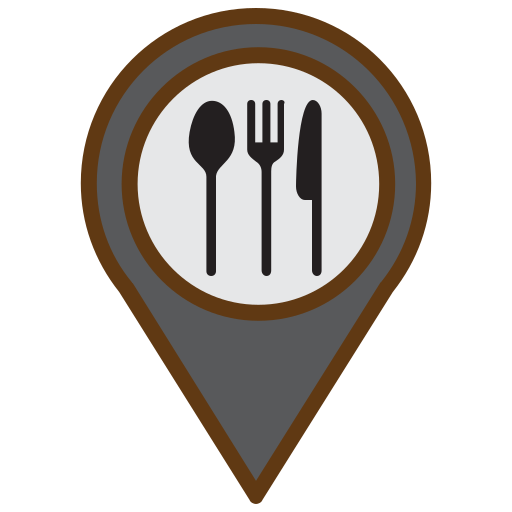
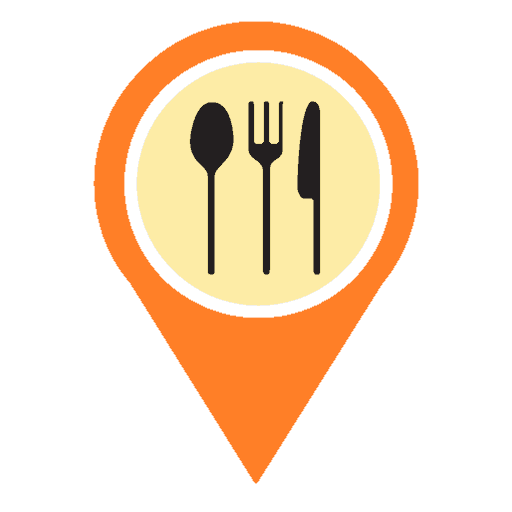
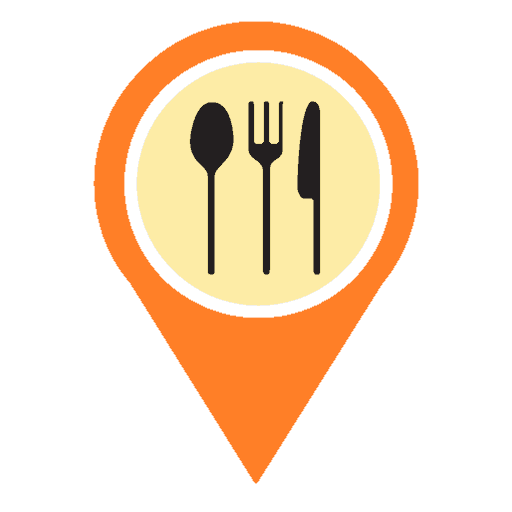
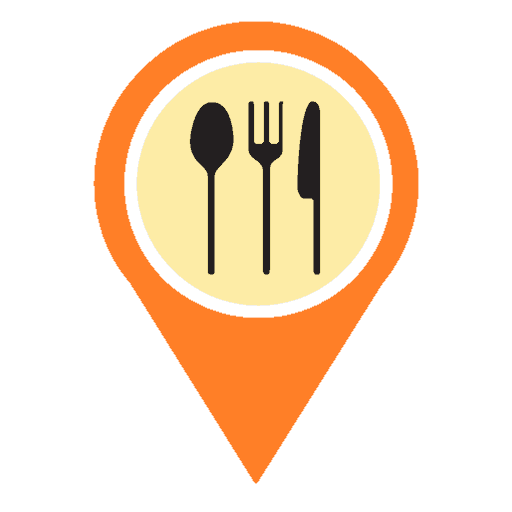
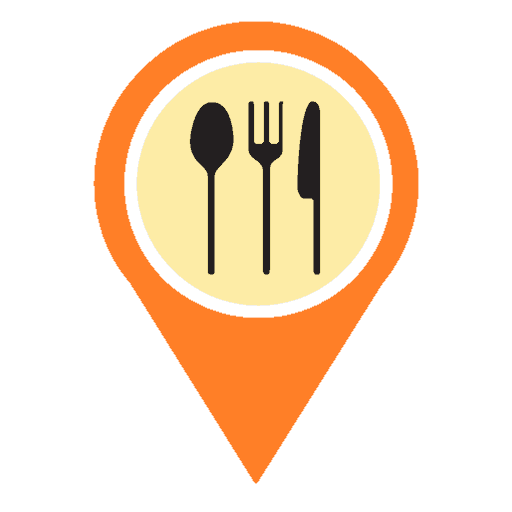
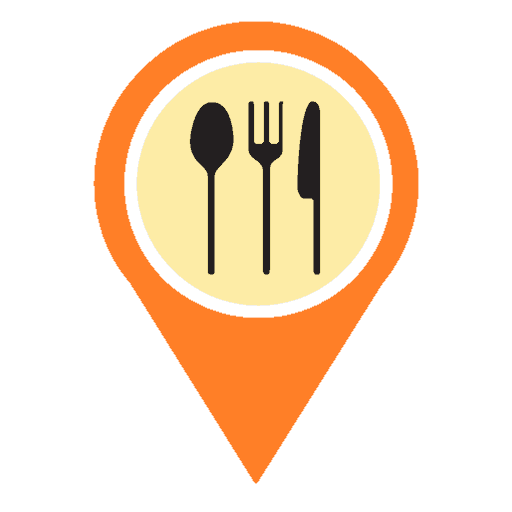
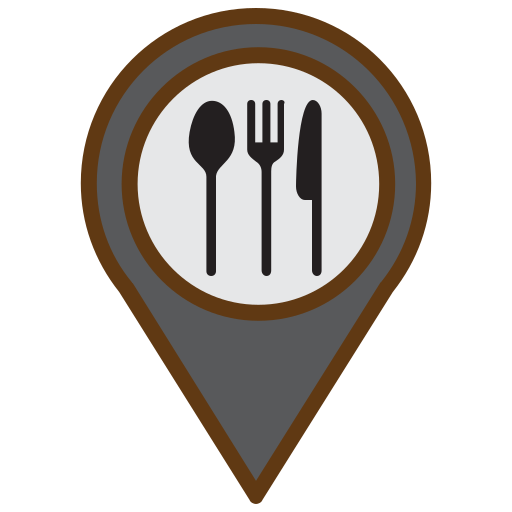
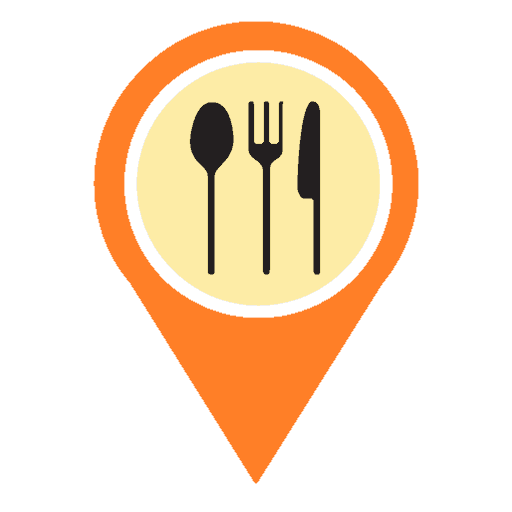
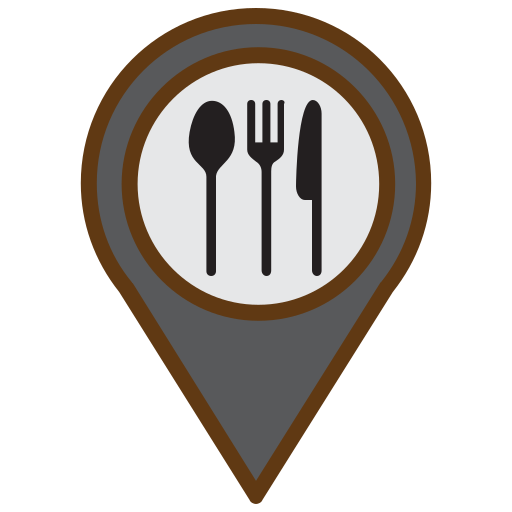
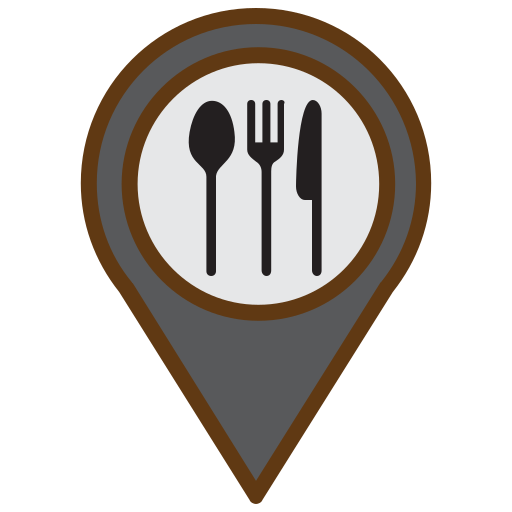
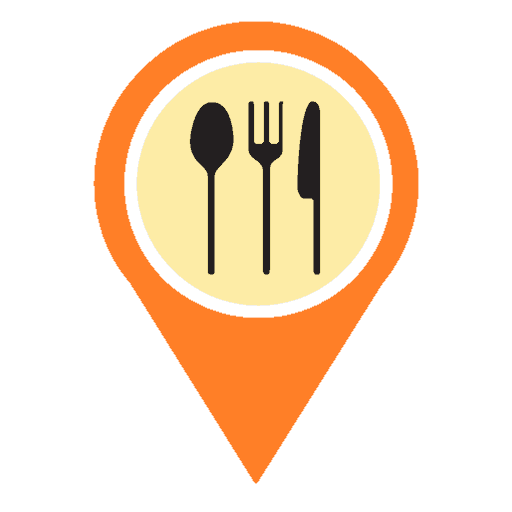
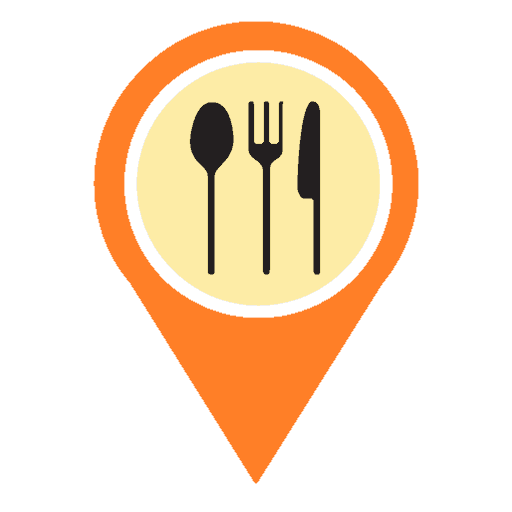
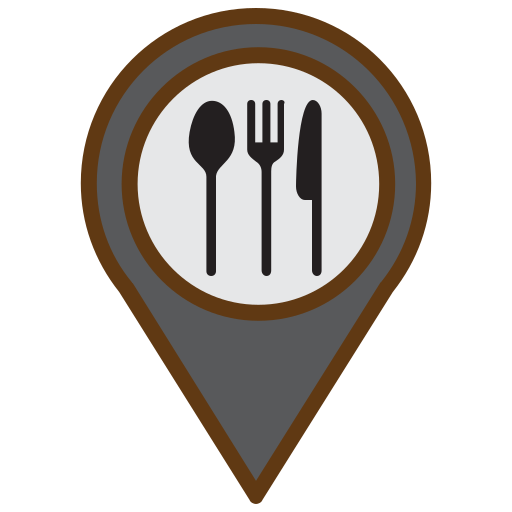
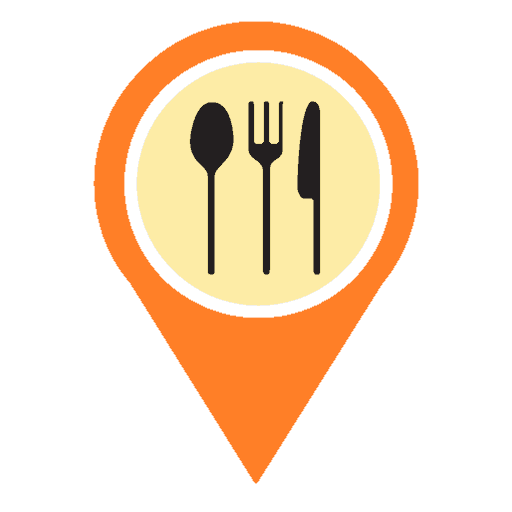
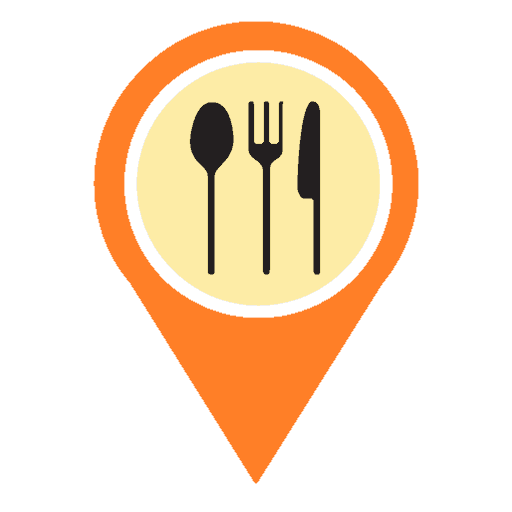
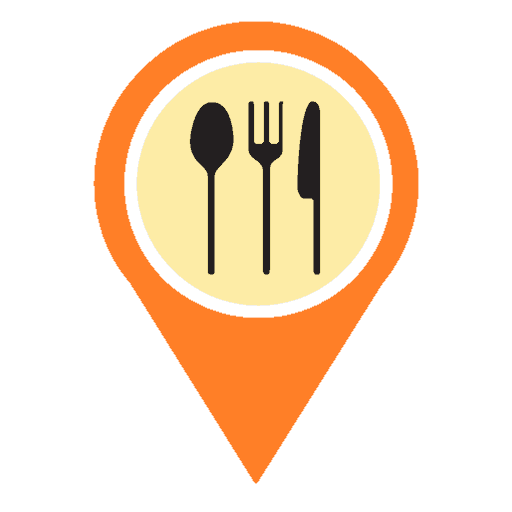
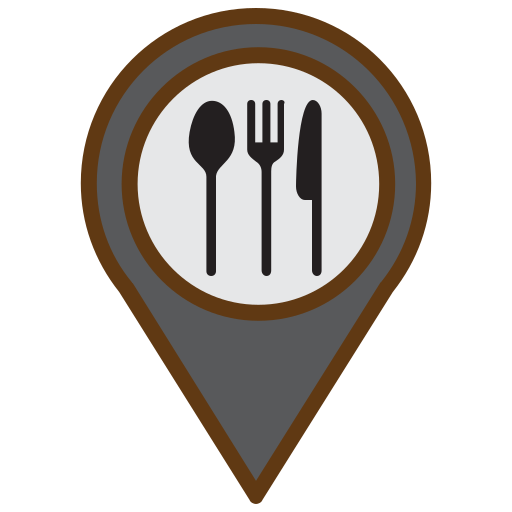
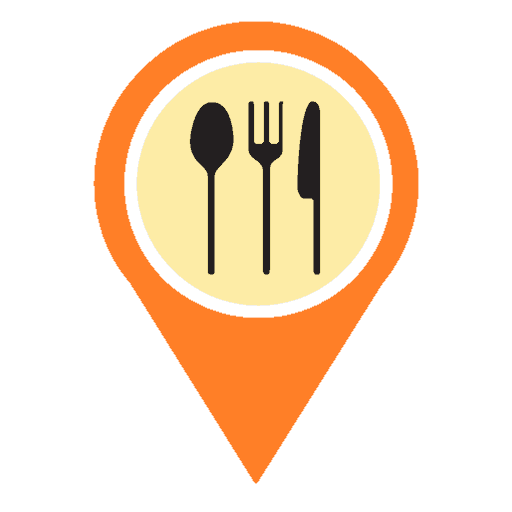
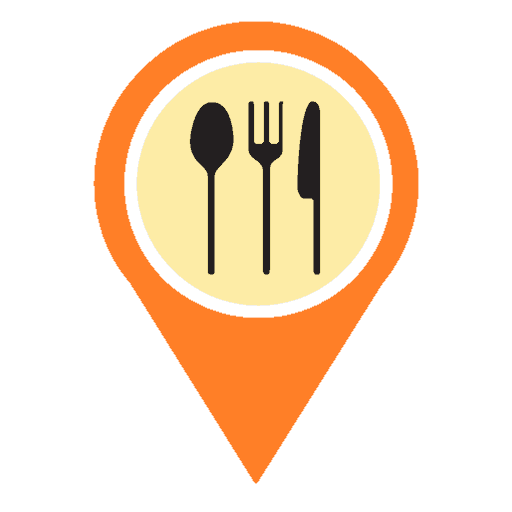
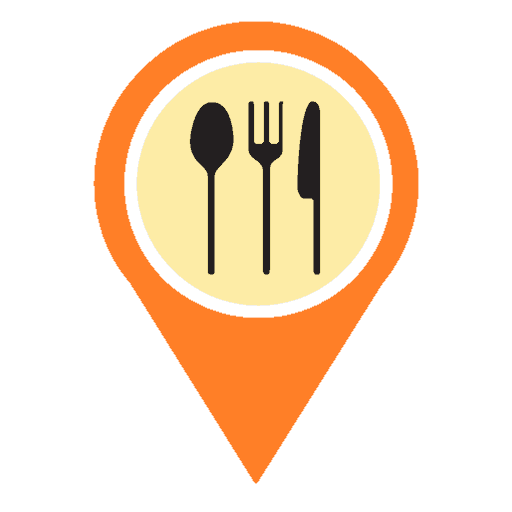
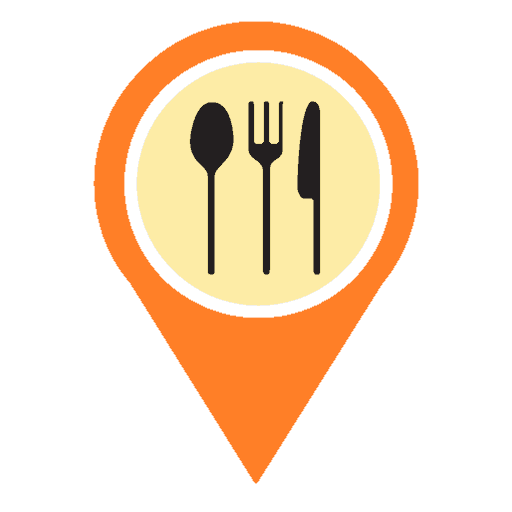
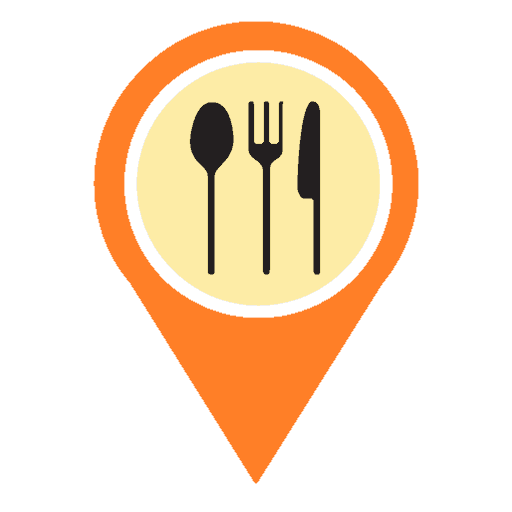
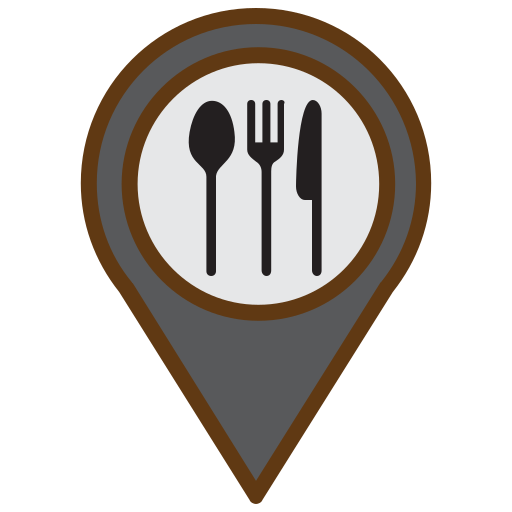
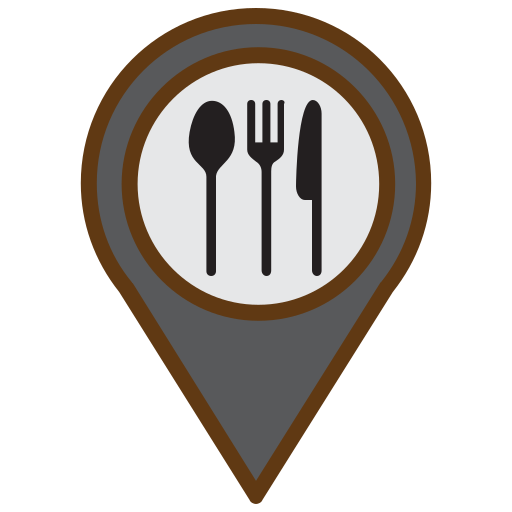
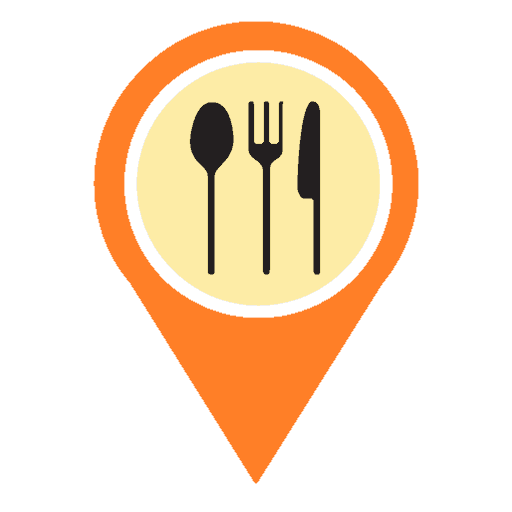
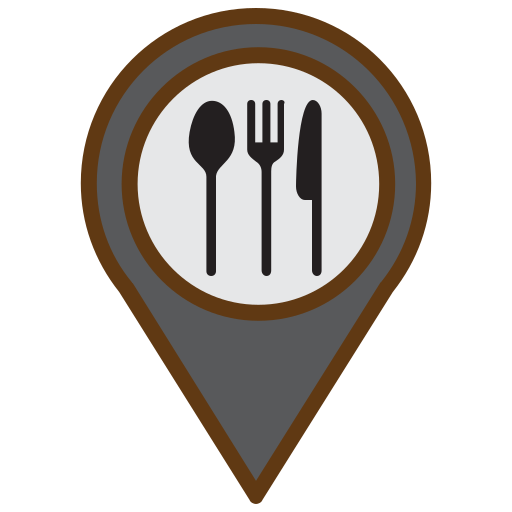
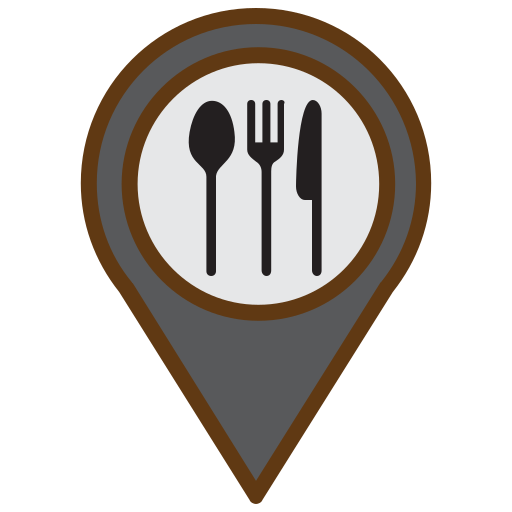
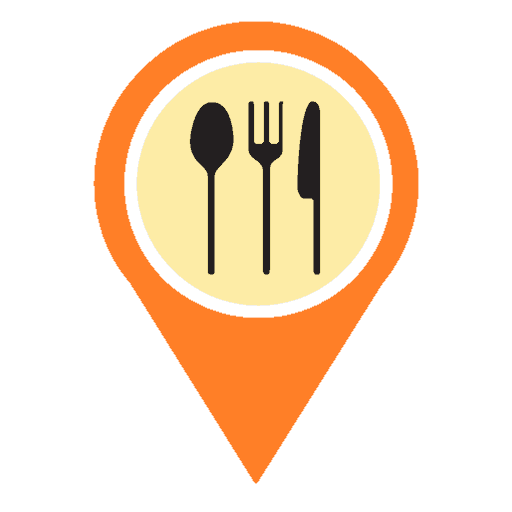
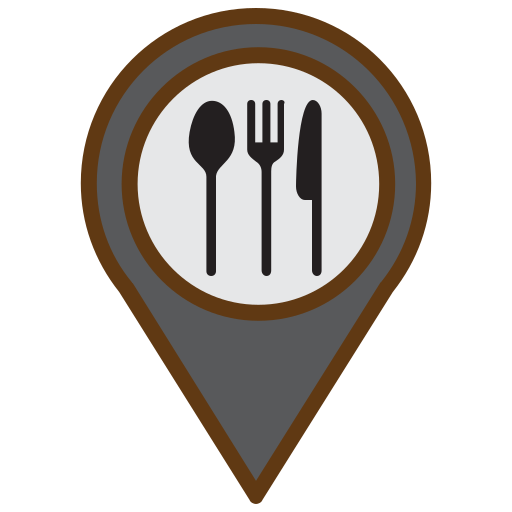
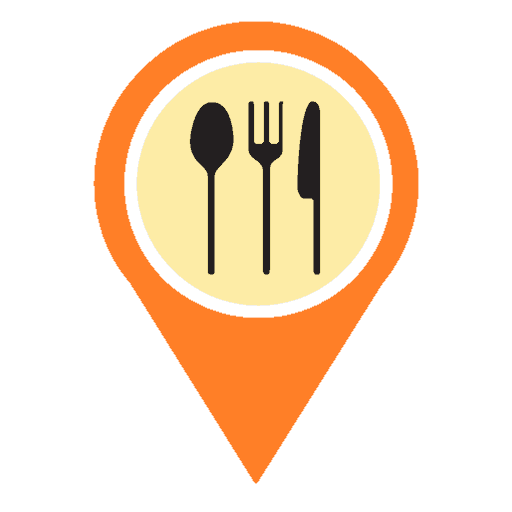
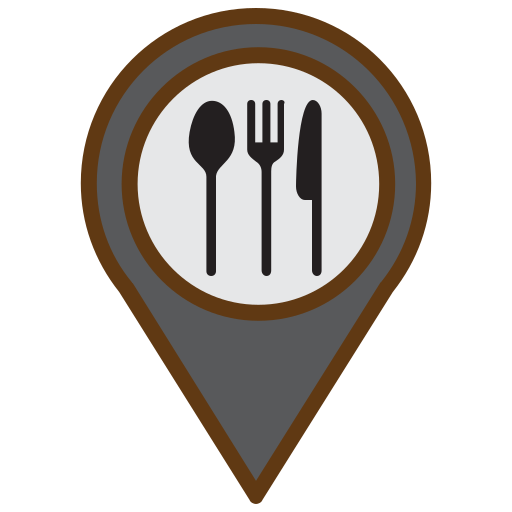
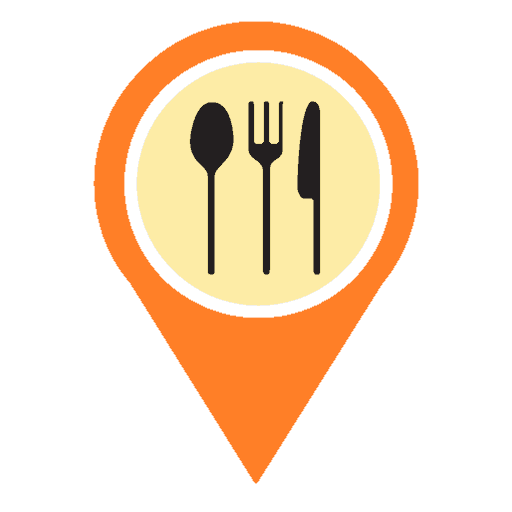
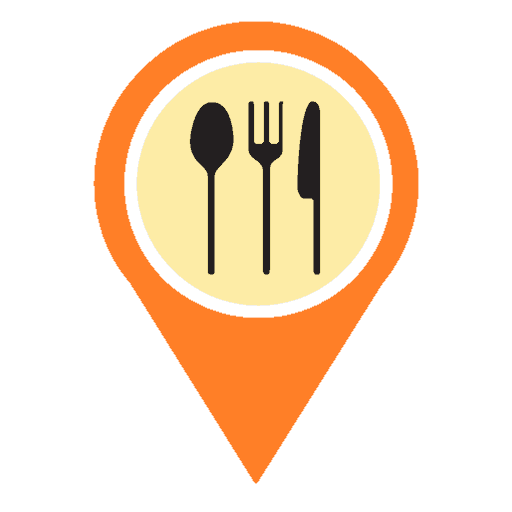
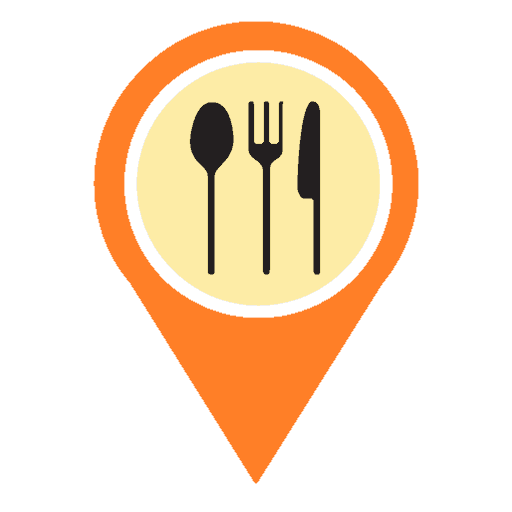
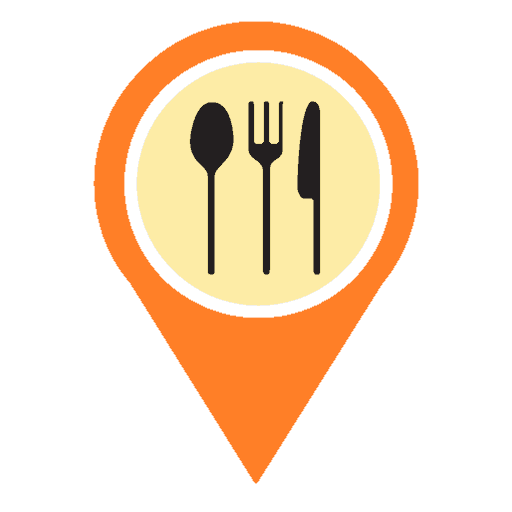
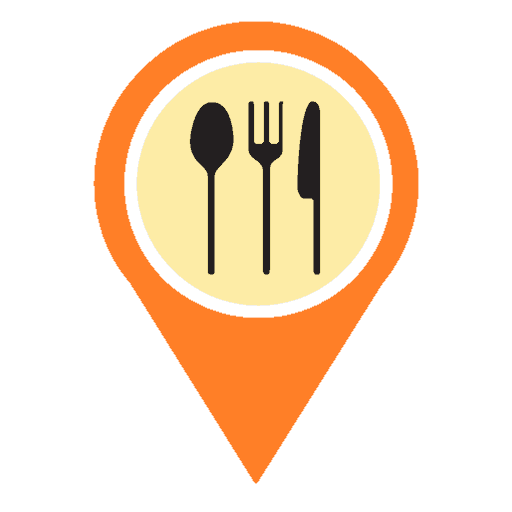
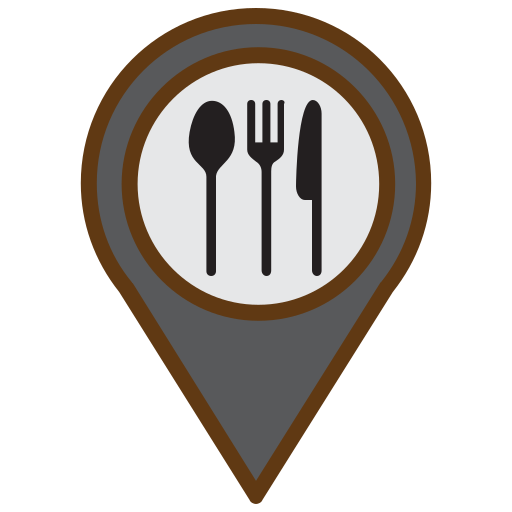
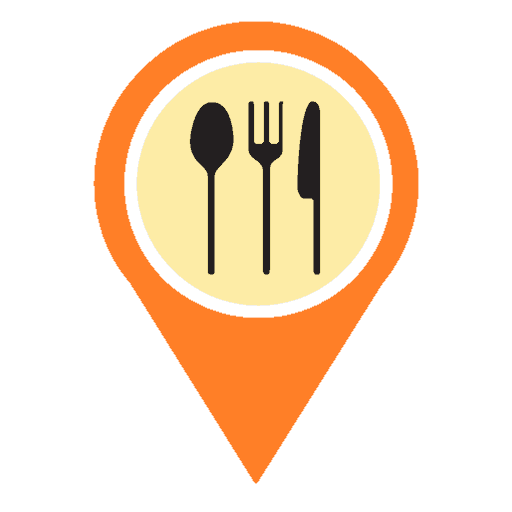
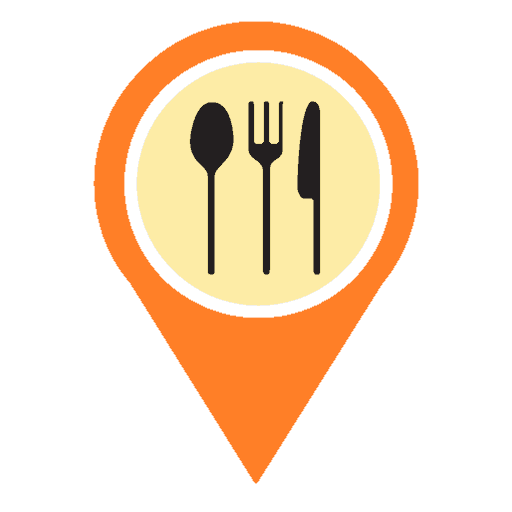
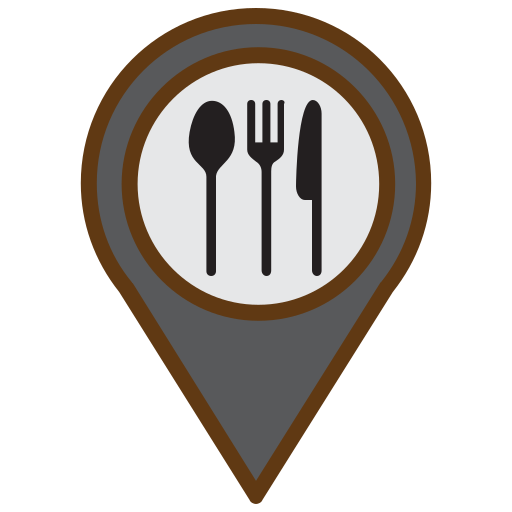
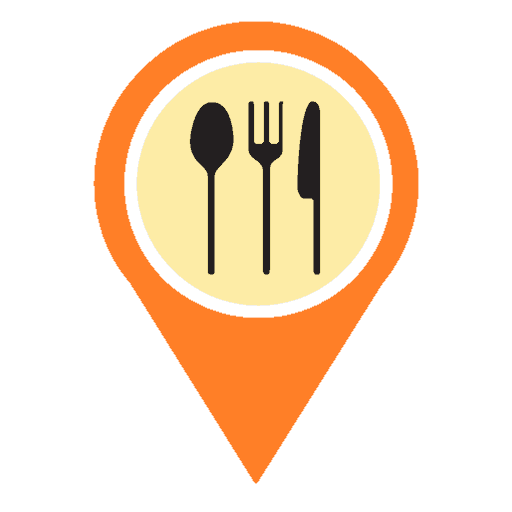
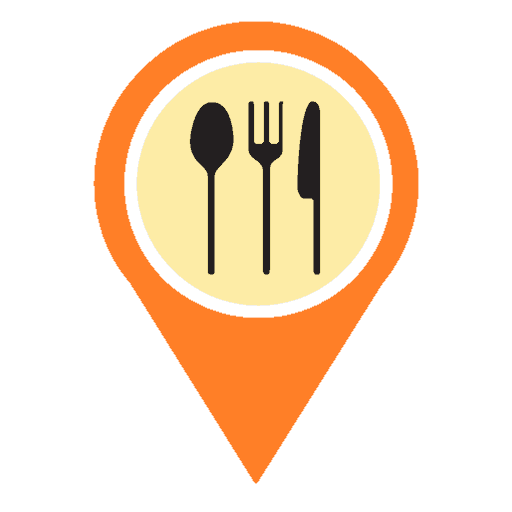
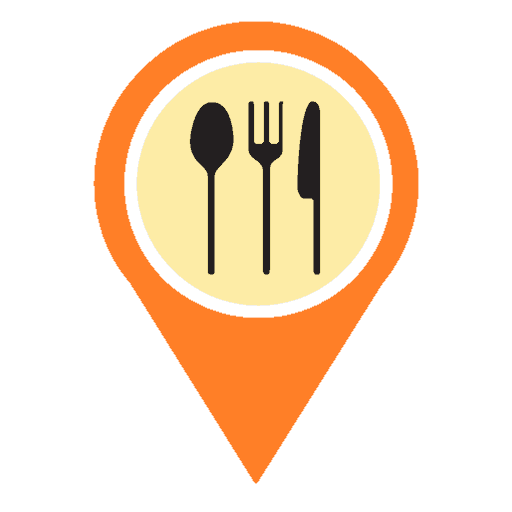
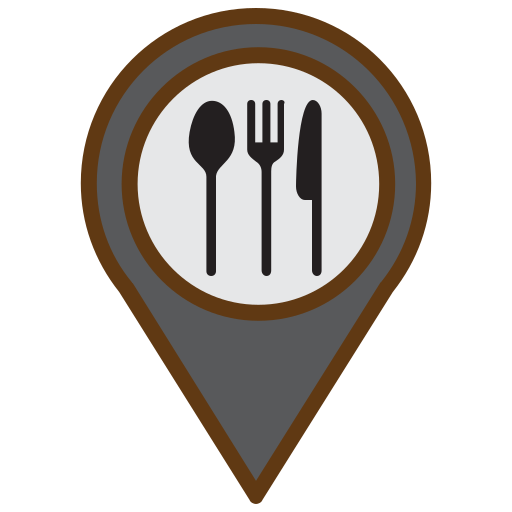
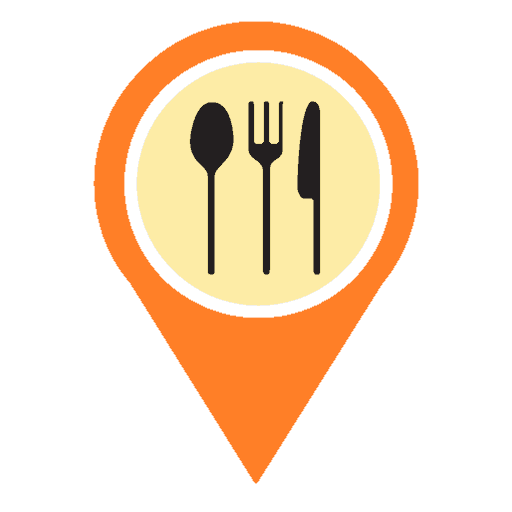
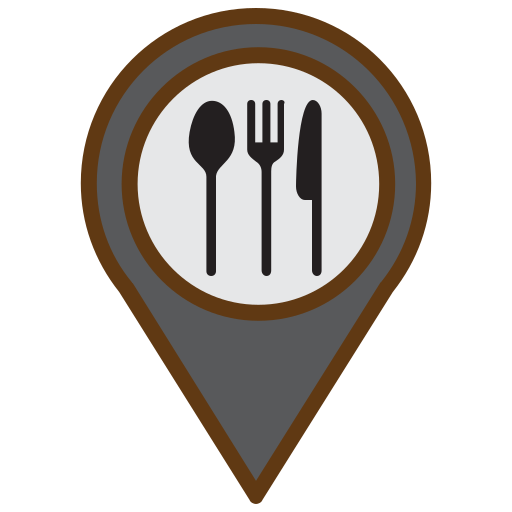
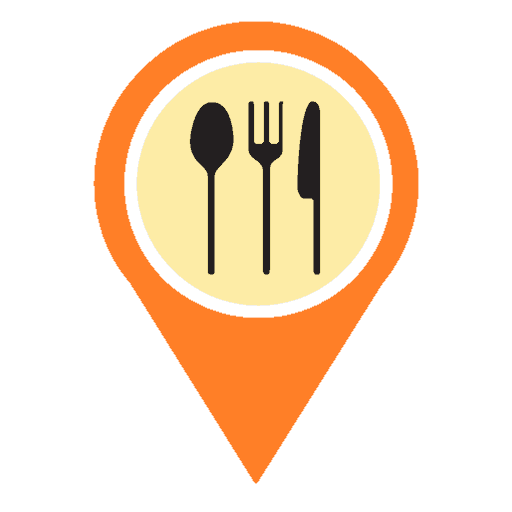
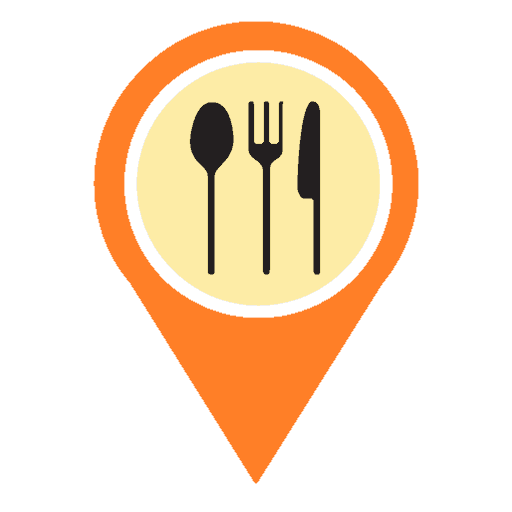
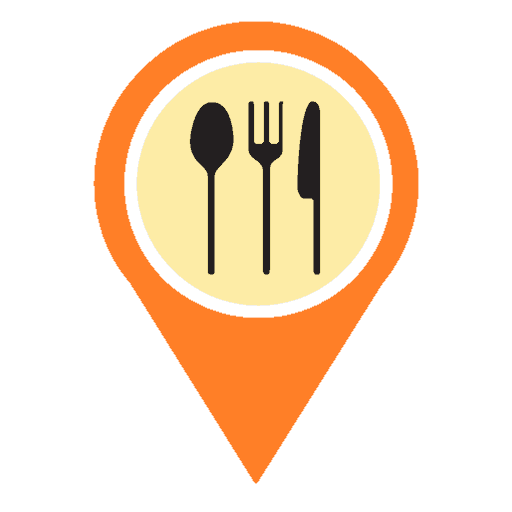
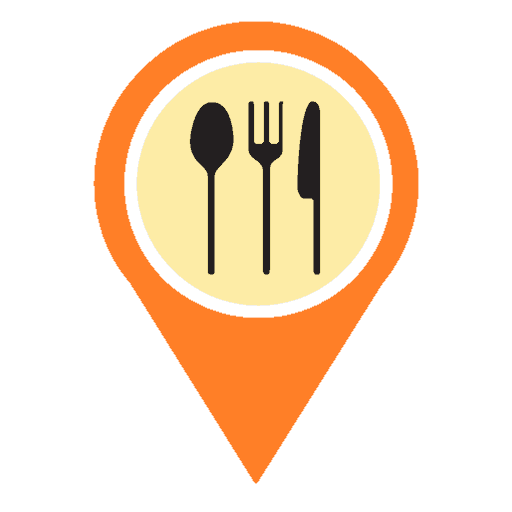
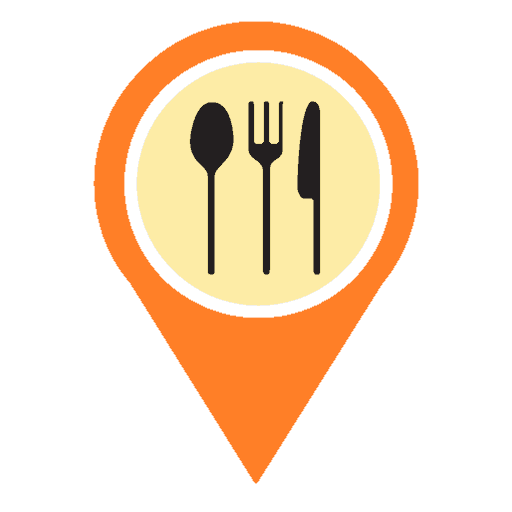
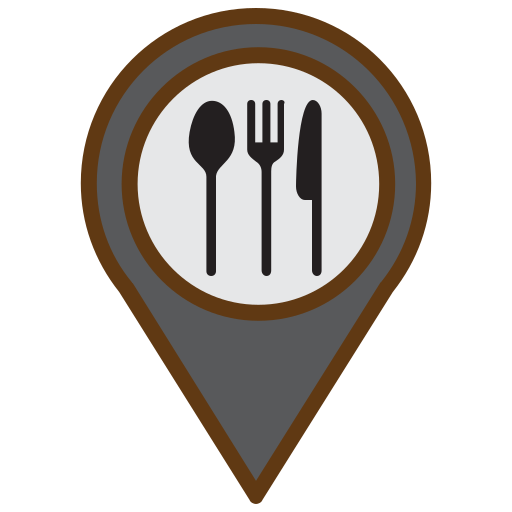
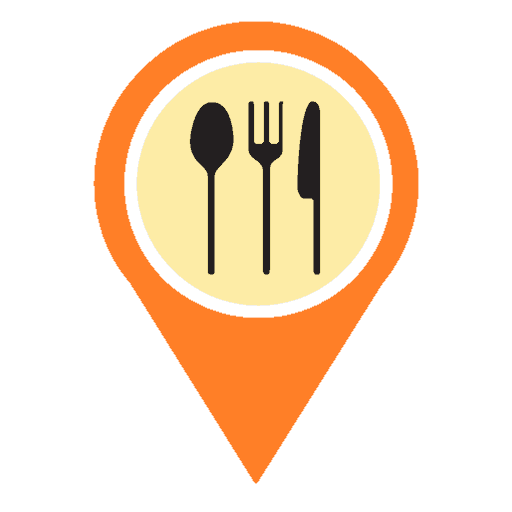
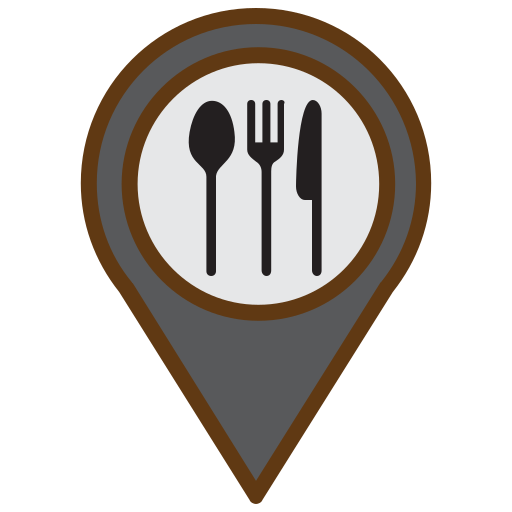
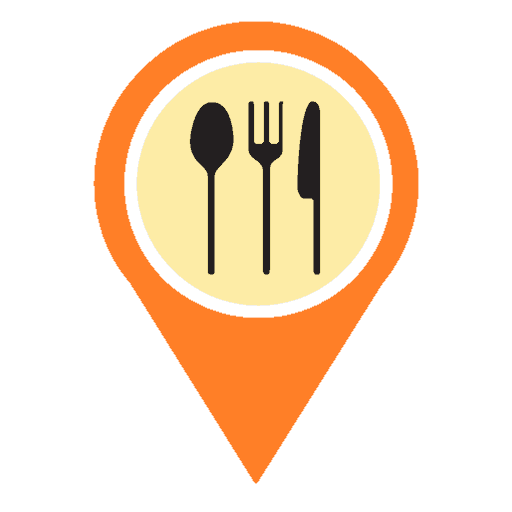
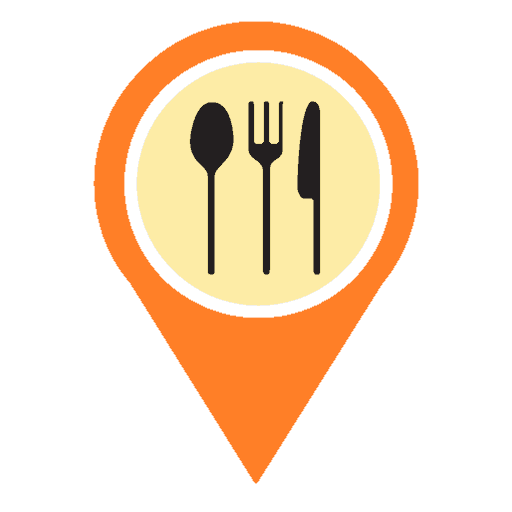
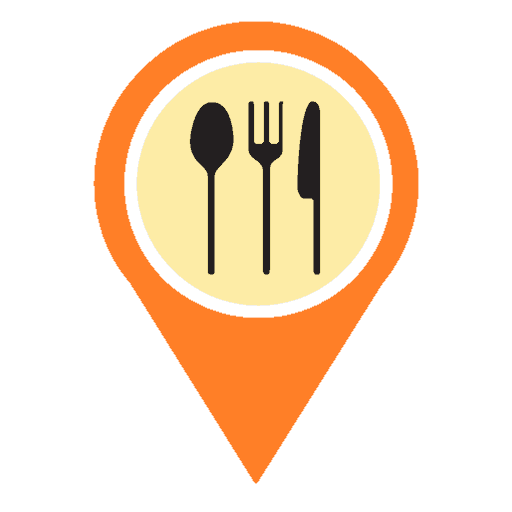
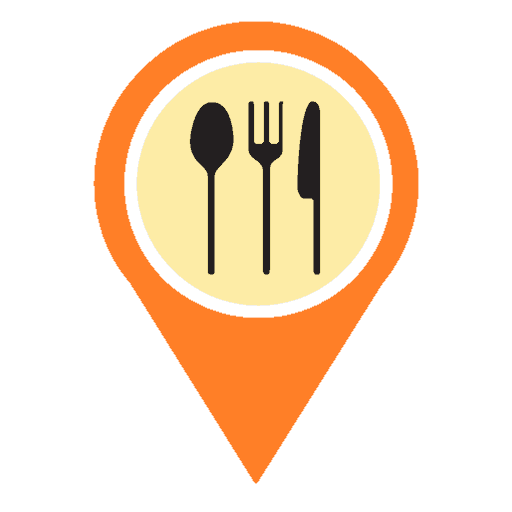
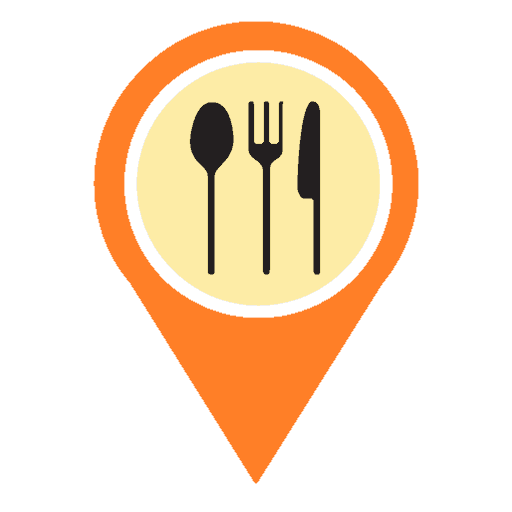
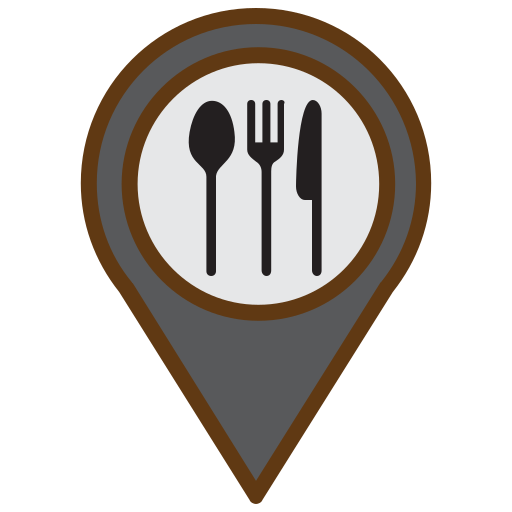
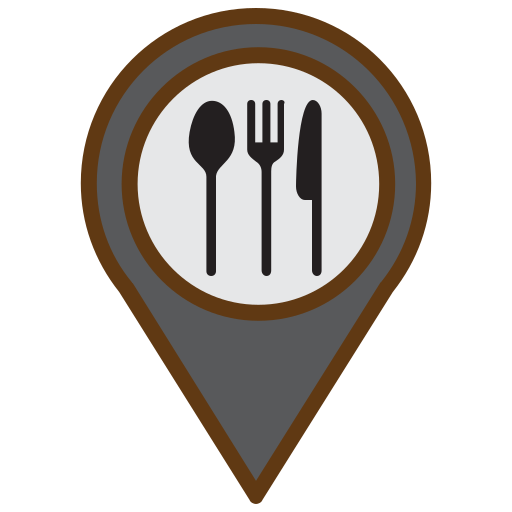
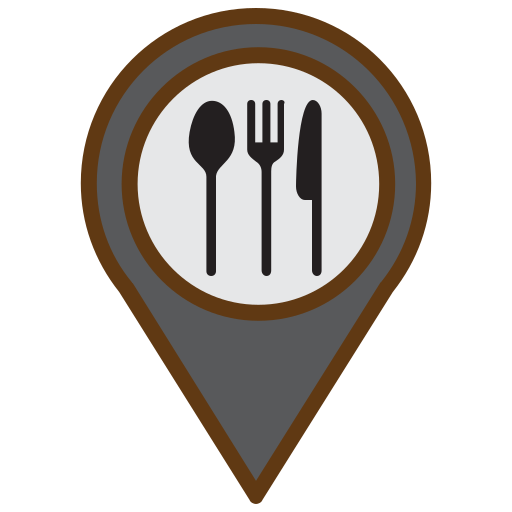
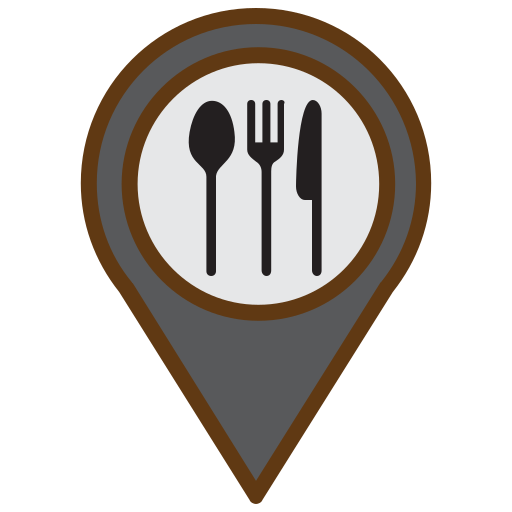
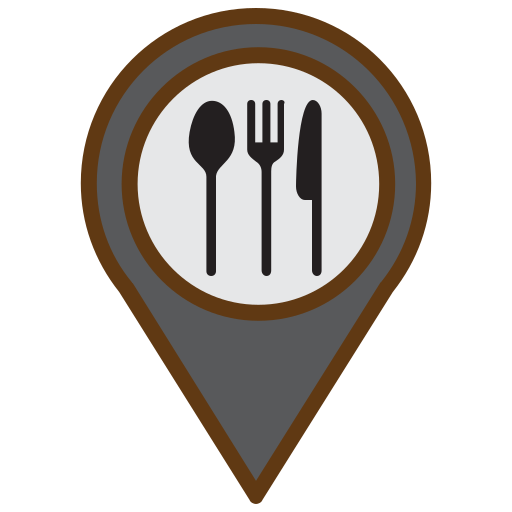
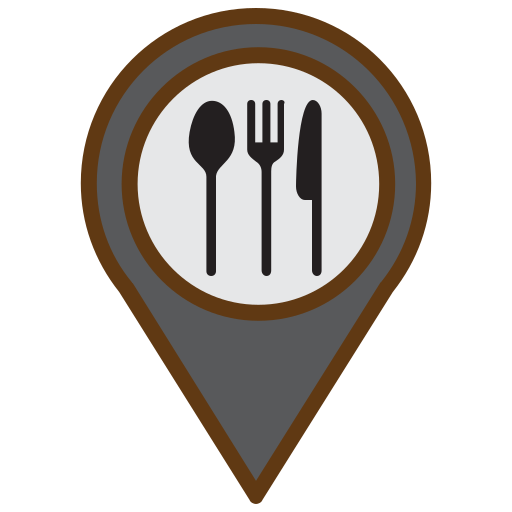
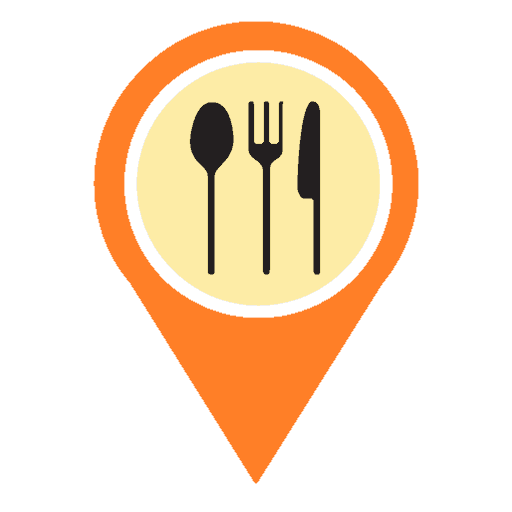
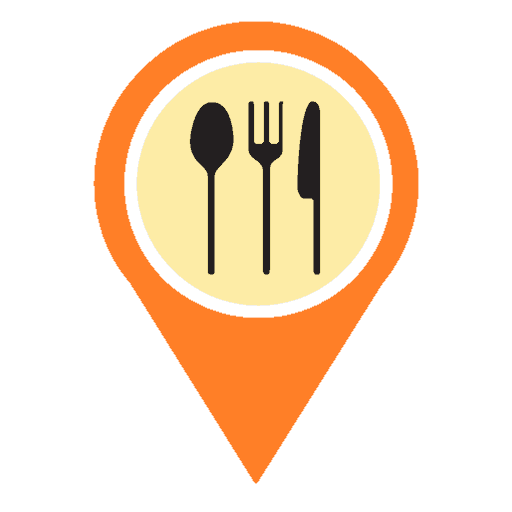
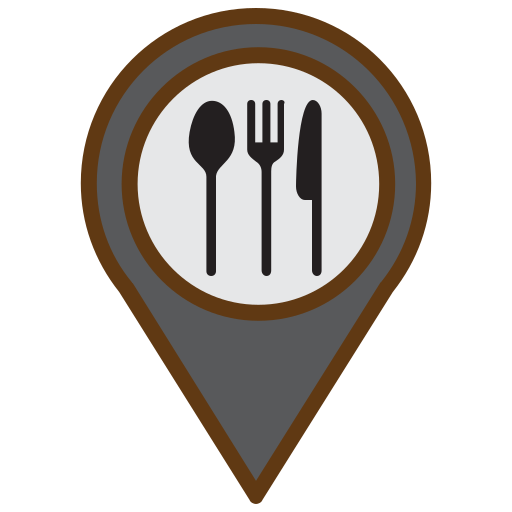
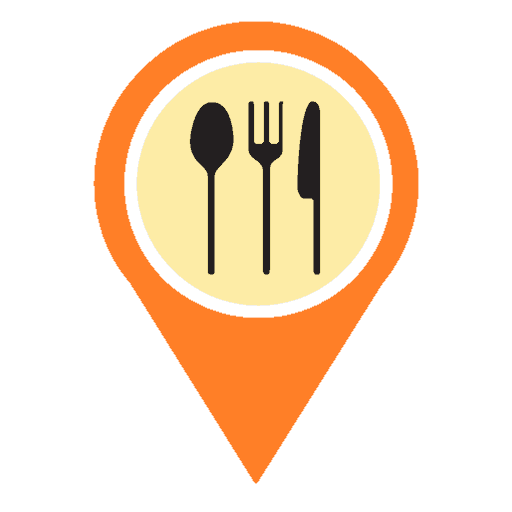
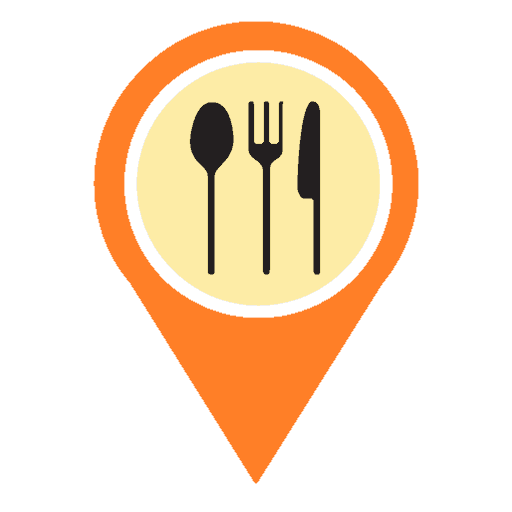
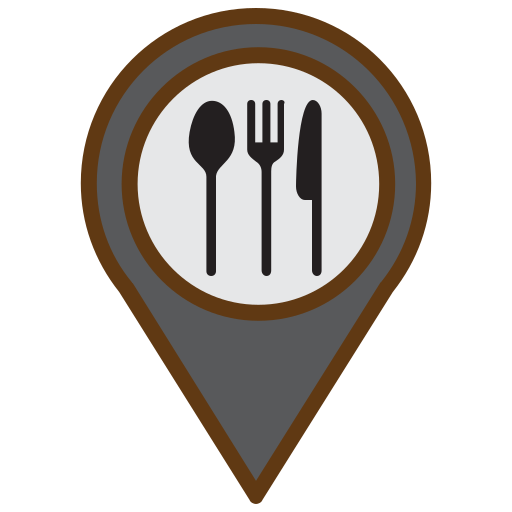
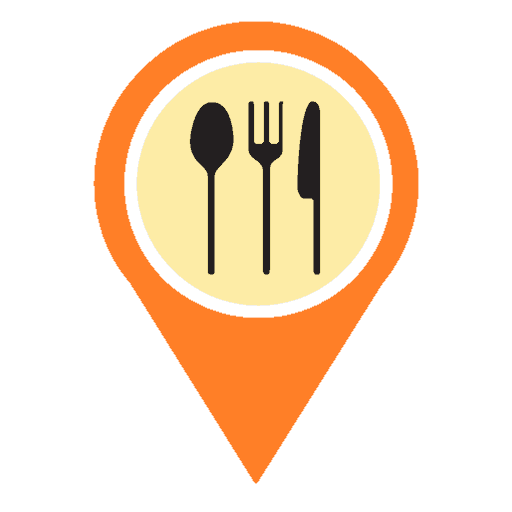
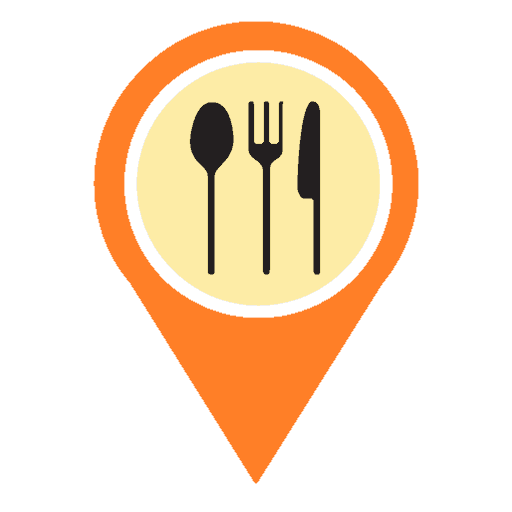
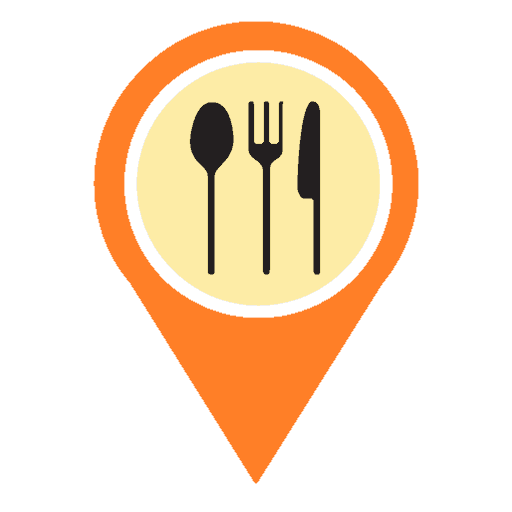
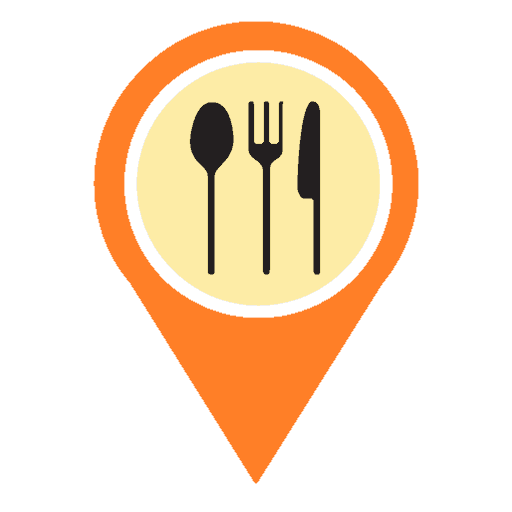
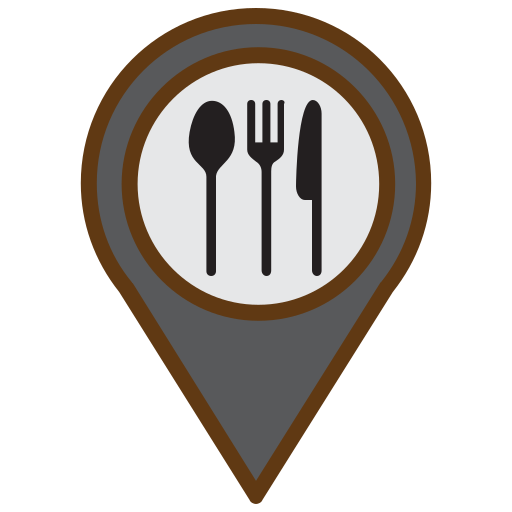
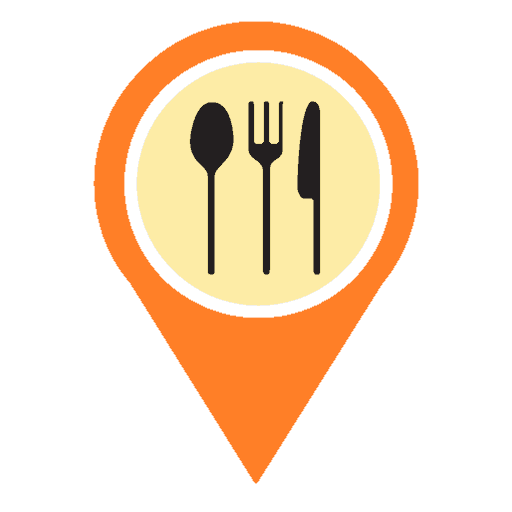
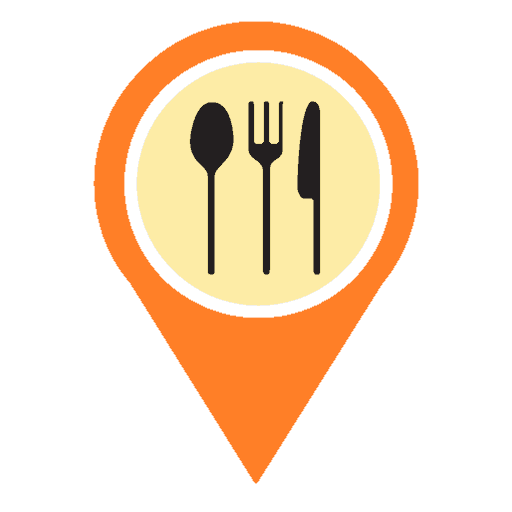
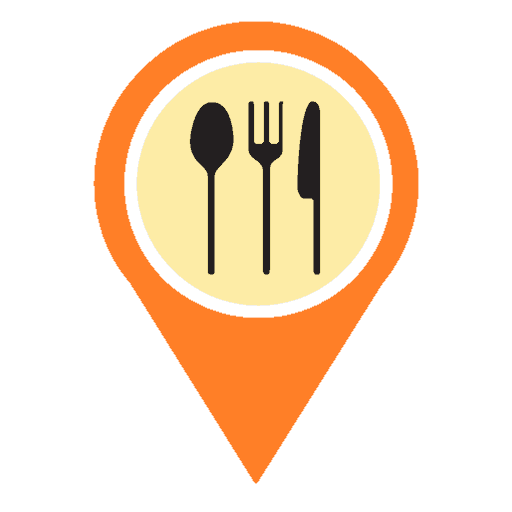
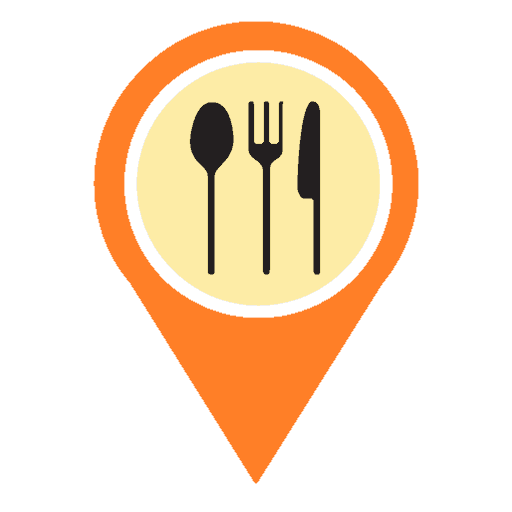
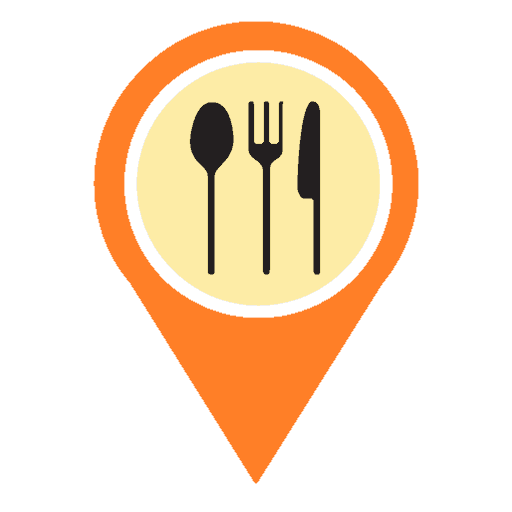
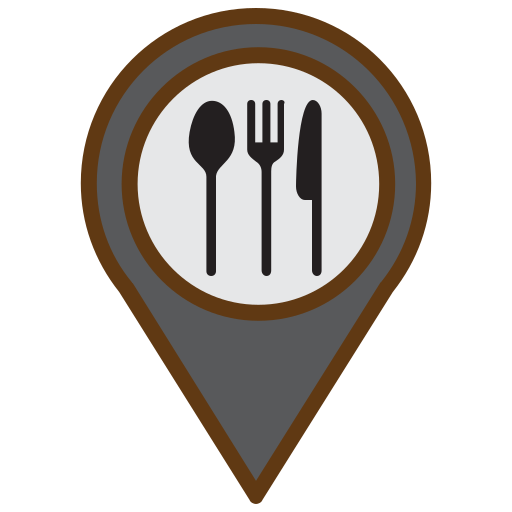

In [21]:
import folium as fm
import json
import os

mapa = fm.Map(location = [23.075162, -82.358295],zoom_start=11)
archivos_json = os.listdir('json') 

for archivo in archivos_json:
    with open(os.path.join('json',archivo),"r", encoding="utf8") as f:
        datos = json.load(f)
        nombre = datos['name']
        if datos['location']['coordinates_latitude_length'] is not None:
            latitud, longitud = datos['location']['coordinates_latitude_length']
            if 'pizzas' in datos['menu'] and datos['menu']['pizzas'] is not None:
                icono2 = fm.CustomIcon(icon_image="icono2.png",icon_size=(30,30))
                fm.Marker(location=[latitud,longitud],popup=nombre,icon=icono2).add_to(mapa)
            else:
                icono = fm.CustomIcon(icon_image="icono.png",icon_size = (30,30))
                fm.Marker(location=[latitud,longitud],popup=nombre,icon=icono).add_to(mapa)
        
mapa

Un cliente en particular nos envió un trabajo especial, uno en el que tuvimos que investigar sobre los aportes nutricionales de cada tipo distinto de carne y además su fórmula para medir la cantidad de nutrientes que tiene un plato según sus cantidad de carne. Este cliente llevaba una dieta recomendada por su médico, y para él era necesario saber la cantidad de nutrientes que tenía cada plato fuerte gracias a los cantidad de su ingrediente principal: la carne.

El desafío que enfrentamos era significativo, ya que no todos los restaurantes compartían esa información con el público. Sin embargo, en GastroData nos comprometimos a proporcionar una solución efectiva para nuestro cliente. Iniciamos el proyecto identificando los restaurantes en La Habana que ofrecían la información de la cantidad e cantidad de carne en un plato . Esta tarea implicó revisar menús y bases de datos disponibles públicamente.

Una vez completada la recolección de datos y el análisis, elaboramos un informe detallado para nuestro cliente. Este informe incluía una lista de restaurantes que proporcionaban la información nutricional requerida, así como un desglose de los nutrientes presentes en cada plato según la cantidad de carne. 

En las siguientes gráficas, la cantidad de nutrientes que ofrecen sus platos fuertes, basado en los cantidad de carne utilizados. Estos resultados no solo fueron valiosos para nuestro cliente, sino que también resaltaron la importancia de la transparencia en la información nutricional para los consumidores.

Casa Mia:['Punta de res a la Duth', 'Arracera', 'Filete Tenderloing', 'T bone con papas asadas al romero y salsa de queso azul']
ChaChaCha:['Solomillo argentino', 'Entrecote de ternera']
Comida Criolla Ocho Vías:['Bistec de Higado', 'Higado Italiana', 'Bistec de Cerdo', 'Chuleta de Cerdo', 'Fricase de Cerdo', 'Masa Frita', 'Fricase de Carnero', 'Ropa Vieja', 'Langosta Grille', 'Langosta Enchilada']
El Farallon:['FILETE PESCADO GRILLE', 'FILETE DE PESCADO C/ J Y Q GRATINADO', 'FILETE DE PESCADO JOHN VILLE', 'CAMARÓN AL GUSTO (GRILLLE, ENCHILADO Y AL AJILLO)', 'PULPO AL GUSTO (GRILLLE, ENCHILADO Y AL AJILLO)', 'ROPA VIEJA', 'VACA FRITA', 'BISTEC DE CERDO GRILLE', 'MASA DE CERDO FRITA', 'PECHUGA DE POLLO GRILLE', 'FAJITAS DE POLLO SALTEADAS', 'BISTEC DE POLLO DESHUESADO', 'POLLO A LA BARBACOA', 'POLLO ASADO']
Heredia:['POLLO CHIFLADO(SIN HUESO)']
Lateral:['Solomillo', 'Lomo de cerdo', 'Chuleta cerdo (Arroz moro y tostones)']
Pasos Habaneros:['Pollo asado']
Cafe Versalles:['Chuleta de cerd

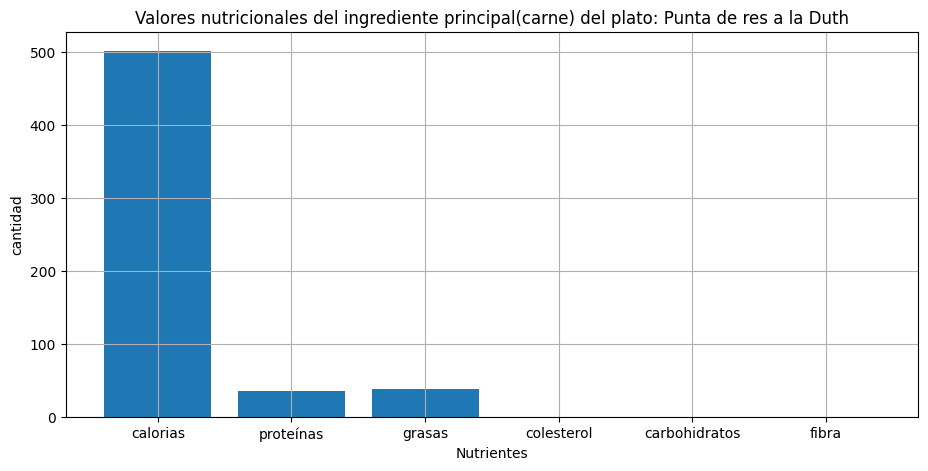

Valores nutricionales del ingrediente principal(carne) del plato Filete Tenderloing:
calorias: 552.2
proteínas: 40.04
grasas: 41.8
colesterol: 0.22
carbohidratos: 1.03
fibra: 0.0


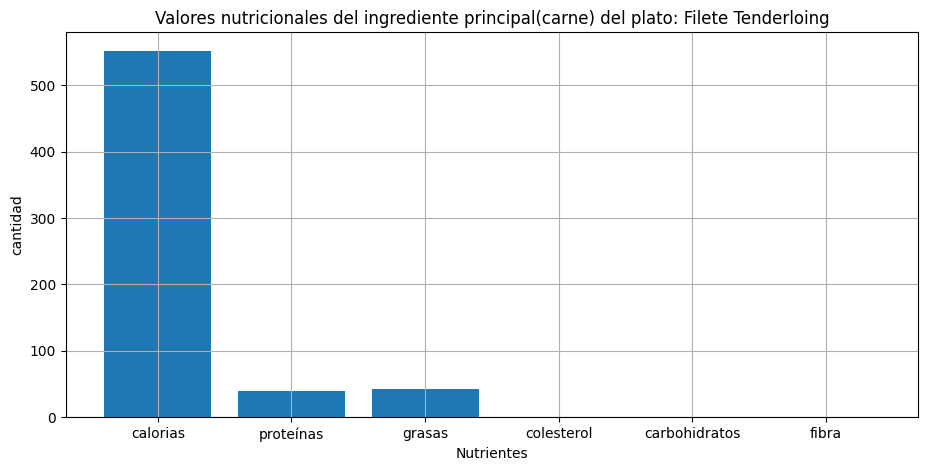

Valores nutricionales del ingrediente principal(carne) del plato T bone con papas asadas al romero y salsa de queso azul:
calorias: 1380.5
proteínas: 100.1
grasas: 104.5
colesterol: 0.54
carbohidratos: 2.58
fibra: 0.0


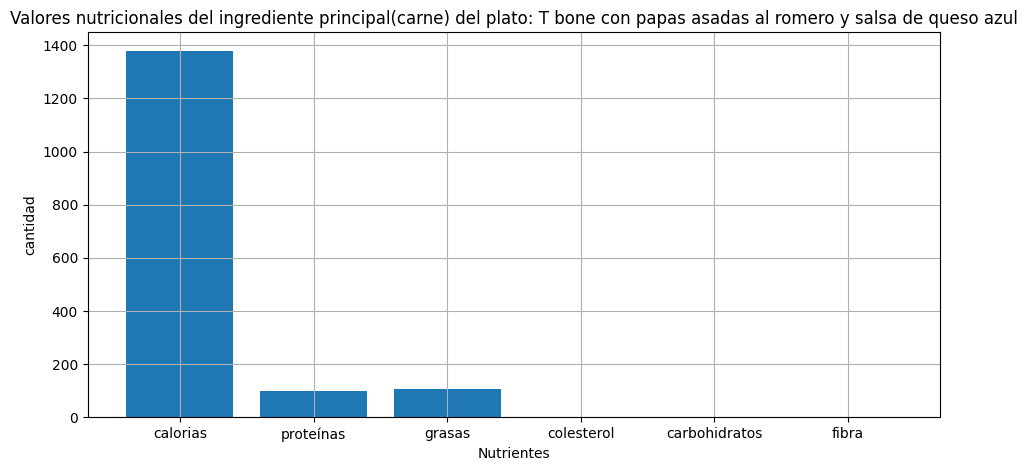

Valores nutricionales del ingrediente principal(carne) del plato Arracera:
calorias: 502.0
proteínas: 36.4
grasas: 38.0
colesterol: 0.2
carbohidratos: 0.94
fibra: 0.0


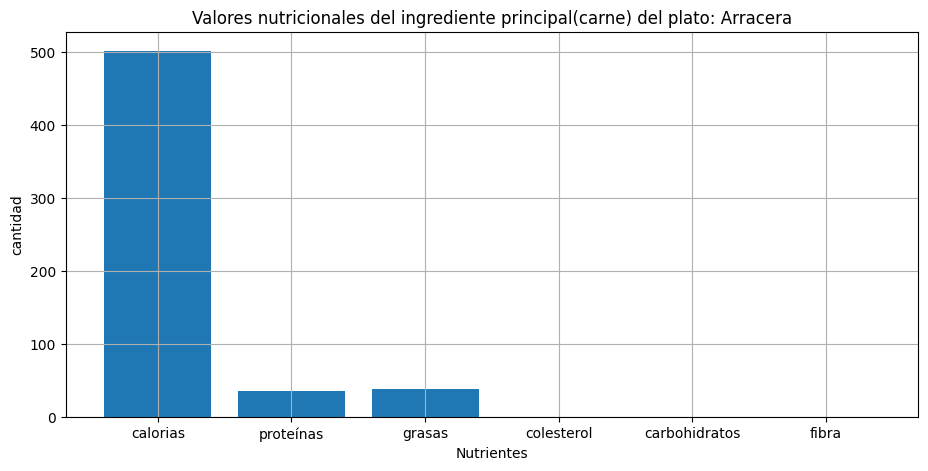

Valores nutricionales del ingrediente principal(carne) del plato Entrecote de ternera:
calorias: 878.5
proteínas: 63.7
grasas: 66.5
colesterol: 0.34
carbohidratos: 1.64
fibra: 0.0


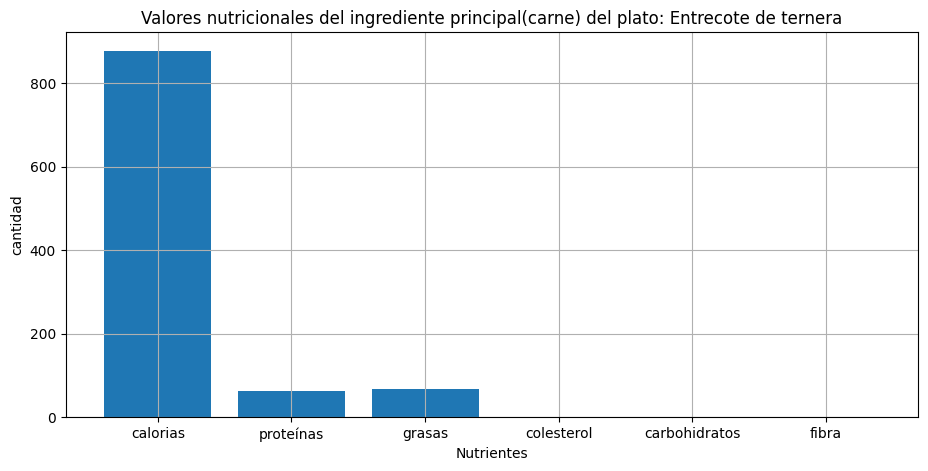

Valores nutricionales del ingrediente principal(carne) del plato Solomillo argentino:
calorias: 478.8
proteínas: 53.48
grasas: 29.4
colesterol: 0.25
carbohidratos: 0.0
fibra: 0.0


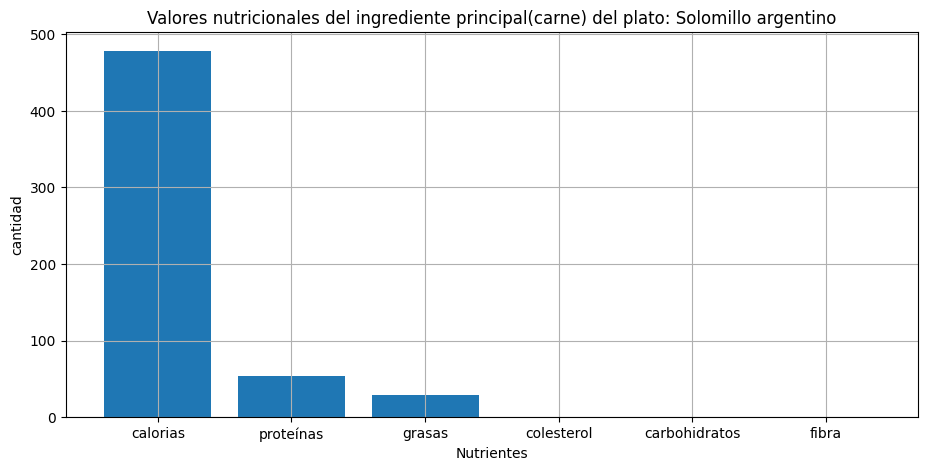

Valores nutricionales del ingrediente principal(carne) del plato Higado Italiana:
calorias: 1154.6
proteínas: 83.72
grasas: 87.4
colesterol: 0.45
carbohidratos: 2.16
fibra: 0.0


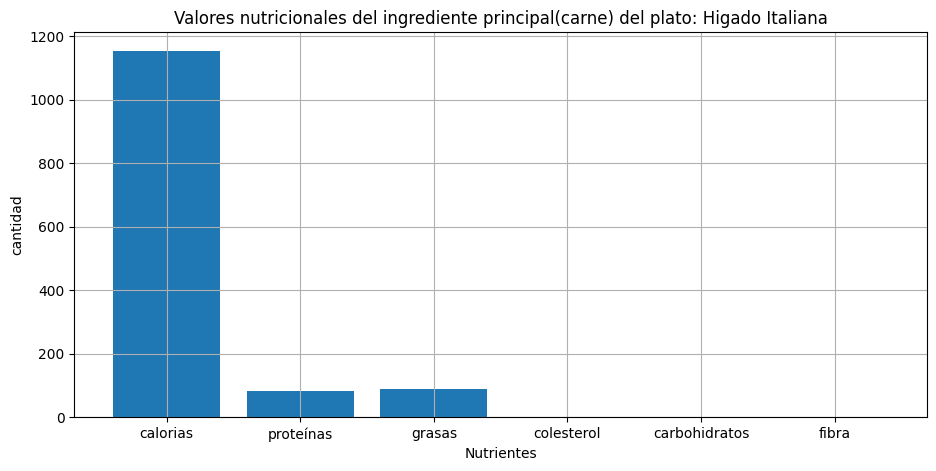

Valores nutricionales del ingrediente principal(carne) del plato Bistec de Higado:
calorias: 1154.6
proteínas: 83.72
grasas: 87.4
colesterol: 0.45
carbohidratos: 2.16
fibra: 0.0


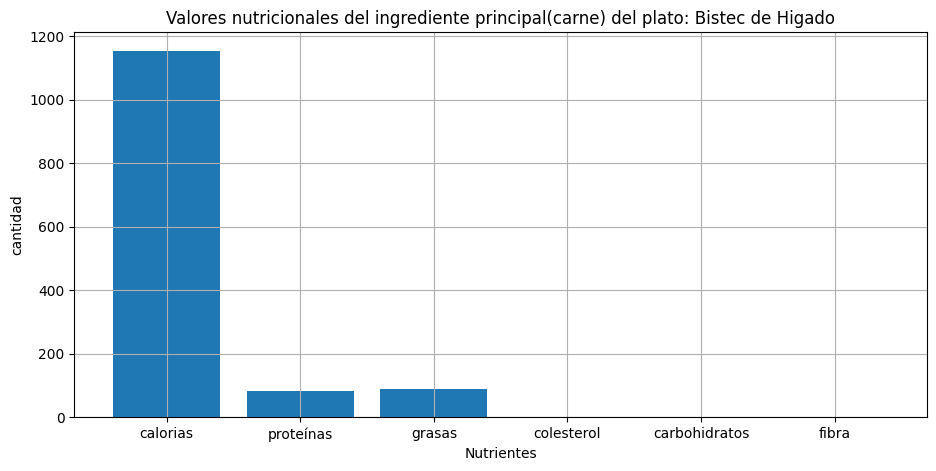

Valores nutricionales del ingrediente principal(carne) del plato Fricase de Carnero:
calorias: 2716.8
proteínas: 238.08
grasas: 188.16
colesterol: 0.93
carbohidratos: 0.0
fibra: 0.0


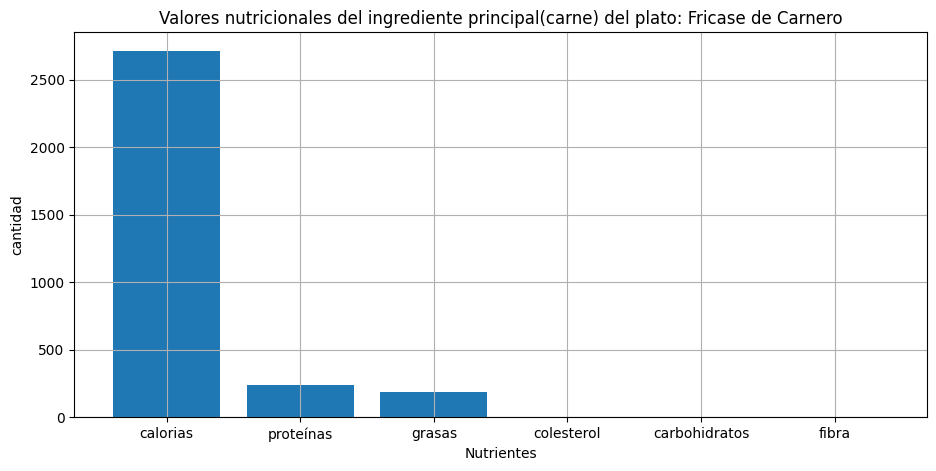

Valores nutricionales del ingrediente principal(carne) del plato Langosta Enchilada:
calorias: 614.1
proteínas: 131.1
grasas: 5.93
colesterol: 1.01
carbohidratos: 0.0
fibra: 0.0


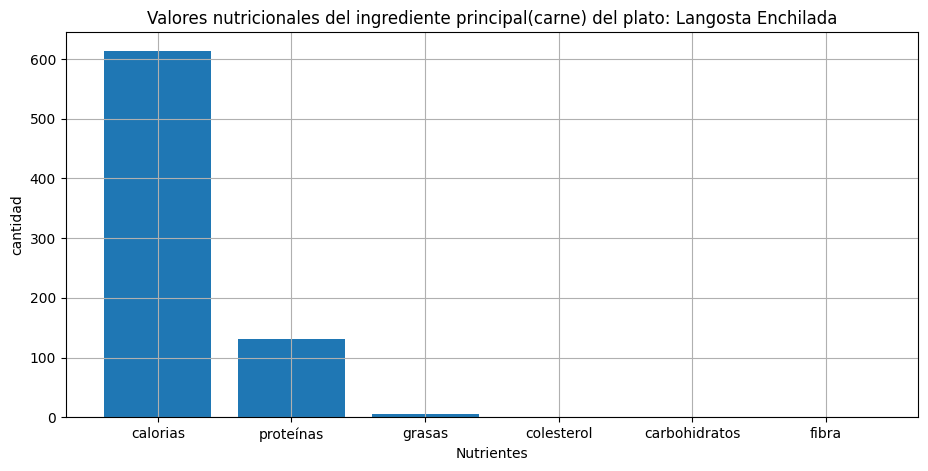

Valores nutricionales del ingrediente principal(carne) del plato Chuleta de Cerdo:
calorias: 786.6
proteínas: 87.86
grasas: 48.3
colesterol: 0.41
carbohidratos: 0.0
fibra: 0.0


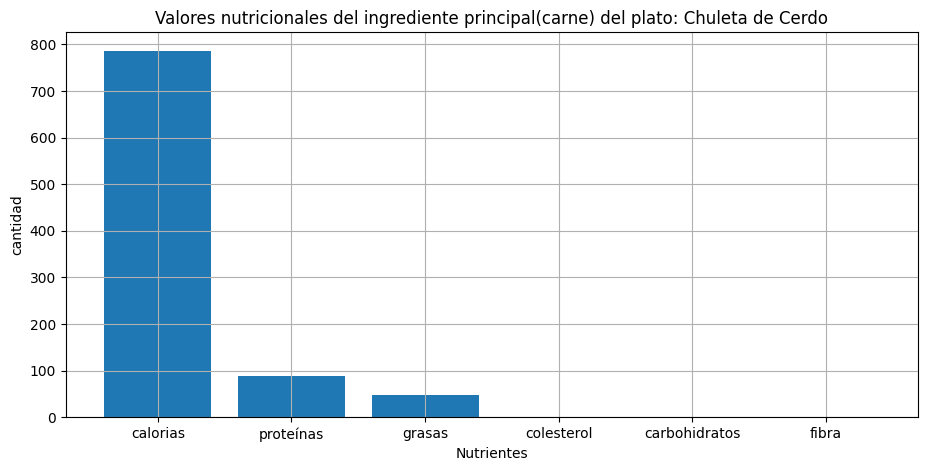

Valores nutricionales del ingrediente principal(carne) del plato Masa Frita:
calorias: 735.3
proteínas: 82.13
grasas: 45.15
colesterol: 0.38
carbohidratos: 0.0
fibra: 0.0


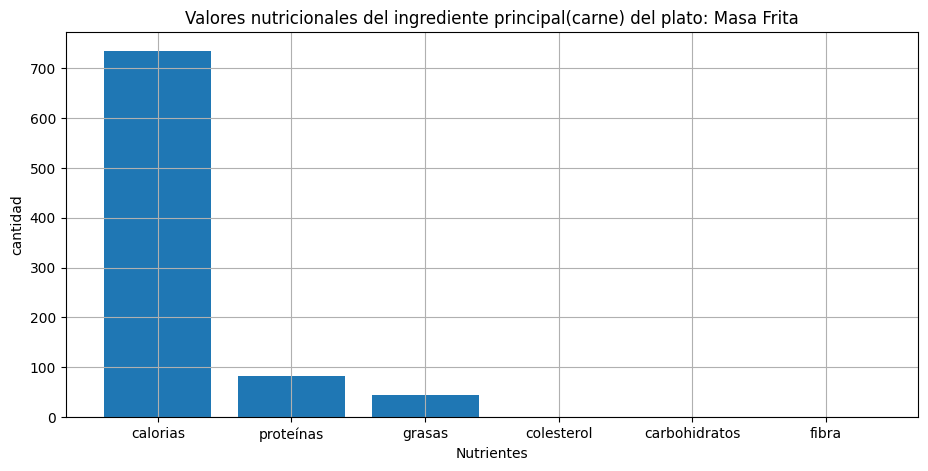

Valores nutricionales del ingrediente principal(carne) del plato Fricase de Cerdo:
calorias: 735.3
proteínas: 82.13
grasas: 45.15
colesterol: 0.38
carbohidratos: 0.0
fibra: 0.0


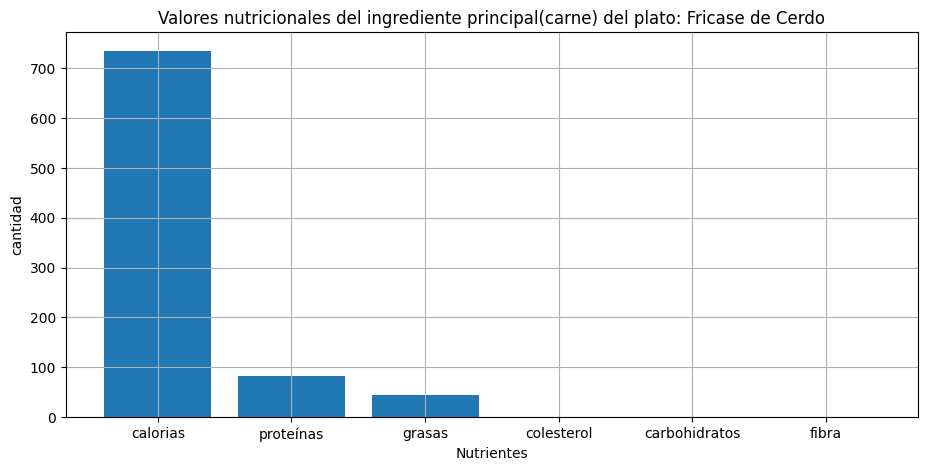

Valores nutricionales del ingrediente principal(carne) del plato Bistec de Cerdo:
calorias: 786.6
proteínas: 87.86
grasas: 48.3
colesterol: 0.41
carbohidratos: 0.0
fibra: 0.0


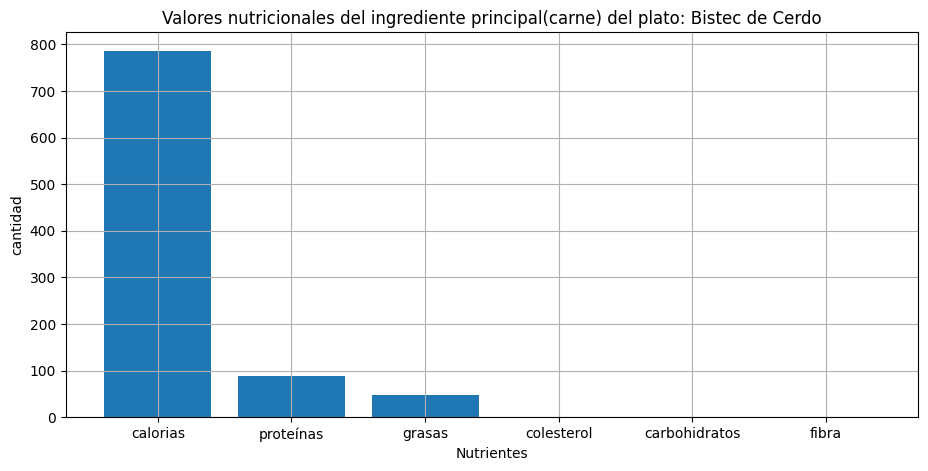

Valores nutricionales del ingrediente principal(carne) del plato Ropa Vieja:
calorias: 1154.6
proteínas: 83.72
grasas: 87.4
colesterol: 0.45
carbohidratos: 2.16
fibra: 0.0


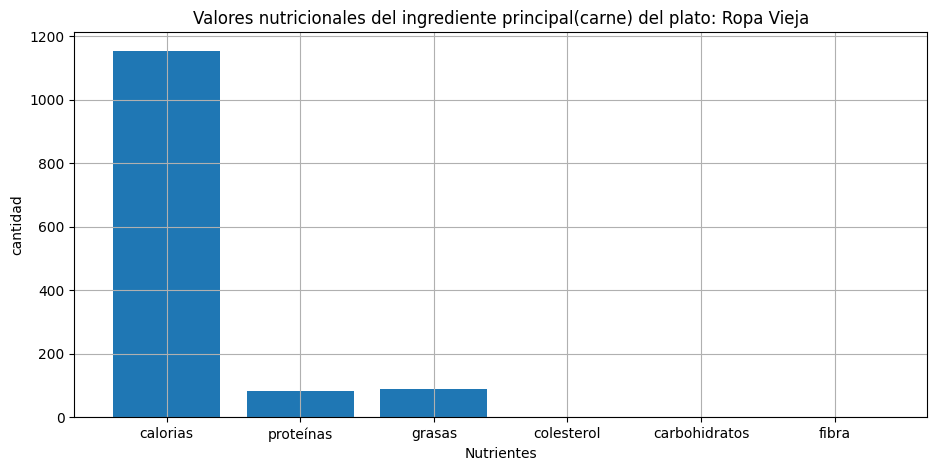

Valores nutricionales del ingrediente principal(carne) del plato Langosta Grille:
calorias: 614.1
proteínas: 131.1
grasas: 5.93
colesterol: 1.01
carbohidratos: 0.0
fibra: 0.0


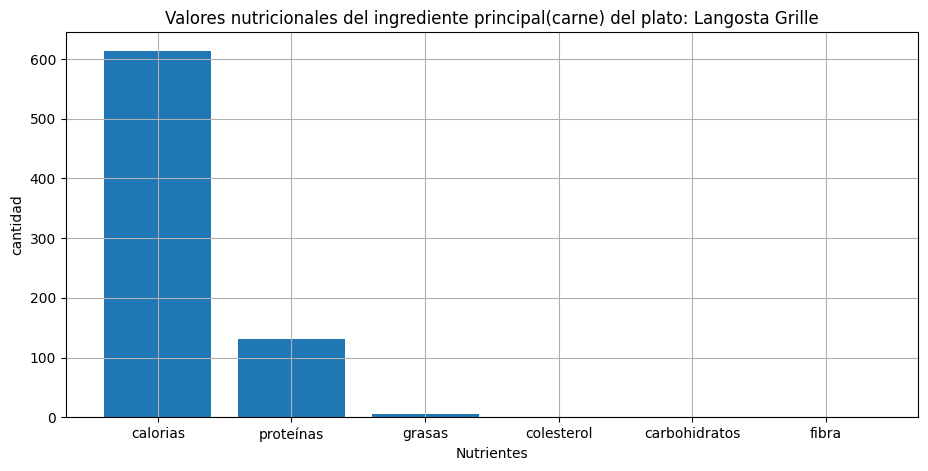

Valores nutricionales del ingrediente principal(carne) del plato POLLO A LA BARBACOA:
calorias: 180.12
proteínas: 20.52
grasas: 20.06
colesterol: 0.06
carbohidratos: 4.62
fibra: 0.34


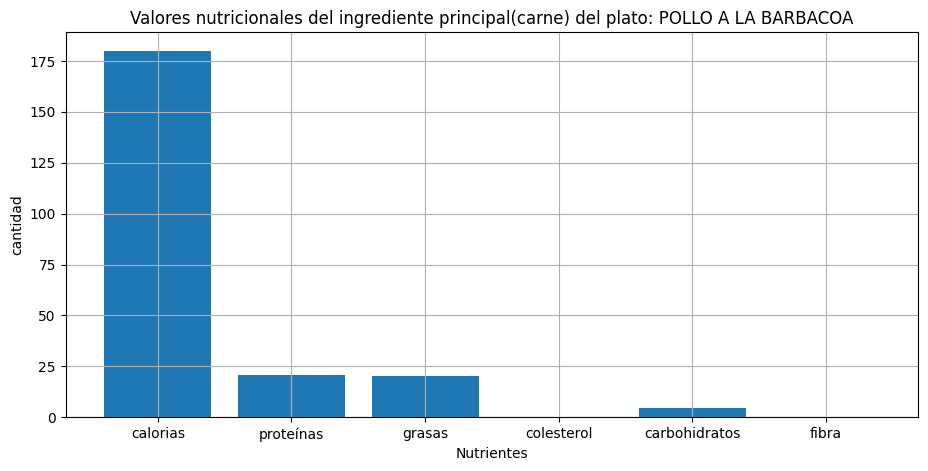

Valores nutricionales del ingrediente principal(carne) del plato FILETE PESCADO GRILLE:
calorias: 522.1
proteínas: 25.3
grasas: 37.26
colesterol: 0.06
carbohidratos: 49.91
fibra: 3.45


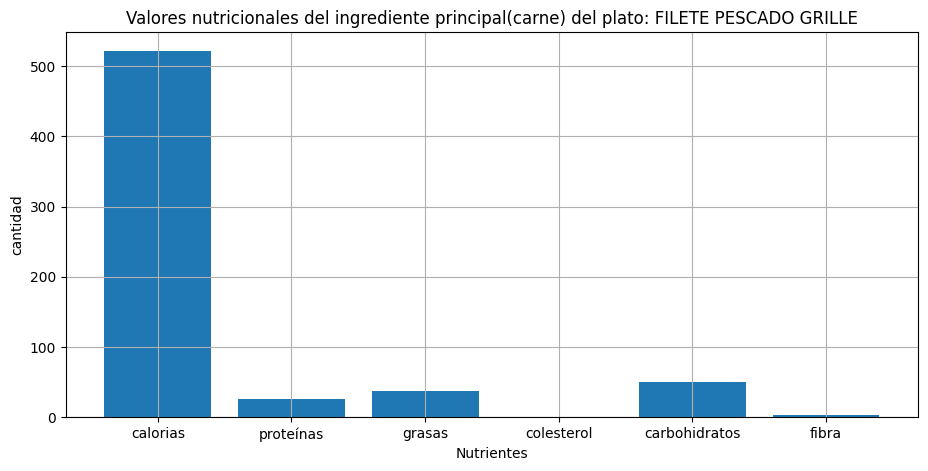

Valores nutricionales del ingrediente principal(carne) del plato VACA FRITA:
calorias: 376.5
proteínas: 27.3
grasas: 28.5
colesterol: 0.15
carbohidratos: 0.7
fibra: 0.0


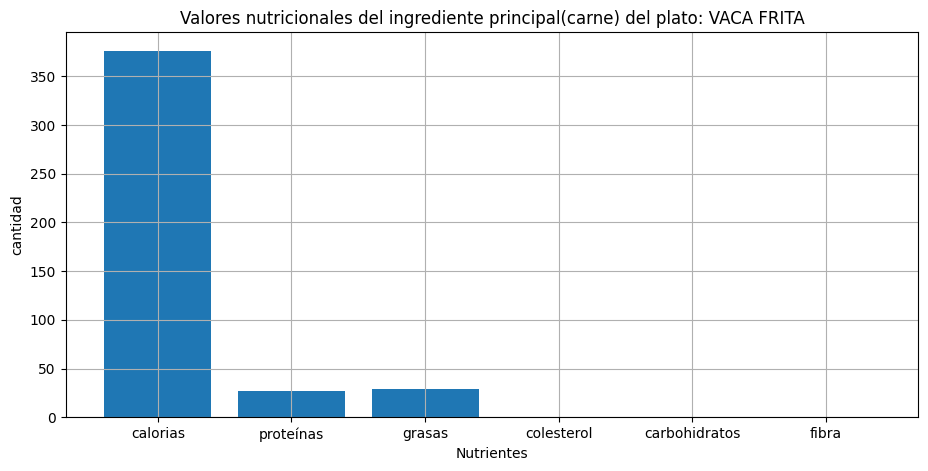

Valores nutricionales del ingrediente principal(carne) del plato ROPA VIEJA:
calorias: 376.5
proteínas: 27.3
grasas: 28.5
colesterol: 0.15
carbohidratos: 0.7
fibra: 0.0


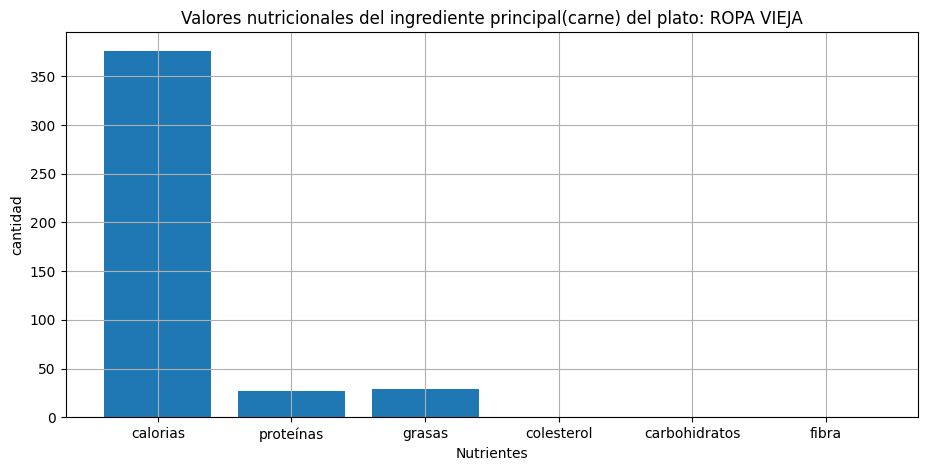

Valores nutricionales del ingrediente principal(carne) del plato BISTEC DE POLLO DESHUESADO:
calorias: 363.4
proteínas: 41.4
grasas: 40.48
colesterol: 0.13
carbohidratos: 9.31
fibra: 0.69


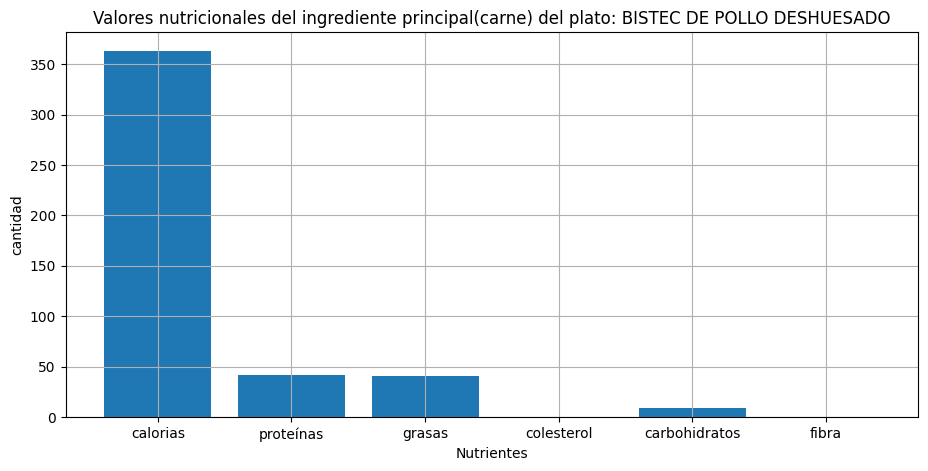

Valores nutricionales del ingrediente principal(carne) del plato FILETE DE PESCADO C/ J Y Q GRATINADO:
calorias: 522.1
proteínas: 25.3
grasas: 37.26
colesterol: 0.06
carbohidratos: 49.91
fibra: 3.45


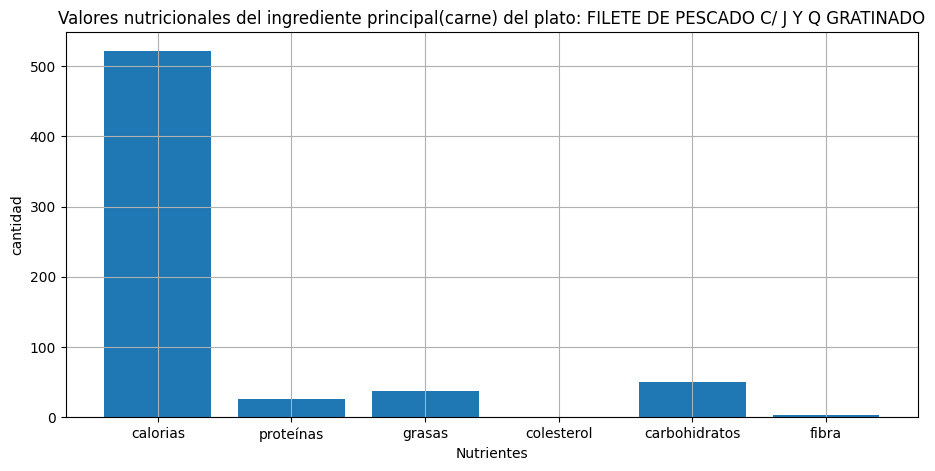

Valores nutricionales del ingrediente principal(carne) del plato FILETE DE PESCADO JOHN VILLE:
calorias: 522.1
proteínas: 25.3
grasas: 37.26
colesterol: 0.06
carbohidratos: 49.91
fibra: 3.45


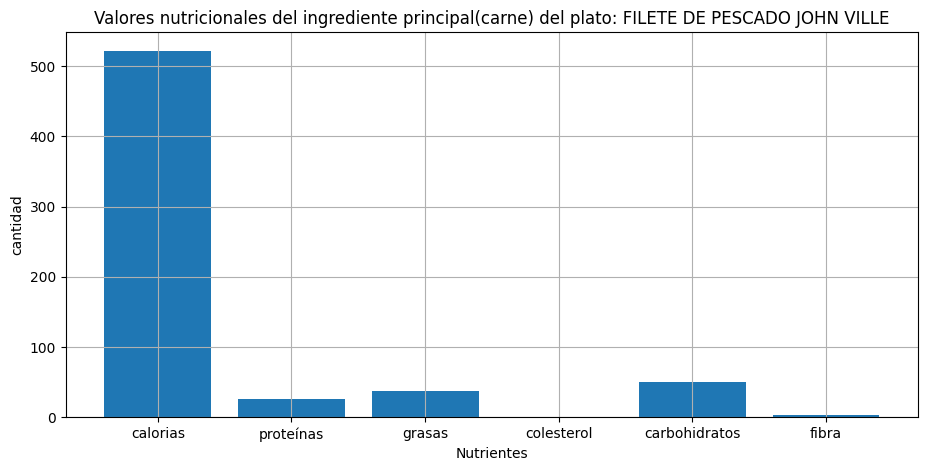

Valores nutricionales del ingrediente principal(carne) del plato POLLO ASADO:
calorias: 180.12
proteínas: 20.52
grasas: 20.06
colesterol: 0.06
carbohidratos: 4.62
fibra: 0.34


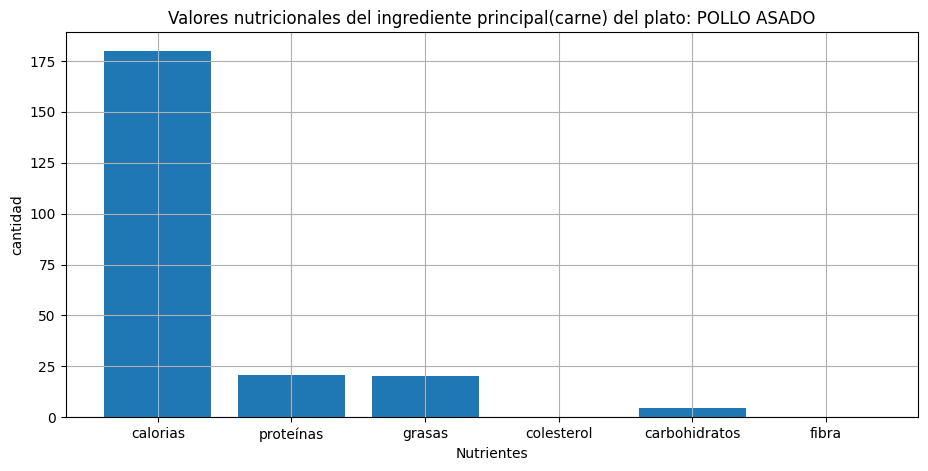

Valores nutricionales del ingrediente principal(carne) del plato PECHUGA DE POLLO GRILLE:
calorias: 363.4
proteínas: 41.4
grasas: 40.48
colesterol: 0.13
carbohidratos: 9.31
fibra: 0.69


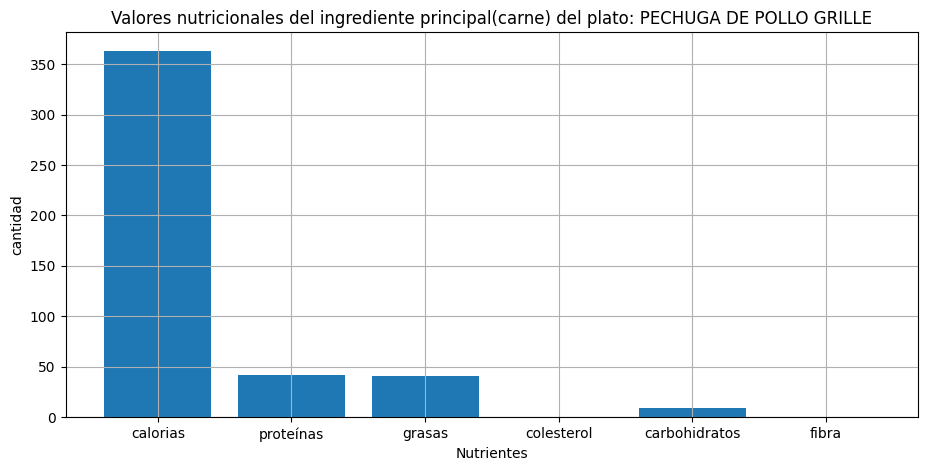

Valores nutricionales del ingrediente principal(carne) del plato PULPO AL GUSTO (GRILLLE, ENCHILADO Y AL AJILLO):
calorias: 147.6
proteínas: 26.82
grasas: 1.87
colesterol: 0.09
carbohidratos: 3.96
fibra: 0.0


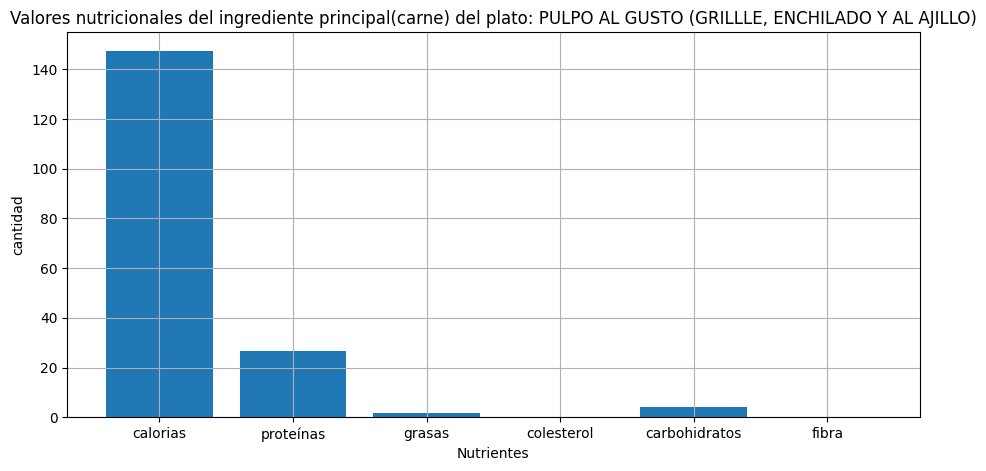

Valores nutricionales del ingrediente principal(carne) del plato BISTEC DE CERDO GRILLE:
calorias: 393.3
proteínas: 43.93
grasas: 24.15
colesterol: 0.2
carbohidratos: 0.0
fibra: 0.0


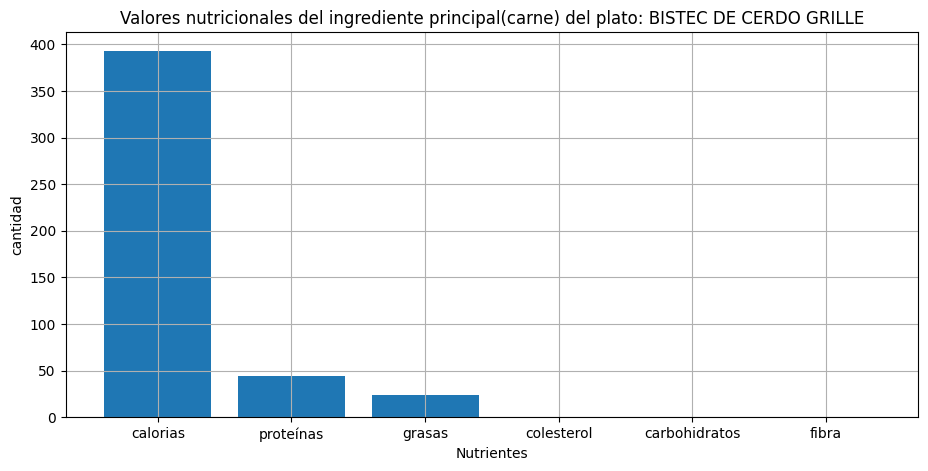

Valores nutricionales del ingrediente principal(carne) del plato MASA DE CERDO FRITA:
calorias: 342.0
proteínas: 38.2
grasas: 21.0
colesterol: 0.18
carbohidratos: 0.0
fibra: 0.0


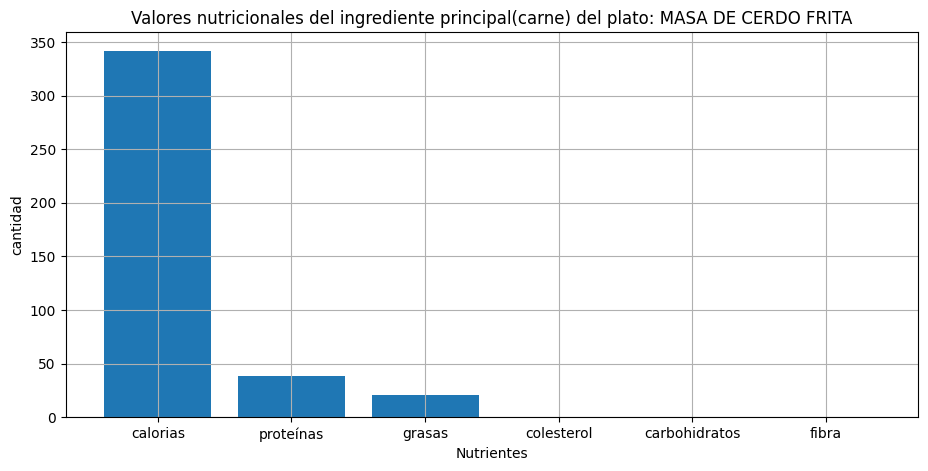

Valores nutricionales del ingrediente principal(carne) del plato FAJITAS DE POLLO SALTEADAS:
calorias: 363.4
proteínas: 41.4
grasas: 40.48
colesterol: 0.13
carbohidratos: 9.31
fibra: 0.69


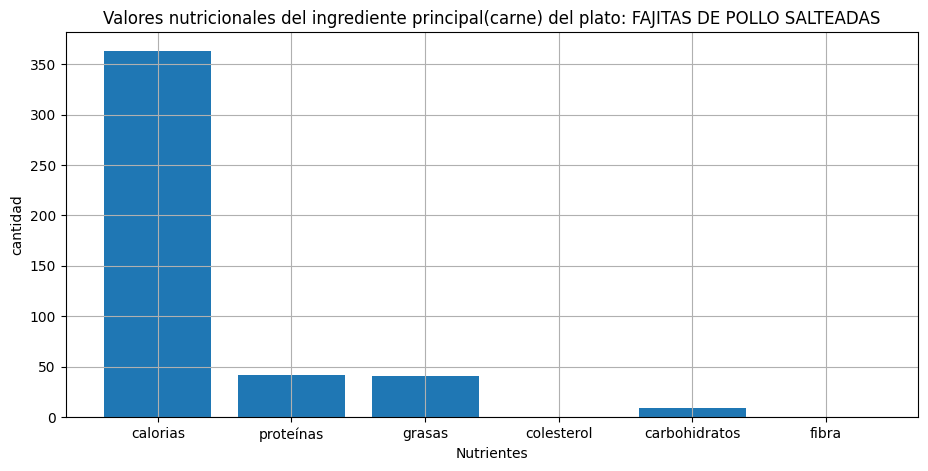

Valores nutricionales del ingrediente principal(carne) del plato POLLO CHIFLADO(SIN HUESO):
calorias: 790.0
proteínas: 90.0
grasas: 88.0
colesterol: 0.28
carbohidratos: 20.25
fibra: 1.5


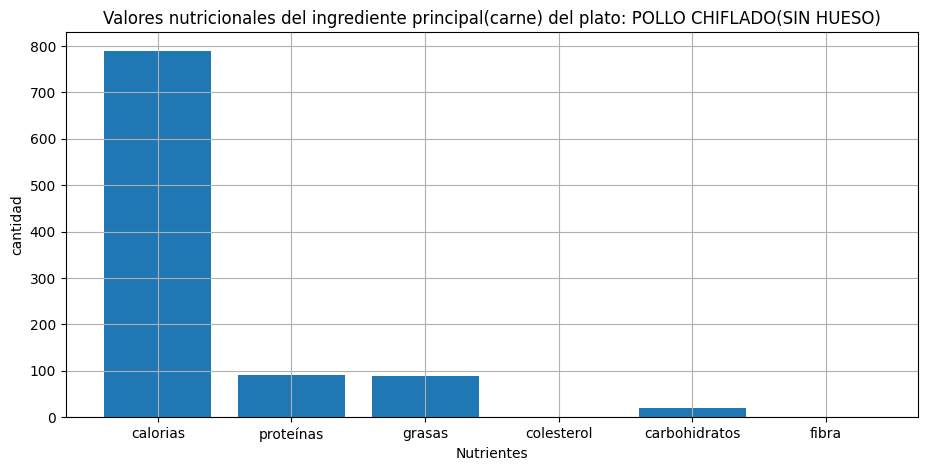

Valores nutricionales del ingrediente principal(carne) del plato Lomo de cerdo:
calorias: 598.5
proteínas: 66.85
grasas: 36.75
colesterol: 0.31
carbohidratos: 0.0
fibra: 0.0


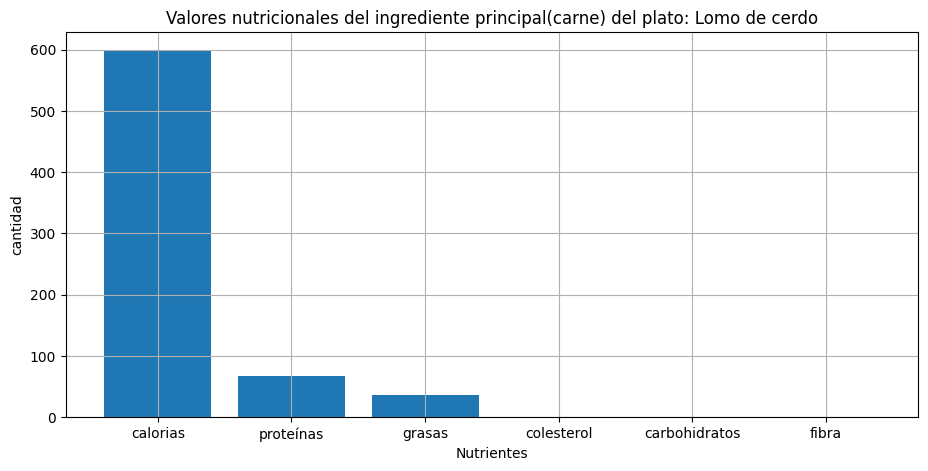

Valores nutricionales del ingrediente principal(carne) del plato Chuleta cerdo (Arroz moro y tostones):
calorias: 769.5
proteínas: 85.95
grasas: 47.25
colesterol: 0.4
carbohidratos: 0.0
fibra: 0.0


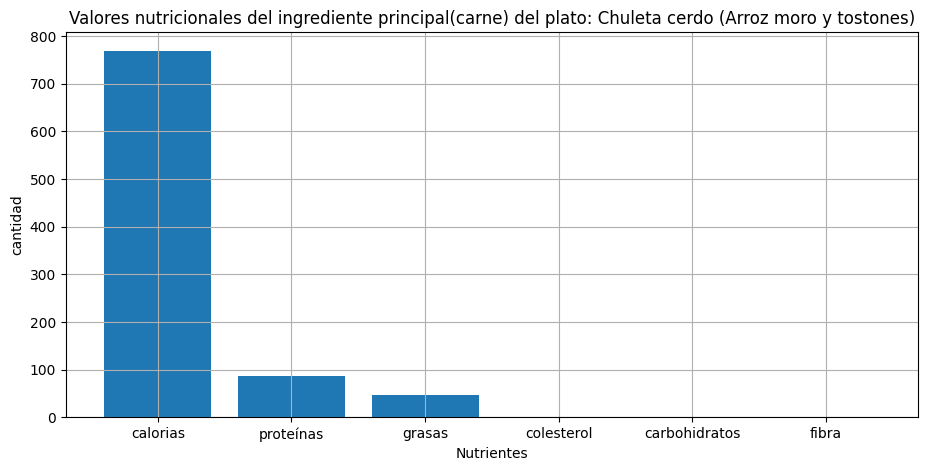

Valores nutricionales del ingrediente principal(carne) del plato Solomillo:
calorias: 786.6
proteínas: 87.86
grasas: 48.3
colesterol: 0.41
carbohidratos: 0.0
fibra: 0.0


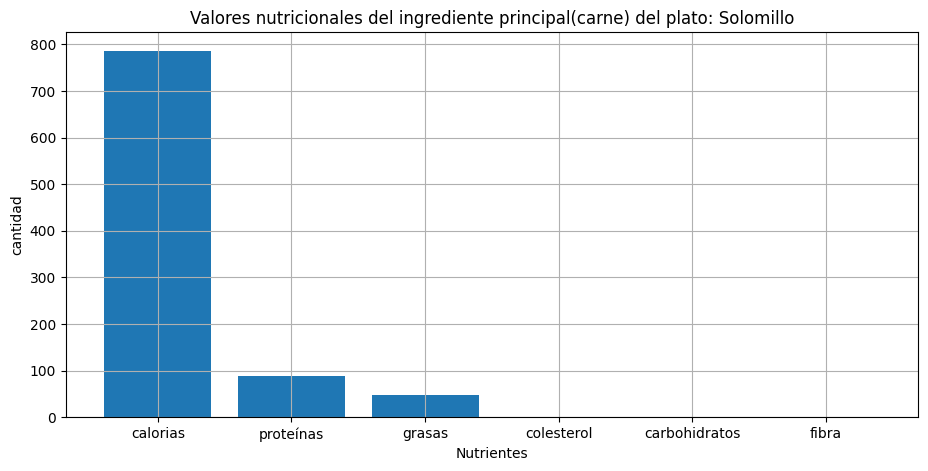

Valores nutricionales del ingrediente principal(carne) del plato Pollo asado:
calorias: 395.0
proteínas: 45.0
grasas: 44.0
colesterol: 0.14
carbohidratos: 10.12
fibra: 0.75


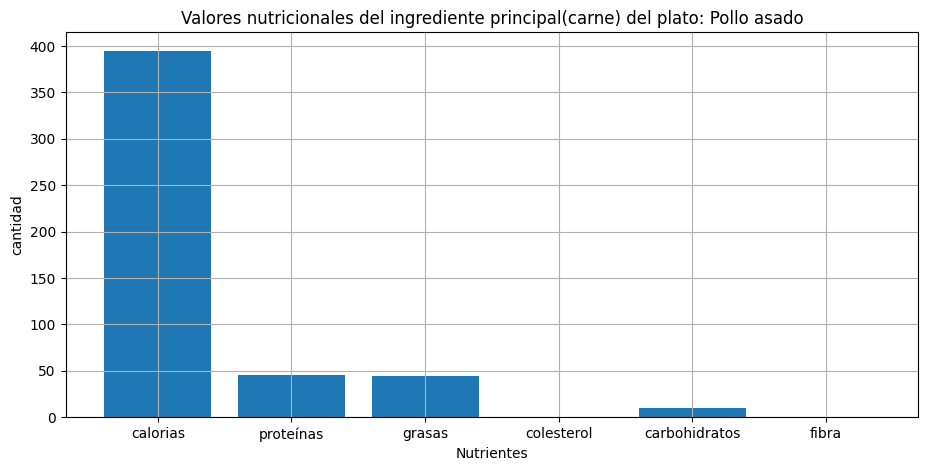

Valores nutricionales del ingrediente principal(carne) del plato Solomillo de cerdo al carbón con bbq:
calorias: 769.5
proteínas: 85.95
grasas: 47.25
colesterol: 0.4
carbohidratos: 0.0
fibra: 0.0


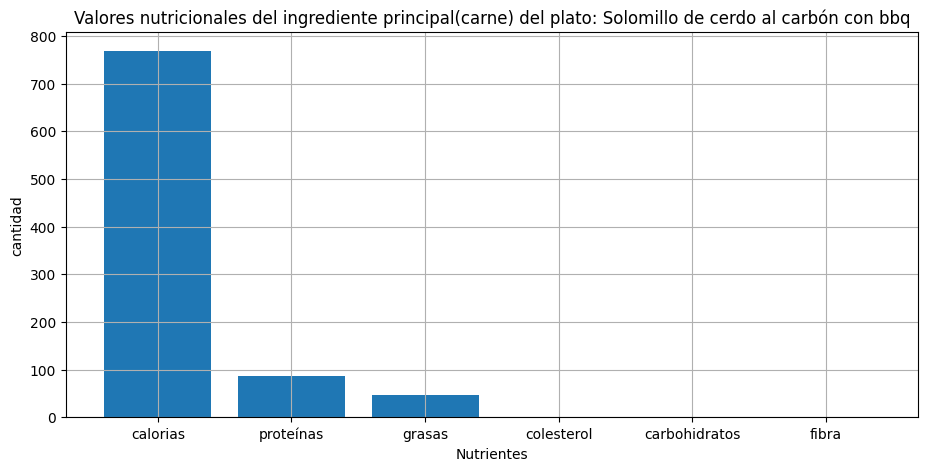

Valores nutricionales del ingrediente principal(carne) del plato Chuleta de cerdo al carbón con bbq:
calorias: 769.5
proteínas: 85.95
grasas: 47.25
colesterol: 0.4
carbohidratos: 0.0
fibra: 0.0


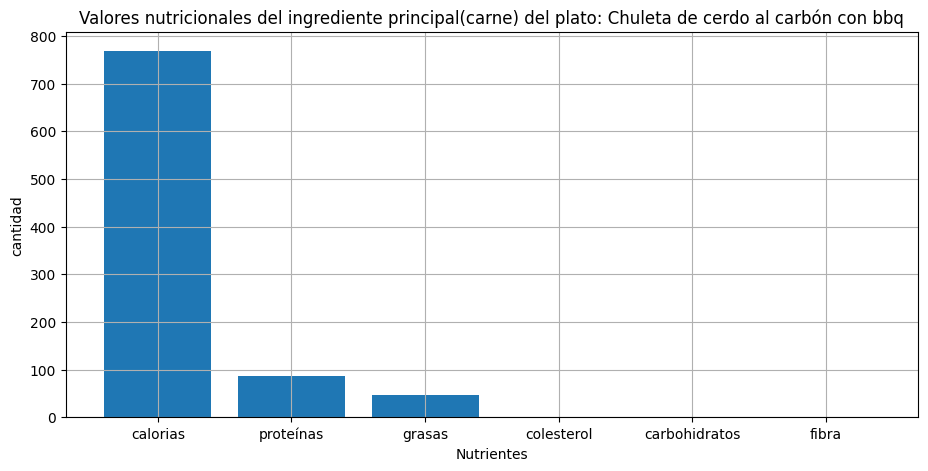

Valores nutricionales del ingrediente principal(carne) del plato Masa de cerdo frita:
calorias: 513.0
proteínas: 57.3
grasas: 31.5
colesterol: 0.27
carbohidratos: 0.0
fibra: 0.0


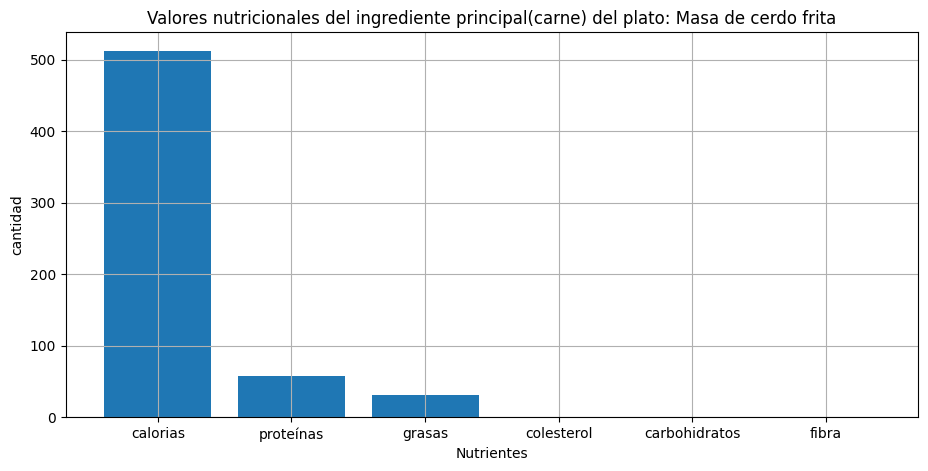

In [22]:
import os
import json
import my_library as ly
import matplotlib.pyplot as plt


with open("info_nutrientes.json", "r", encoding="utf8") as n:
    data_nutrientes = json.load(n)


ruta = "json_programa_aportes_nutricional"
archivos_json = os.listdir(ruta)
nutrientes_por_plato = {}


for archivo in archivos_json:
    with open(os.path.join(ruta, archivo), "r", encoding="utf8") as f:
        datos = json.load(f)
    if 'strong_dishes' in datos['menu'] and datos['menu']['strong_dishes'] is not None:
        strong_dishes = datos['menu']['strong_dishes']
        no = ly.coger_el_numero(strong_dishes) 
        lista_platos = ly.name_platos(strong_dishes)
        if 'name' in datos: 
            name = datos['name'] 
            print (f'{name}:{lista_platos}' )
        for nombre_plato, cantidad, tipo_carne in no:
            if tipo_carne in data_nutrientes:
                if nombre_plato not in nutrientes_por_plato:
                    nutrientes_por_plato[nombre_plato] = {}
                nutrientes_plato_unico = ly.calcular_nutrientes(data_nutrientes, tipo_carne, cantidad)
                for nutriente, valor in nutrientes_plato_unico.items():
                    if nutriente not in nutrientes_por_plato[nombre_plato]:
                        nutrientes_por_plato[nombre_plato][nutriente] = 0
                    nutrientes_por_plato[nombre_plato][nutriente] += valor


for plato, nutrientes in nutrientes_por_plato.items():
    print(f"Valores nutricionales del ingrediente principal(carne) del plato {plato}:")
    for nutriente, valor in nutrientes.items():
        print(f"{nutriente}: { round(valor, 2)}")
    plt.figure(figsize=(11, 5))
    plt.bar(nutrientes.keys(), nutrientes.values())
    plt.title(f'Valores nutricionales del ingrediente principal(carne) del plato: {plato}')
    plt.xlabel('Nutrientes')
    plt.ylabel('cantidad')
    plt.xticks(rotation=360)
    plt.grid(True)
    plt.show()

Un cliente realizó una solicitud parecida al anterior pero mas especificca. En particular, estaba interesado en los platos que, gracias a la carne, contenían una mayor cantidad de proteínas, pero pocas cantidades de carbohidratos, calorías y grasas. La necesidad de esta información era crucial para asegurarse de que su dieta fuese equilibrada y adecuada para sus requerimientos de salud.

Para presentar la información de manera clara y útil para el cliente, creamos cuatro gráficas que visualizaban la cantidad de cada nutriente en los platos analizados. Estas gráficas comparaban los nutrientes por plato, permitiendo al cliente observar cuáles platos contenían una mayor cantidad de proteínas y menores cantidades de carbohidratos, grasas y calorías. Esta comparación visual facilitó la toma de decisiones informadas y ayudó al cliente a elegir los platos más adecuados para su dieta.

Los resultados de nuestro análisis no solo cumplieron con las expectativas del cliente, sino que también demostraron la capacidad de GastroData para proporcionar soluciones personalizadas y basadas en datos. En un mundo donde la información nutricional es cada vez más importante para los consumidores, la transparencia y precisión de los datos que ofrecimos se destacaron como un valor agregado significativo para nuestros servicios.

Casa Mia:['Punta de res a la Duth', 'Arracera', 'Filete Tenderloing', 'T bone con papas asadas al romero y salsa de queso azul']
ChaChaCha:['Solomillo argentino', 'Entrecote de ternera']
Comida Criolla Ocho Vías:['Bistec de Higado', 'Higado Italiana', 'Bistec de Cerdo', 'Chuleta de Cerdo', 'Fricase de Cerdo', 'Masa Frita', 'Fricase de Carnero', 'Ropa Vieja', 'Langosta Grille', 'Langosta Enchilada']
El Farallon:['FILETE PESCADO GRILLE', 'FILETE DE PESCADO C/ J Y Q GRATINADO', 'FILETE DE PESCADO JOHN VILLE', 'CAMARÓN AL GUSTO (GRILLLE, ENCHILADO Y AL AJILLO)', 'PULPO AL GUSTO (GRILLLE, ENCHILADO Y AL AJILLO)', 'ROPA VIEJA', 'VACA FRITA', 'BISTEC DE CERDO GRILLE', 'MASA DE CERDO FRITA', 'PECHUGA DE POLLO GRILLE', 'FAJITAS DE POLLO SALTEADAS', 'BISTEC DE POLLO DESHUESADO', 'POLLO A LA BARBACOA', 'POLLO ASADO']
Heredia:['POLLO CHIFLADO(SIN HUESO)']
Lateral:['Solomillo', 'Lomo de cerdo', 'Chuleta cerdo (Arroz moro y tostones)']
Pasos Habaneros:['Pollo asado']
Cafe Versalles:['Chuleta de cerd

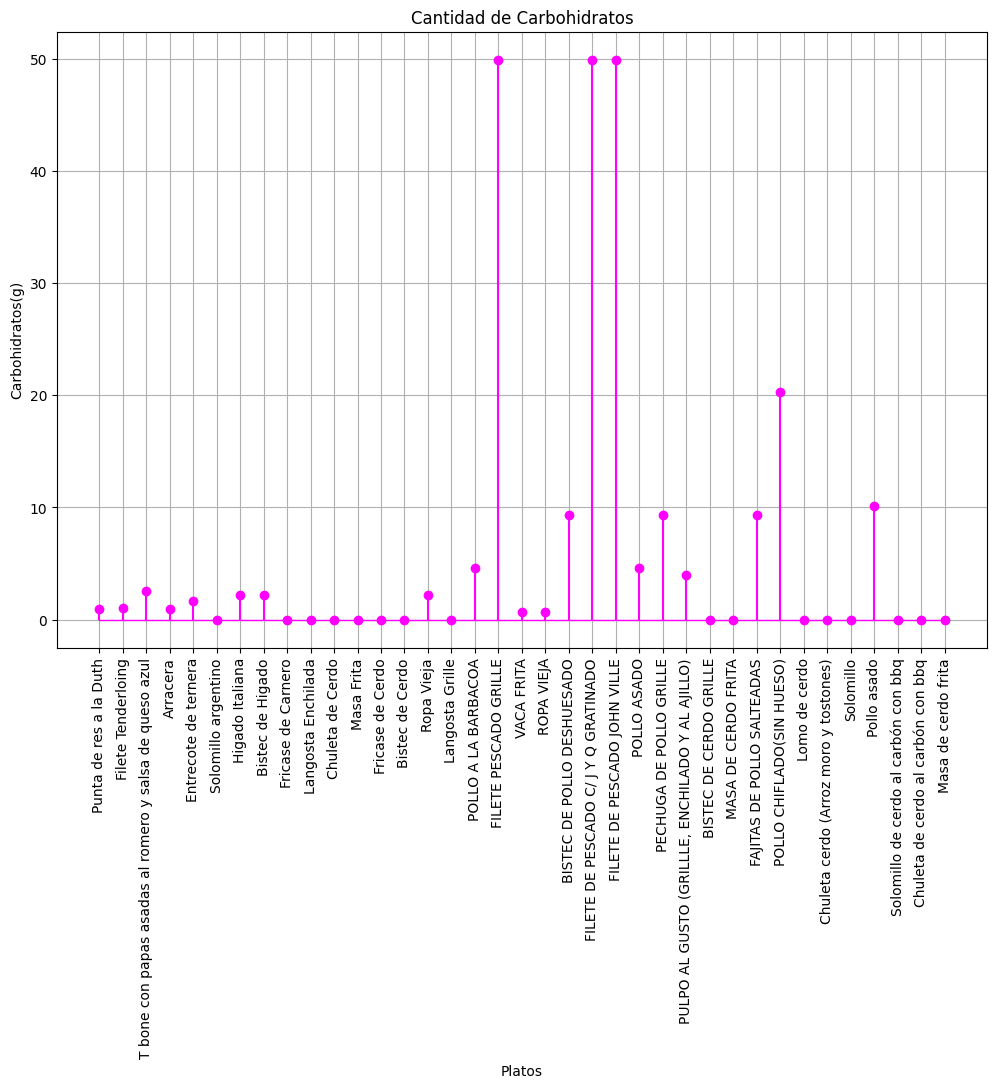

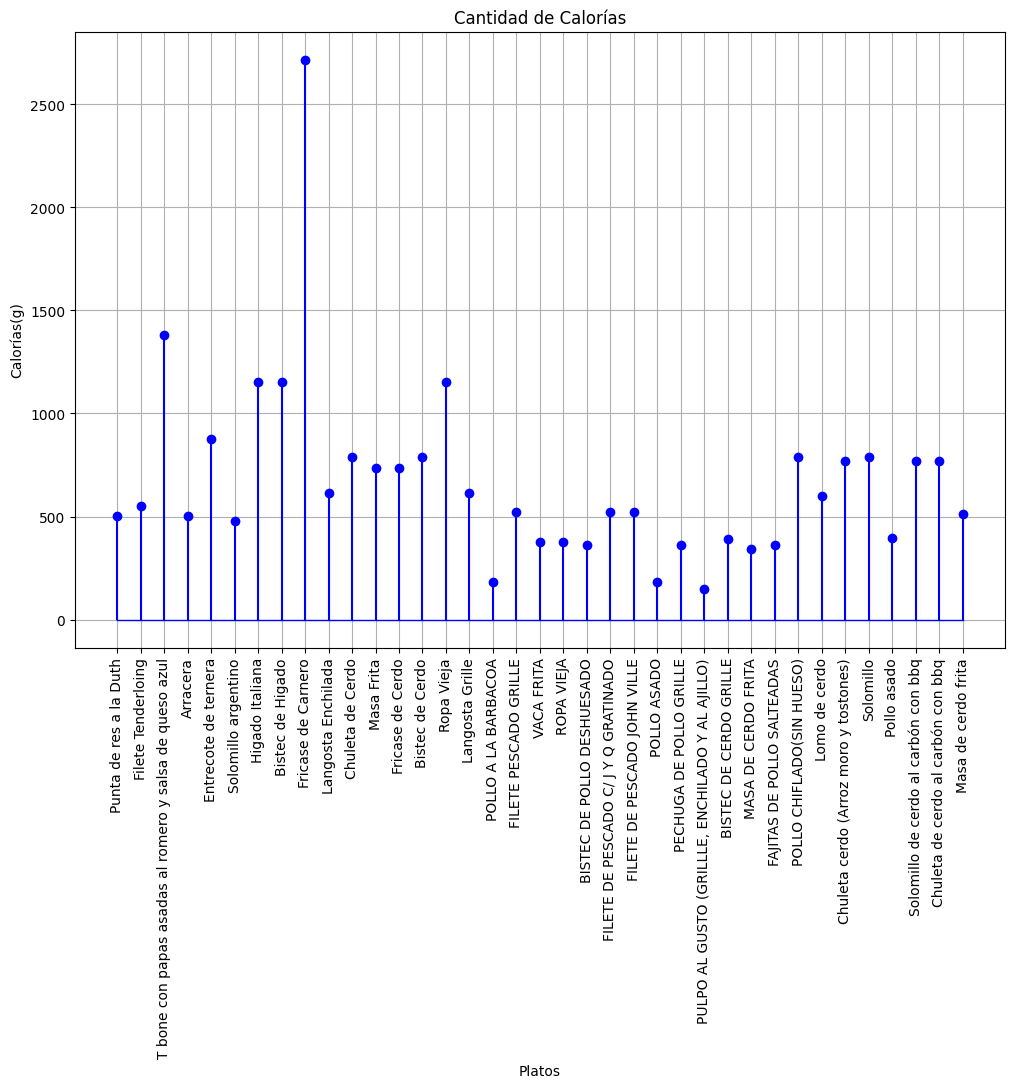

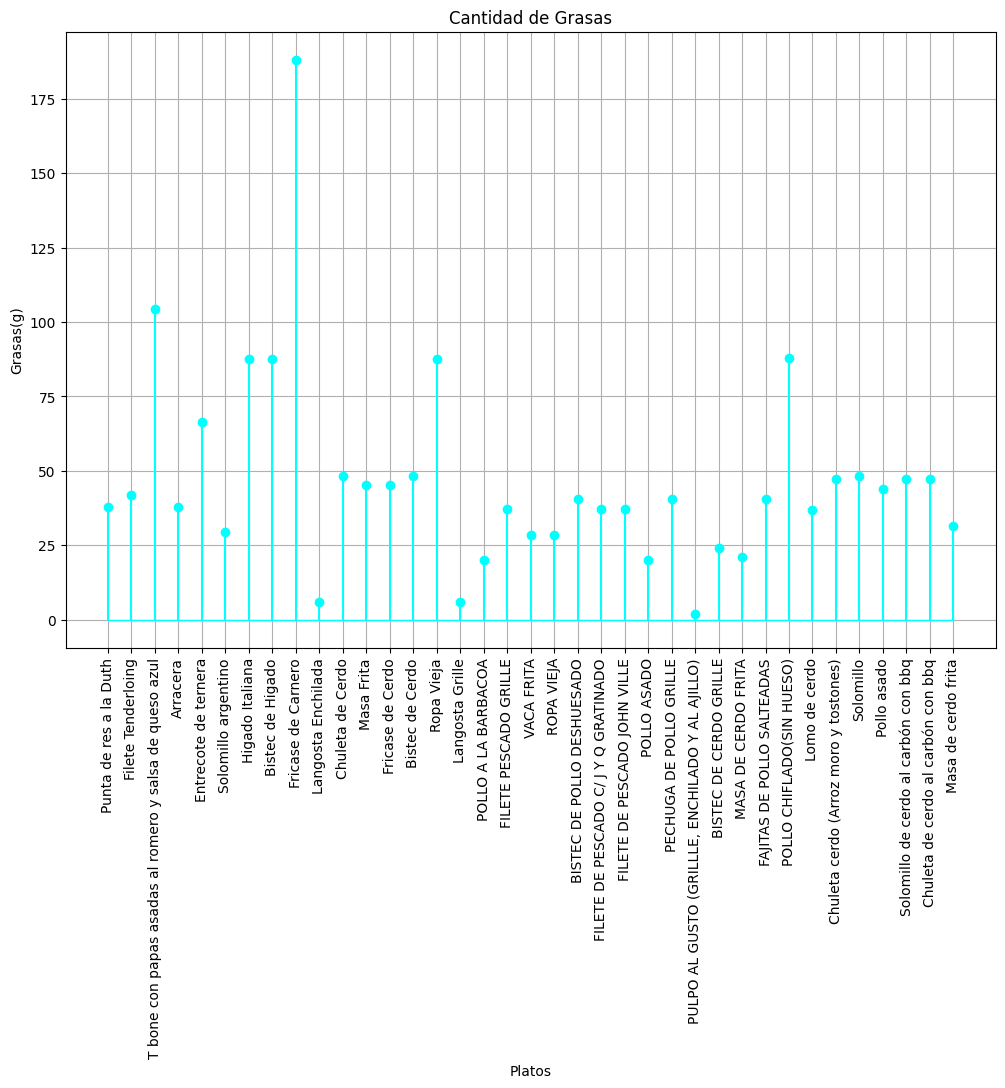

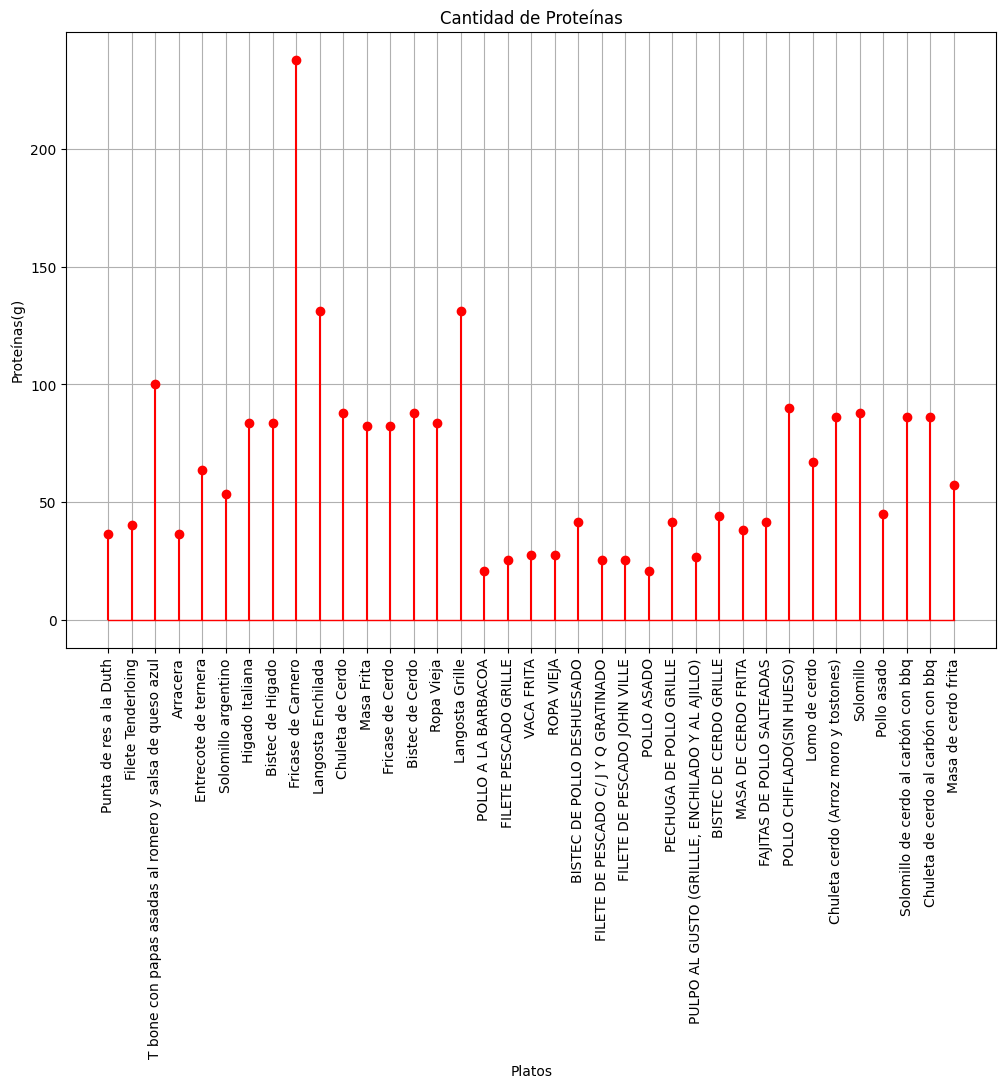

In [23]:
import os
import json
import my_library as ly
import matplotlib.pyplot as plt


with open("info_nutrientes.json", "r", encoding="utf8") as n:
    data_nutrientes = json.load(n)


ruta = "json_programa_aportes_nutricional"
archivos_json = os.listdir(ruta)
nutrientes_por_plato = {}


for archivo in archivos_json:
    with open(os.path.join(ruta, archivo), "r", encoding="utf8") as f:
        datos = json.load(f)
    if 'strong_dishes' in datos['menu'] and datos['menu']['strong_dishes'] is not None:
        strong_dishes = datos['menu']['strong_dishes']
        no = ly.coger_el_numero(strong_dishes)
        lista_platos = ly.name_platos(strong_dishes)
        if 'name' in datos:
            name = datos['name']
            print(f'{name}:{lista_platos}')
        for nombre_plato, cantidad, tipo_carne in no:
            if tipo_carne in data_nutrientes:
                if nombre_plato not in nutrientes_por_plato:
                    nutrientes_por_plato[nombre_plato] = {}
                nutrientes_plato_unico = ly.calcular_nutrientes(data_nutrientes, tipo_carne, cantidad)
                for nutriente, valor in nutrientes_plato_unico.items():
                    if nutriente not in nutrientes_por_plato[nombre_plato]:
                        nutrientes_por_plato[nombre_plato][nutriente] = 0
                    nutrientes_por_plato[nombre_plato][nutriente] += valor


platos = list(nutrientes_por_plato.keys())
proteinas = [nutrientes_por_plato[plato].get('proteínas') for plato in platos]
calorias = [nutrientes_por_plato[plato].get('calorias') for plato in platos]
carbohidratos = [nutrientes_por_plato[plato].get('carbohidratos') for plato in platos]
grasas = [nutrientes_por_plato[plato].get('grasas') for plato in platos]

# grafica carbohidratos
plt.figure(figsize=(12, 8))
markerline, stemlines, baseline = plt.stem(platos, carbohidratos, linefmt='-', basefmt='-', markerfmt='o')
plt.setp(stemlines, 'color', 'magenta')
plt.setp(markerline, 'color', 'magenta')
plt.setp(baseline, 'color', 'magenta', 'linewidth', 1)
plt.title('Cantidad de Carbohidratos')
plt.xlabel('Platos')
plt.ylabel('Carbohidratos(g)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

#grafica calorias
plt.figure(figsize=(12, 8))
markerline, stemlines, baseline = plt.stem(platos, calorias, linefmt='-', basefmt='-', markerfmt='o')
plt.setp(stemlines, 'color', 'blue')
plt.setp(markerline, 'color', 'blue')
plt.setp(baseline, 'color', 'blue', 'linewidth', 1)
plt.title('Cantidad de Calorías')
plt.xlabel('Platos')
plt.ylabel('Calorías(g)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# grafica grasas
plt.figure(figsize=(12, 8))
markerline, stemlines, baseline = plt.stem(platos, grasas, linefmt='-', basefmt='-', markerfmt='o')
plt.setp(stemlines, 'color', 'cyan')
plt.setp(markerline, 'color', 'cyan')
plt.setp(baseline, 'color', 'cyan', 'linewidth', 1)
plt.title('Cantidad de Grasas')
plt.xlabel('Platos')
plt.ylabel('Grasas(g)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# grafica proteinas
plt.figure(figsize=(12, 8))
markerline, stemlines, baseline = plt.stem(platos, proteinas, linefmt='-', basefmt='-', markerfmt='o')
plt.setp(stemlines, 'color', 'red')
plt.setp(markerline, 'color', 'red')
plt.setp(baseline, 'color', 'red', 'linewidth', 1)
plt.title('Cantidad de Proteínas')
plt.xlabel('Platos')
plt.ylabel('Proteínas(g)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


Un cliente reciente tenía un deseo muy particular: recorrer las calles más emblemáticas y hermosas de La Habana, como Obispo, Malecón, Avenida 23 y Paseo. Estas calles, famosas por su encanto y atractivo, son destinos icónicos tanto para locales como para turistas. Además de explorar estas vías, el cliente quería visitar los restaurantes situados en ellas, con especial interés en la calle que ofreciera la mayor variedad de opciones culinarias. Su objetivo era poder elegir con mayor comodidad los lugares donde disfrutar de una buena comida.

Creamos una lista detallada de los restaurantes en cada una de las calles mencionadas. Además, desarrollamos una gráfica que permitiera visualizar claramente cuál de estas calles ofrecía la mayor variedad y cantidad de restaurantes. Esta gráfica comparativa resultó ser una herramienta invaluable para nuestro cliente, ya que le permitió tomar decisiones informadas sobre dónde empezar su recorrido gastronómico.

Gracias al trabajo de GastroData, el cliente pudo planificar su recorrido por La Habana de manera eficiente y placentera, explorando no solo las bellezas arquitectónicas y paisajísticas de las calles principales, sino también deleitándose con la rica oferta culinaria que cada una tenía para ofrecer.

Obispo: ['Berkana', 'El Balcon de los Hermanos', 'El floridita', 'Europa', 'La Caribeña', 'La_Terraza_del_Obispo', 'Obispo 510', 'Restaurante_Europa']
Avenida 23: ['7 Mares', 'Sport Bar']
Malecon: ['Cafe Bohemio']
Paseo: ['Café D la Esquina', 'Los Nardos']


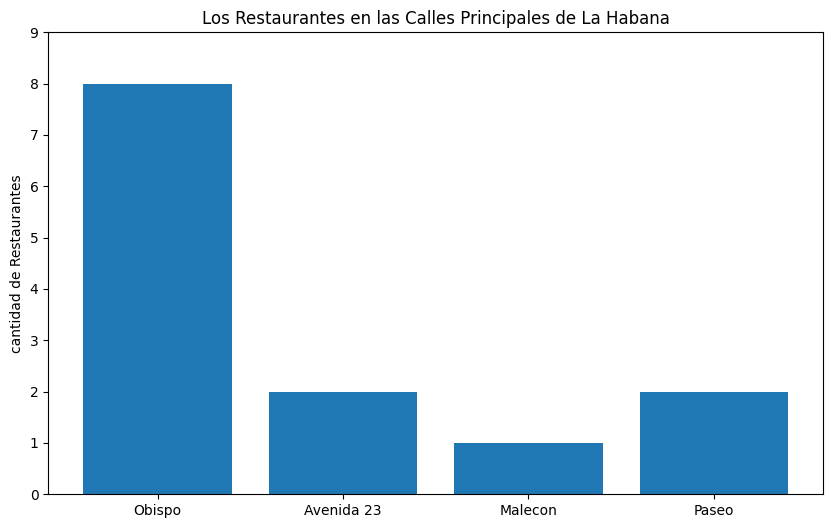

In [24]:
import json
import os
import matplotlib.pyplot as plt

ruta_carpeta = 'json'
archivos_json = os.listdir(ruta_carpeta)

obispo = []
avenida_23 = []
malecon = []
paseo = []

for archivo in archivos_json:
    with open(os.path.join(ruta_carpeta, archivo), "r", encoding="utf8") as f:
        datos = json.load(f)
        name = datos.get('name')
        location = datos.get('location')
        address = location.get('address') if location else None
        calle = address.get('Street1') if address else None
        if name and calle:
            if calle == 'Obispo':
                obispo.append(name)
            elif calle == 'Avenida 23':
                avenida_23.append(name)
            elif calle == 'Malecon':
                malecon.append(name)
            elif calle == 'Paseo':
                paseo.append(name)

print(f'Obispo: {obispo}')
print(f'Avenida 23: {avenida_23}')
print(f'Malecon: {malecon}')
print(f'Paseo: {paseo}')

calle_obispo = len(obispo)
calle_23 = len(avenida_23)
calle_malecon = len(malecon)
calle_paseo = len(paseo)
callesss = ['Obispo','Avenida 23','Malecon', 'Paseo']
cantidad_restaurantes = [calle_obispo,calle_23,calle_malecon,calle_paseo]
plt.figure(figsize=(10, 6))
plt.bar(callesss, cantidad_restaurantes)
plt.xticks(rotation=360)  
plt.yticks(range(0, max(cantidad_restaurantes) + 2))
plt.ylabel('cantidad de Restaurantes')
plt.title('Los Restaurantes en las Calles Principales de La Habana')
plt.show()

Nuestro ultimo cliente del mes  tenía un deseo muy específico: probar pizzas en distintos locales de La Habana, pero disponía de un presupuesto limitado. Para optimizar su experiencia gastronómica, estaba interesado en conocer el promedio del precio de la pizza en cada municipio, de manera que pudiera elegir el municipio más adecuado para recorrer y degustar una variedad de pizzas sin exceder su presupuesto.

Con toda la información necesaria recopilada, procedimos a calcular el promedio del precio de la pizza en cada municipio. Utilizamos herramientas de análisis de datos para comparar y visualizar la información, facilitando la toma de decisiones del cliente. Nuestro objetivo era identificar los municipios que ofrecieran las pizzas más económicas sin comprometer la calidad.

Para mostrar el resultado desarrollamos una gráfica comparativa que mostraba claramente cuál municipio ofrecía las pizzas más asequibles. Esta gráfica resultó ser una herramienta invaluable para nuestro cliente, ya que le permitió planificar su recorrido gastronómico de manera eficiente y disfrutar de una amplia variedad de pizzas sin exceder su presupuesto.

Gracias al trabajo de GastroData, el cliente pudo explorar los municipios de La Habana con confianza y degustando deliciosas pizzas en distintos locales 

Precio promedio de la pizza por municipio
plaza de la revolucion: 1596
regla: 1150
habana vieja: 1850
marianao: 1253
boyeros: 1280
habana del este: 1461
playa: 2045
guanabacoa: 1076
arroyo naranjo: 1381
san miguel del padron: 761
centro habana: 1895
cotorro: 1053
10 de octubre: 1561
cerro: 928
la lisa: 1196


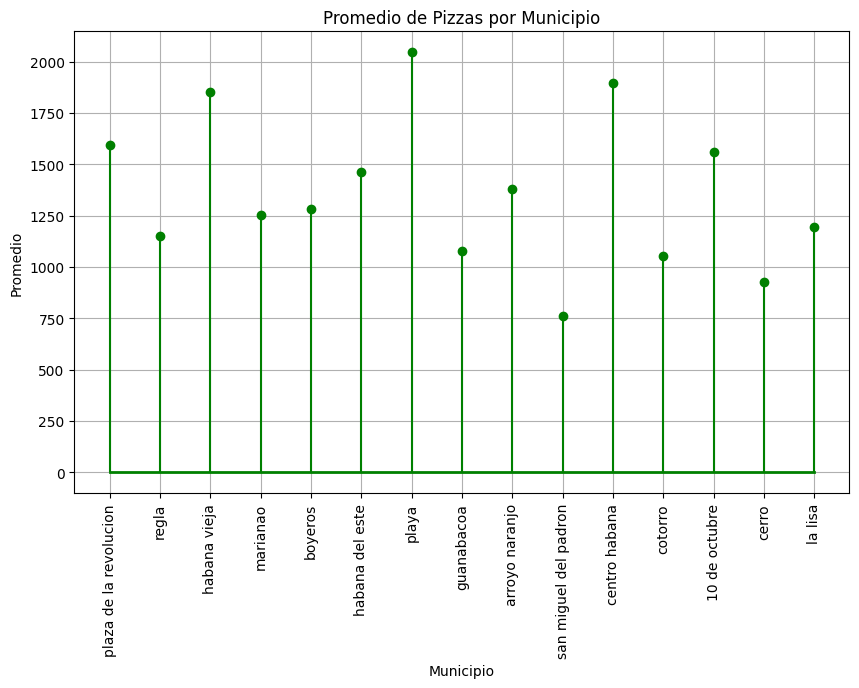

In [25]:
import json
import os
import my_library as ly
import matplotlib.pyplot as plt

ruta_carpeta = 'json'
archivos_json = os.listdir(ruta_carpeta)
pizzas_precios = {}

for archivo in archivos_json:
    with open(os.path.join(ruta_carpeta, archivo), "r", encoding="utf8") as f:
        datos = json.load(f)
        if "municipality" in datos:
            municipio = datos["municipality"].strip().lower() 
        else:
            municipio = None
        if "menu" in datos and "pizzas" in datos["menu"]:
            pizzas = datos['menu']['pizzas']
        else:
            pizzas = None
        if municipio and pizzas:
            if municipio not in pizzas_precios:
                pizzas_precios[municipio] = ly.valor_num(pizzas)
            else:
                pizzas_precios[municipio].extend(ly.valor_num(pizzas))

pizzas_promedio = {}
print("Precio promedio de la pizza por municipio")
for municipio in pizzas_precios:
    promedio = ly.promedio(pizzas_precios,municipio)
    pizzas_promedio[municipio] = promedio
    print(f"{municipio}: {promedio}")

nombres_municipio = list(pizzas_promedio.keys())
promedios= list(pizzas_promedio.values())


plt.figure(figsize=(10, 6))
markerline, stemlines, baseline = plt.stem(nombres_municipio, promedios, linefmt='-', basefmt='-', markerfmt='o')
plt.setp(stemlines, 'color', 'green') 
plt.setp(markerline, 'color', 'green')  
plt.setp(baseline, 'color', 'green', 'linewidth', 2)  
plt.title('Promedio de Pizzas por Municipio')
plt.xlabel('Municipio')
plt.ylabel('Promedio')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


<h1 style= "text-align:center;color: #0080ff">Conclusiones</h1>
En GastroData, hemos demostrado nuestro compromiso con la excelencia y la innovación a través de la recolección y análisis exhaustivo de datos gastronómicos. Nuestros proyectos personalizados han permitido a los clientes tomar decisiones informadas y optimizar sus experiencias culinarias en La Habana. Desde la evaluación de precios y nutrientes, hasta la planificación de recorridos gastronómicos, cada trabajo realizado ha destacado la importancia de los datos precisos y detallados. A medida que continuamos expandiendo nuestros servicios y colaborando con más restaurantes, seguimos firmemente dedicados a proporcionar soluciones basadas en datos que beneficien tanto a los establecimientos gastronómicos como a los consumidores. En resumen, el trabajo de GastroData no solo mejora la calidad de vida de nuestros clientes, sino que también contribuye al desarrollo y la sostenibilidad de la industria gastronómica en nuestra querida ciudad.